[![gammapy](https://img.shields.io/badge/powered%20by-gammapy-orange.svg?style=flat)](https://gammapy.org/)

<a id='indice'></a>
## Indice
* [**1. Introduction**](#intro)

* [**2. Setup**](#setup)
* [**3. Data Access and Selection (DL3)**](#3.0)
    * [**3.1 Gammapy Catalogs**](#3.1)
    * [**3.2 LHASSO Data Published in the Nature**](#3.2)
* [**4. Analysis**](#4)
    * [**4.1 LHAASO J1825-1326: HESS 1825-137**](#4.1)
    * [**4.2 LHAASO J1825-1326: HESS 1825-130**](#4.2)

<a id='intro'></a>
🔝 [Back to Top](#indice)<br>
## 1. Introduction 

Recently, the LHAASO collaboration showed the spectral energy distributions of three luminous
sources with fluxes exceeding 1 CU (at 100 TeV): LHAASO J1825-1326,
LHAASO J1908+0621 and LHAASO J2226+6057. We will analyze the observation which has only pulsars as a possible source, in other words, LHAASO J1825-1326. 

Notations

We use the following variable names :

....


|Variable| Dataset attribute name |Definition | 
|:-|  :-|:- |
|src|source | ... |
|fp|flux points | ... |
|ds|datasets| ... |
|dot|. | ... |
|deg|degree | ... |
|roi|region of interest | ... |
|cntr|counterpart | ... |





### Configuration Files

The config file is there to defined the parameters of your analysis. A config file is divided into sections. Each section is a logical group of option and there is some constants across the sections like names, functionalities.

.....

### Target

The target options gives the name, position and spectral model you want to use for the source you are interested in.

Note :

        Coordinate are in degrees.
        Available models are 'PowerLaw', 'PowerLaw2', 'LogParabola', 'PLExpCutoff'



The parameter spectrum is used for the generation of the sky model. Of course, you can change the model describing the spectrum of any sources (by hand...). All the models supported by the ST are described (ADICIONAR LINK INTERNO). For now, the supported models by enrico are PowerLaw, PowerLaw2, LogParabola, PLExpCutoff, Generic. Generic is for the non-supported models. By supported, we mean that enrico can produce a xml file with such model and has some optional features. It is completely possible to run an analyse with enrico and a non-supported model. For extragalactic sources, absorption by the extragalactic background light can be taken into account. This feature is disable if z=0:

        redshift has to be provided
        ebl_model is a id of a model - the number is defined in the ST. 0=Kneiske, 1=Primack05, 2=Kneiske_HighUV, 3=Stecker05, 4=Franceschini, 5=Finke, 6=Gilmore
        the EBL absorption can be scaled by a parameter which can be fitted if fit_tau = yes



In [1]:
from gammapy.modeling.models import SPECTRAL_MODEL_REGISTRY
print(SPECTRAL_MODEL_REGISTRY)

Registry
--------

ConstantSpectralModel                     : ['ConstantSpectralModel', 'const'] 
CompoundSpectralModel                     : ['CompoundSpectralModel', 'compound'] 
PowerLawSpectralModel                     : ['PowerLawSpectralModel', 'pl'] 
PowerLaw2SpectralModel                    : ['PowerLaw2SpectralModel', 'pl-2'] 
BrokenPowerLawSpectralModel               : ['BrokenPowerLawSpectralModel', 'bpl'] 
SmoothBrokenPowerLawSpectralModel         : ['SmoothBrokenPowerLawSpectralModel', 'sbpl'] 
PiecewiseNormSpectralModel                : ['PiecewiseNormSpectralModel', 'piecewise-norm'] 
ExpCutoffPowerLawSpectralModel            : ['ExpCutoffPowerLawSpectralModel', 'ecpl'] 
ExpCutoffPowerLaw3FGLSpectralModel        : ['ExpCutoffPowerLaw3FGLSpectralModel', 'ecpl-3fgl'] 
SuperExpCutoffPowerLaw3FGLSpectralModel   : ['SuperExpCutoffPowerLaw3FGLSpectralModel', 'secpl-3fgl'] 
SuperExpCutoffPowerLaw4FGLDR3SpectralModel: ['SuperExpCutoffPowerLaw4FGLDR3SpectralModel', 'secpl-4fgl-d

In [2]:
from gammapy.modeling.models import SPATIAL_MODEL_REGISTRY
print(SPATIAL_MODEL_REGISTRY)

Registry
--------

ConstantSpatialModel           : ['ConstantSpatialModel', 'const'] 
TemplateSpatialModel           : ['TemplateSpatialModel', 'template'] 
DiskSpatialModel               : ['DiskSpatialModel', 'disk'] 
GaussianSpatialModel           : ['GaussianSpatialModel', 'gauss'] 
GeneralizedGaussianSpatialModel: ['GeneralizedGaussianSpatialModel', 'gauss-general'] 
PointSpatialModel              : ['PointSpatialModel', 'point'] 
ShellSpatialModel              : ['ShellSpatialModel', 'shell'] 
Shell2SpatialModel             : ['Shell2SpatialModel', 'shell2'] 



<a id='setup'></a>
🔝 [Back to Top](#intro)<br>
## 2. Setup 

### Quickstart
For convenience we are  using a pre-defined conda environment file (gammapy-1.0-environment.yml), so we can get additional useful packages together with Gammapy in a virtual isolated environment. To run this program the environment variable GAMMAPY_DATA must be defined and point to the directory on your machine where the datasets needed are placed. To check whether your setup is correct you can uncomment and execute the following cell:

In [3]:
# path = os.path.expandvars("$GAMMAPY_DATA")

# if not os.path.exists(path):
#     raise Exception("gammapy-data repository not found!")
# else:
#     print("Great your setup is correct!")

In case you encounter an error, you can un-comment and execute the following cell to continue. But we recommend to set up your environment correctly as described in [getting started](https://docs.gammapy.org/dev/getting-started/index.html#download-tutorials) after you are done with this notebook.

In [4]:
# path_GAMMAPY_DATA = '/home/born-again/Documents/GitHub/gammapy/gammapy-datasets/1.0.1'
# os.environ['GAMMAPY_DATA'] = os.path.join(os.getcwd(), path_GAMMAPY_DATA)

In [5]:
from gammapy.utils.check import check_tutorials_setup
from gammapy.visualization.utils import plot_contour_line
check_tutorials_setup()


System:

	python_executable      : /home/born-again/anaconda3/envs/gammapy-1.0/bin/python 
	python_version         : 3.9.16     
	machine                : x86_64     
	system                 : Linux      


Gammapy package:

	version                : 1.0.1      
	path                   : /home/born-again/anaconda3/envs/gammapy-1.0/lib/python3.9/site-packages/gammapy 


Other packages:

	numpy                  : 1.23.5     
	scipy                  : 1.9.1      
	astropy                : 5.1.1      
	regions                : 0.6        
	click                  : 8.1.3      
	yaml                   : 6.0        
	IPython                : 8.4.0      
	jupyterlab             : 3.4.8      
	matplotlib             : 3.6.2      
	pandas                 : 1.5.0      
	healpy                 : 1.16.1     
	iminuit                : 2.17.0     
	sherpa                 : 4.15.0     
	naima                  : 0.10.0     
	emcee                  : 3.1.3      
	corner                 : 2.2.1      




In [6]:
path_my_modules = '../my_modules'
# path_my_modules = "/home/born-again/Documents/GitHub/grupo_AAE/modules"
path_my_modules

'../my_modules'

In [7]:
import os
import sys
import importlib

# module_path = os.path.abspath(f'{path_my_modules}/spectral_models')
# if module_path not in sys.path:
#     sys.path.append(module_path)

# import spectral_models
# importlib.reload(spectral_models)
# # from spectral_models import pwl_model, lp_model

module_path = os.path.abspath(f'{path_my_modules}/utilities')
if module_path not in sys.path:
    sys.path.append(module_path)

import utilities
importlib.reload(utilities)
from utilities import (
    mkdir_sub_directory, 
    write_tables_fits, 
    write_tables_csv, 
    load_gammapy_catalogs, 
    name_to_txt,
    LHAASO_table_to_SED_format
)

module_path = os.path.abspath(f'{path_my_modules}/config')
if module_path not in sys.path:
    sys.path.append(module_path)

import cfg
importlib.reload(cfg)

<module 'cfg' from '/home/born-again/Documents/GitHub/gammapy/my-notebooks/my_modules/config/cfg.py'>

In [8]:
# Display figures directly inline
%matplotlib inline
import matplotlib.pyplot as plt # A collection of command style functions


path_my_plot_style = f"{path_my_modules}/my_plot_style.txt" 
plt.style.use(path_my_plot_style)
# markers = ['H', 'D', 'd', 'P', 'X','o', 'v', '^', '<', '>',  '8', 's', 'p', '*', 'h']
markers=['s','o']

In [9]:
from pathlib import Path
from astropy.table import Table

import numpy as np

from gammapy.estimators import FluxPoints
from gammapy.utils.scripts import make_path

In [10]:
from gammapy.datasets import FluxPointsDataset, Datasets

## Functions

In [11]:
path_fp_LHAASO = "/home/born-again/Documents/GitHub/grupo_AAE/data_access_and_selection(DL3)/flux_points_tables/LHASSOColaboration_publishNature_2021"

In [12]:
from astropy import units as u
def plot_flux_points(
    datasets = None,  
    sed_type = "e2dnde", 
    yaxis_units="TeV cm-2 s-1",
    xaxis_units="TeV",
    energy_bounds= [1e-5, 1e2] * u.TeV, 
    ylim = [1e-13, 1e-9],
    ncol = 3,
    loc_legend = 'lower left'
):    
    
    ax = plt.subplot()
    
    ax.yaxis.set_units(u.Unit(yaxis_units))
    ax.xaxis.set_units(u.Unit(xaxis_units))

    kwargs = {"ax": ax, "sed_type": sed_type}

    while len(markers) < len(datasets) +1:
        markers.extend(markers)

        
    for i, d in enumerate(datasets):
        d.data.plot(label=d.name, marker=markers[i],  **kwargs)
            
    ax.set_ylim(ylim)
    ax.set_xlim(energy_bounds)
    
    ax.legend(
        loc = loc_legend, 
        ncol = ncol
    )
    
    plt.xlabel(r'$\rm{E\ [TeV] }$')   
    plt.ylabel(r'$\rm{E^2\ J(E)\ [erg\ cm^{-2}\ s^{-1}] }$')
    
#     directory_child = f"{cfg.dir_figures}/{create_roi_name(region_of_interest)}"
    
    path_parent, path_child = mkdir_sub_directory(
        cfg.dir_flux_points, 
        cfg.dir_figures
    )

    
#     path_directory = mkdir_sub_directory(cfg.dir_flux_points_figures)
    
    file_name = create_roi_name(region_of_interest)
    
    path_file =  path_child / f'{file_name}{cfg.format_png}'    
    plt.savefig(path_file, bbox_inches='tight')
    
    plt.show()
    
    return

In [13]:
from astropy import units as u
def plot_ds_fp(
    datasets = None, 
    sed_type = "e2dnde",  
    xaxis_units = "TeV",
    yaxis_units ="erg cm-2 s-1",
    energy_bounds = [1e-5, 1e3] * u.TeV, 
    ylim = [1e-20, 1e-10],
    xlabel = r'$\rm{E\ [TeV] }$',
    ylabel = r'$\rm{E^2\ J(E)\ [erg\ cm^{-2}\ s^{-1}] }$',
    loc_legend = "lower left",
    ncol = 2
    ):
    
    ax = plt.subplot()
    ax.yaxis.set_units(u.Unit(yaxis_units))
    ax.xaxis.set_units(u.Unit(xaxis_units))

    kwargs = {"ax": ax, "sed_type": sed_type}

    while len(markers) < len(datasets) +1:
        markers.extend(markers)
        
    for i, d in enumerate(datasets):
        d.data.plot(label=d.name, marker=markers[i],  **kwargs)
    
    ax.set_ylim(ylim)
    ax.set_xlim(energy_bounds)
    ax.legend(loc = loc_legend, ncol = ncol)
    
    plt.xlabel(xlabel)   
    plt.ylabel(ylabel)
    
    path_flux_points_figures = mkdir_sub_directory(cfg.dir_flux_points_figures)
    file_name = f'{source_txt}_counterparts_{format_png}' 
    file_path = path_flux_points_figures / file_name
    plt.savefig(file_path, bbox_inches='tight')
    
    plt.show()
    
    return

In [14]:
def ds_fp_from_table_fp(table_fp, sky_model, sed_type = "e2dnde"):
    '''Returns the flux points dataset from the flux points table 
    
    >>> ds_fp_from_table_fp(table_fp, sky_model, sed_type)
    ds_fp
    '''
    flux_points = FluxPoints.from_table(table = table_fp, reference_model=sky_model, sed_type=sed_type)
    
    ds_name = f'{source_name}'  
    ds_fp = FluxPointsDataset(
        models = sky_model,
        data   = flux_points, 
        name   = ds_name
    )
    return ds_fp


In [15]:
import numpy as np
# from astropy import units as u
from astropy.table import Table
from gammapy.estimators import FluxPoints
from gammapy.utils.scripts import make_path

# format_csv = ".csv"
format_fits = ".fits"

sed_type="e2dnde"
# sed_type="dnde"

counterparts_datasets_cut = []
def flux_points_cut_energy(df_fp = None, counterparts_datasets = None, e_ref_min=None):
    '''To write Docstring!!!!'''
    
    source_range = range(len(counterparts))
    for source_index in source_range:
        counterparts_datasets = []
        
#         source_identification(source_index)
        
        k_range = range(len(counterparts_datasets[source_index]))
        for k in k_range: 
            
            catalog_tag = df_fp["catalog"][source_index][k]

            ds_name = f"{counterpart_name}: {catalog_tag}"
            flux_points = counterparts_datasets[source_index][k].data

            mask_energy = np.zeros(len(flux_points.to_table()), dtype=bool)

            for m, e_ref in enumerate(flux_points.energy_ref):
                if e_ref > e_ref_min:
                    mask_energy[m] = True
            print(ds_name, counterpart_txt)  
            
            try:
                flux_points_mask = flux_points.to_table()[mask_energy]
                flux_points_energy = FluxPoints.from_table(flux_points_mask)

                ds = FluxPointsDataset(
                                    data=flux_points_energy, 
                                    name=ds_name
                                )

                table = ds.data.to_table(
                                    sed_type = sed_type, 
                                    formatted = True
                                )
                counterparts_datasets.append(ds)

                file_name = f'{source_txt}_{counterpart_txt}_{catalog_tag}_e_ref_min_{e_ref_min_name}{format_fits}'
                path_os = os.path.abspath(
                    os.path.join(
                        f"{path_flux_points_tables_analysis}/{file_name}"
                    )
                )

                if path_os not in sys.path:
                    sys.path.append(path_os)

                table.write(f"{path_os}",format='fits', overwrite=True)

            except:
                print(f"{counterpart_name} out")    
            
        counterparts_datasets_cut.append(counterparts_datasets)
    return counterparts_datasets_cut

In [16]:
def table_to_SED_format(file_name):
    '''
    Normalization Representation
    The SED format is a flexible specification for representing one-dimensional spectra 
    (distributions of amplitude vs. energy).
    
    '''
    
    directory_path = f"{path_fp_LHAASO}"

    format_dat = '.dat'
    file_path = Path(f'{directory_path}/{file_name}{format_dat}') 

    table = Table.read(file_path,format='ascii', delimiter=' ', comment='#')
    
#     display(table)

    table['col1'] = table['col1']/1e12
    table.rename_column('col1', 'e_ref')
    table['e_ref'].unit = u.TeV

    #     table['col5'] = table['col5']/1e12
    #     table.rename_column('col5', 'e_min')
    #     table['e_min'].unit = u.TeV

    #     table['col6'] = table['col6']/1e12
    #     table.rename_column('col6', 'e_max')
    #     table['e_max'].unit = u.TeV

    table.rename_column('col2', 'e2dnde')
    table['e2dnde'].unit = u.Unit("erg cm-2 s-1")

    table.rename_column('col3', 'e2dnde_errp')
    table['e2dnde_errp'].unit = u.Unit("erg cm-2 s-1")

    table.rename_column('col4', 'e2dnde_errn')
    table['e2dnde_errn'].unit = u.Unit("erg cm-2 s-1")

    table.meta["SED_TYPE"] = "e2dnde"
    table.meta["name"] = "table"
    table.remove_columns(['col5', 'col6'])

#     display(table)

    # table_J1825 = Table(table, copy=True)
    return table

In [17]:
import numpy as np
# from astropy import units as u
from astropy.table import Table
from gammapy.estimators import FluxPoints
from gammapy.utils.scripts import make_path



def cut_flux_points_in_energy(counterparts_datasets,e_ref_min):
    e_ref_min_txt = name_to_txt(str(e_ref_min))
    source_txt  = name_to_txt(source_name)
    angle_separation_txt = name_to_txt(str(angle_separation))+'degree'

    # Creates the directories to save the flux points tables 
    cfg.dir_flux_points_tables = "flux_points_tables"
    dir_fp_tab_counterparts = f"{name_to_txt(source_name)}_counterparts_{angle_separation_txt}"
    path_flux_points_tables, path_fp_tab_counterparts = mkdir_sub_directory(
        cfg.dir_flux_points_tables, 
        dir_fp_tab_counterparts
    )
    print(dir_fp_tab_counterparts)
    datasets_cut_fp = []
    for index, dataset_fp in enumerate(counterparts_datasets):

        flux_points= dataset_fp.data
        try:
            mask_energy = np.zeros(len(flux_points.to_table()), dtype=bool)

            for m, e_ref in enumerate(flux_points.energy_ref):
                if e_ref > e_ref_min:
                    mask_energy[m] = True

            flux_points_mask = flux_points.to_table()[mask_energy]
            flux_points_energy = FluxPoints.from_table(flux_points_mask)

            ds = FluxPointsDataset(
                data=flux_points_energy, 
                name = counterparts_datasets[index].name
            )
            datasets_cut_fp.append(ds)
            table = ds.data.to_table(
                sed_type = sed_type,
                formatted = True
            )    
            name = name_to_txt(counterparts_datasets[index].name)
            
            file_name = f'{name}_e_ref_min_{e_ref_min_txt}'
#             file_name = f"{counterpart_txt}_{cat_tag}_e_ref_min_{e_ref_min_txt}"
    
            write_tables_csv(table, path_fp_tab_counterparts, file_name)

        except:
            print(f'{index}: {dataset_fp.name} no flux points table (cutting energy)') 
    return datasets_cut_fp

In [18]:
def plot_SED_from_catalogs(region_of_interest):
    directory_child = f"{cfg.dir_SED_from_catalogs}/{create_roi_name(region_of_interest)}"

    path_parent, path_child = mkdir_sub_directory(
            cfg.dir_SED,
            directory_child
        )
        
    for counterpart, dataset_fp in zip(counterparts,counterparts_datasets):    

        counterpart_name = counterpart.name
        flux_points = counterpart.flux_points
        spectral_model = counterpart.spectral_model()
        spectral_model_tag = spectral_model.tag[0]
        spectral_model_tag_short = spectral_model.tag[1]

        ax = plt.subplot()
        ax.yaxis.set_units(u.Unit("erg cm-2 s-1"))
        ax.xaxis.set_units(u.Unit("TeV"))

        xlabel = r'$\rm{E\ [TeV]}$'
        ylabel = r'$\rm{E^2\ J(E)\ [erg\ cm^{-2}\ s^{-1}]}$'

        kwargs = {
            "ax": ax, 
            "sed_type": cfg.sed_type_e2dnde
        }
        kwargs_fit = {
            "label": f"{spectral_model_tag_short} (fit)"
        }

        flux_points.plot(label = dataset_fp.name, **kwargs)

        energy_bounds = flux_points.energy_min[0], flux_points.energy_max[-1]
    #     e2dnde_errn = flux_points.e2dnde_errn.data
    #     e2dnde_errp = flux_points.e2dnde_errp.data
    #     ylim =min(np.nanmin(e2dnde_errp),np.nanmin(e2dnde_errn)), max(np.nanmax(e2dnde_errp),np.nanmax(e2dnde_errn))

        spectral_model.plot(energy_bounds=energy_bounds, color="k", **kwargs, **kwargs_fit)
        spectral_model.plot_error(energy_bounds=energy_bounds, **kwargs)

    #     kwargs_spectrum = {"kwargs_model": {"color":"red", "ls":"--"}, "kwargs_fp":{"color":"green", "marker":"o"}}

    #     dataset_fp.plot_spectrum(**kwargs, **kwargs_spectrum)  

    #     ax.set_ylim(ylim)
        ax.set_xlim(energy_bounds)
        plt.xlabel(xlabel)   
        plt.ylabel(ylabel)
        plt.legend()



        file_name = f'{name_to_txt(dataset_fp.name.replace(":",""))}_{spectral_model_tag_short}{cfg.format_png}'

        file_path = path_child / file_name 

        plt.savefig(file_path, bbox_inches='tight')

        plt.show()

In [19]:
def create_roi_name(region_of_interest = None):
    source_name = region_of_interest["source_name"] 
    angle_separation = region_of_interest["angle_separation"] 
    return f"{name_to_txt(source_name)}_counterparts_{f'{name_to_txt(str(angle_separation))}deg'}"

In [20]:
# from gammapy.datasets import FluxPointsDataset
from astropy.coordinates import SkyCoord
from astropy import units as u

import pickle

def creates_catalogs_roi(catalogs_cls = None , region_of_interest = None):
    '''
    Create catalogs subset (only sources within the region of interest)
    '''
    source_name = region_of_interest["source_name"] 
    source_RA = region_of_interest["source_RA"]  
    source_dec = region_of_interest["source_dec"] 
    angle_separation = region_of_interest["angle_separation"] 
        
    source_position = SkyCoord(source_RA, source_dec, unit = cfg.unit_deg) 
    
    print("**************************************************", end = "\n\n")
    print(f"Region of interest:\n")
    print(f"Source name: {source_name}")
    print(f"Source position (ra, dec) in deg: {source_RA, source_dec}")
    print(f"Radius: {angle_separation} deg", end = "\n\n**************************************************\n")
    
    catalogs_roi = []
    catalog_no_counterparts = []
    n_cat_roi = 0
    
    for catalog in catalogs_cls:
        
        cat_tag = catalog.tag
        cat_descr = catalog.description
        
        mask_roi = source_position.separation(catalog.positions) < angle_separation * u.deg
        
        if len(catalog[mask_roi].table):
            catalogs_roi.append(catalog[mask_roi])
            n_cat_roi += 1
        else:
            catalog_no_counterparts.append(f"{cat_tag}: {cat_descr}")

    if n_cat_roi:
        
        pickling_catalog_roi(catalogs_roi, region_of_interest)
    
        print(f"\n{n_cat_roi} catalogs with sources in the region of interest:", end = "\n\n")
        for catalog in catalogs_roi:
            cat_tag = catalog.tag
            cat_descr = catalog.description
            print(f"{cat_tag}: {cat_descr}")
            display(catalog.table)
    else:
        print("No catalogs with sources in the region of interest!", end = "\n\n")

    if n_cat_roi != 0 and len(catalog_no_counterparts) != 0:
        for index, catalog_no_counterpart in enumerate(catalog_no_counterparts):            
            if index == 0:
                print("Catalogs without sources in the region of interest:", end = "\n\n")
            print(catalog_no_counterpart)

    return catalogs_roi

In [21]:
def creates_region_of_interest(source_name, source_RA, source_dec, angle_separation = None):
    return  {
        "source_name": source_name,
        "source_RA": source_RA,
        "source_dec": source_dec,
        "angle_separation": angle_separation
    }

In [22]:
import pickle
    
def unpickling_catalog_roi(region_of_interest):        
    # Creates the directory to save the catalogs roi list  
    path_file = mkdir_sub_directory(cfg.dir_catalogs_roi)

    file_name = create_roi_name(region_of_interest)
    path_os = os.path.abspath(
        os.path.join(
            f"{path_file}/{file_name}{cfg.format_dat}"
        )
    )

    if path_os not in sys.path:
        sys.path.append(path_os)       

    with open(path_os, "rb") as fp:  
        catalogs_roi = pickle.load(fp)
    return catalogs_roi

In [23]:
import pickle

def pickling_catalog_roi(catalogs_roi, region_of_interest):        
    
    # Creates the directory to save the catalogs roi list  
    path_file = mkdir_sub_directory(cfg.dir_catalogs_roi)

    file_name = create_roi_name(region_of_interest)
    path_os = os.path.abspath(
        os.path.join(
            f"{path_file}/{file_name}{cfg.format_dat}"
        )
    )

    if path_os not in sys.path:
        sys.path.append(path_os)       

    with open(path_os, "wb") as fp:  
        pickle.dump(catalogs_roi, fp)
        
    return

In [24]:
help(FluxPointsDataset)

Help on class FluxPointsDataset in module gammapy.datasets.flux_points:

class FluxPointsDataset(gammapy.datasets.core.Dataset)
 |  FluxPointsDataset(models=None, data=None, mask_fit=None, mask_safe=None, name=None, meta_table=None)
 |  
 |  Bundle a set of flux points with a parametric model,
 |  to compute fit statistic function using chi2 statistics.
 |  
 |  Parameters
 |  ----------
 |  models : `~gammapy.modeling.models.Models`
 |      Models (only spectral part needs to be set)
 |  data : `~gammapy.estimators.FluxPoints`
 |      Flux points. Must be sorted along the energy axis
 |  mask_fit : `numpy.ndarray`
 |      Mask to apply for fitting
 |  mask_safe : `numpy.ndarray`
 |      Mask defining the safe data range. By default upper limit values are excluded.
 |  meta_table : `~astropy.table.Table`
 |      Table listing information on observations used to create the dataset.
 |      One line per observation for stacked datasets.
 |  
 |  Examples
 |  --------
 |  Load flux points

In [25]:
from gammapy.datasets import FluxPointsDataset
from astropy.coordinates import SkyCoord
from astropy import units as u
from gammapy.modeling.models import SkyModel

def getting_flux_points_datsets(region_of_interest):
    '''
    Select a catalog subset (only sources within a region of interest)
    '''
    
    # Creates the directories to save the flux points tables 
    directory_child = f"{cfg.dir_tables}/{create_roi_name(region_of_interest)}"
    
    path_parent, path_child = mkdir_sub_directory(
        cfg.dir_flux_points, 
        directory_child
    )

    catalogs_roi = unpickling_catalog_roi(region_of_interest)


    counterparts_datasets = []
    counterpats = []
    n_counterparts = 0 # number of counterparts
    n_flux_points = 0 # number of flux points tables
    n_spectral_model = 0 # number of spectral models
    n_sky_model = 0 # number of sky model
    
    for index, catalog in enumerate(catalogs_roi):
        
        cat_tag = catalog.tag
        
        for j, counterpart in enumerate(catalog):
            
            n_counterparts+=1   
            counterpart_name = counterpart.name
            counterpart_txt = name_to_txt(counterpart_name)
            
            try:
                
                counterpart_flux_points = counterpart.flux_points
                n_flux_points+=1
                
                counterpart_sky_model = counterpart.sky_model()
                n_sky_model+=1
                
                counterpart_spectral_model = counterpart.spectral_model()
                n_spectral_model+=1
                
                if cat_tag != 'gamma-cat' and cat_tag != 'hgps':
                    
                    ds_name = f"{counterpart_name}"
                    
                else:
                    
                    ds_name = f"{counterpart_name}: {cat_tag}"
#                 ds_name = f"{counterpart_name}: {cat_tag}"    
                file_name = f"{counterpart_txt}_{cat_tag}"
    
                counterpart_model = SkyModel(spectral_model=counterpart_spectral_model)
        
                ds = FluxPointsDataset(
                    models = counterpart_model,
                    data= counterpart_flux_points, 
                    name=  ds_name   
                )
                counterpats.append(counterpart)
                counterparts_datasets.append(ds)
                
                
                table = ds.data.to_table(
                    sed_type = cfg.sed_type_e2dnde, 
                    formatted = True
                )

                # Writes the flux points table in the csv format
                write_tables_csv(table, path_child, file_name)
                write_tables_fits(table, path_child, file_name)
            except Exception as error:
           # By this way we can know about the type of error occurring

                print(f'The error ({counterpart_name}) is: {error}') 
                            
    print(f"Total number of counterparts: {n_counterparts}")
    print(f"Total number of sky models: {n_sky_model}")
    print(f"Total number of spectral models: {n_spectral_model}")
    print(f"Total number of flux points tables: {n_flux_points}")
    return counterpats, counterparts_datasets

In [26]:
from astropy import units as u
def SED_fp(
    datasets = None, 
    spectral_model = None, 
    sed_type = "e2dnde", 
    yaxis_units ="TeV cm-2 s-1", 
    energy_bounds = [1e-5, 1e2] * u.TeV, 
    ylim = [1e-13, 1e-9]
):
    
    ax = plt.subplot()
    ax.yaxis.set_units(u.Unit(yaxis_units))
    ax.xaxis.set_units(u.Unit(xaxis_units))

    kwargs = {"ax": ax, "sed_type": sed_type}

    while len(markers) < len(datasets) +1:
        markers.extend(markers)

        
    for i, d in enumerate(datasets):
        d.data.plot(label=d.name, marker=markers[i],  **kwargs)
        

    if spectral_plot == True:
        spectral_model.plot(label = "LogParabola (fit)",energy_bounds=energy_bounds,  marker = ',', color="k", **kwargs)
        spectral_model.plot_error(energy_bounds=energy_bounds,**kwargs)
        
#         spectral_model_CTA.plot(label = "LogParabola CTA (fit)",energy_bounds=energy_bounds,  marker = ',', color="k", **kwargs)
#         spectral_model_CTA.plot_error(energy_bounds=energy_bounds,**kwargs)
        
    
     
    
    
    if CTA_plot == True:
        if CTA == 1: 
            FluxPoints.from_table(table = table_CTA_1, sed_type='e2dnde').plot(label= PSR_name_1)
        elif CTA == 2:
            FluxPoints.from_table(table = table_CTA_2, sed_type='e2dnde').plot(label= PSR_name_2)
        else:
            pass
    
    ax.set_ylim(ylim)
    ax.set_xlim(energy_bounds)
    
    if leg_out is True:
        ax.legend(loc = loc_legend, ncol = ncol, bbox_to_anchor=bbox_to_anchor)
    else:
        ax.legend(loc = loc_legend, ncol = ncol)
    
    plt.xlabel(r'$\rm{E\ [TeV] }$')   
    plt.ylabel(r'$\rm{E^2\ J(E)\ [erg\ cm^{-2}\ s^{-1}] }$')
    
     # Creates the directories to save the flux points figures 
#     directory_child = f"{cfg.dir_figures}/{create_roi_name(region_of_interest)}"
    
    path_parent, path_child = mkdir_sub_directory(
        cfg.dir_flux_points, 
        cfg.dir_figures
    )

    
#     path_flux_points_figures = mkdir_sub_directory(cfg.dir_flux_points_figures)
    
    file = path_child / f'{name_to_txt(source_name)}{cfg.format_png}'    
    plt.savefig(file, bbox_inches='tight')
    plt.savefig("aaaa", bbox_inches='tight')
    plt.show()
    
    return

<a id='3.0'></a>
🔝 [Back to Top](#indice)<br>
## 3. Data Access 

<a id='3.1'></a>
#### 3.1 Loading Gammapy Source Catalogs

`~gammapy.catalog` provides convenient access to common gamma-ray source catalogs.
This module is mostly independent from the rest of Gammapy.
Typically you use it to compare new analyses against catalog results, e.g. overplot the spectral model, or compare the source position.

Moreover as creating a source model and flux points for a given catalog from the FITS table is tedious, `~gammapy.catalog` has this already implemented. So you can create initial source models for your analyses.
This is very common for Fermi-LAT, to start with a catalog model.
For TeV analysis, especially in crowded Galactic regions, using the HGPS, gamma-cat or 2HWC catalog in this way can also be useful.


In [27]:
catalogs_cls = load_gammapy_catalogs(print_catalogs=True)

SourceCatalogGammaCat:
    name: gamma-cat
    description: An open catalog of gamma-ray sources
    sources: 162

SourceCatalogHGPS:
    name: hgps
    description: H.E.S.S. Galactic plane survey (HGPS) source catalog
    sources: 78

SourceCatalog2HWC:
    name: 2hwc
    description: 2HWC catalog from the HAWC observatory
    sources: 40

SourceCatalog3HWC:
    name: 3hwc
    description: 3HWC catalog from the HAWC observatory
    sources: 65

SourceCatalog3FGL:
    name: 3fgl
    description: LAT 4-year point source catalog
    sources: 3034

SourceCatalog4FGL:
    name: 4fgl
    description: LAT 8-year point source catalog
    sources: 6659

SourceCatalog2FHL:
    name: 2fhl
    description: LAT second high-energy source catalog
    sources: 360

SourceCatalog3FHL:
    name: 3fhl
    description: LAT third high-energy source catalog
    sources: 1556



see [gammapy.catalog Package](https://docs.gammapy.org/1.0.1/api-reference/catalog.html)<br>
see [Source catalogs user-guide](https://docs.gammapy.org/1.1/user-guide/catalog.html)

<a id='3.0'></a>
🔝 [Back to Top](#indice)<br>
## 3. Data Selection (DL3)

Here we select counterparts (in the gammapy catalogs) within the region of interest (centered in the source position).

<a id='3.1'></a>
#### 3.1 Region of Interest 

To set the region of interest (roi) give the source name (based on J2000 coordinates), the source position (in degrees): right ascension and declination, and the maximum angle (in degrees) of separation between the source and its counterpart. 

In [28]:
source_name = "LHAASO J1825-1326"  # Source name based on J2000 coordinates  
source_RA = 276.45 # Right ascension (in degrees) 
source_dec = -13.45 # Declination (in degrees)

[see TevCat LHAASO J1825-1326](http://tevcat.uchicago.edu/?mode=1&showsrc=342)

In [29]:
angle_separation = 1 # angle of maximum separation (in degrees)

In [30]:
# Creates the region of interest
region_of_interest = creates_region_of_interest(source_name, source_RA, source_dec, angle_separation)
region_of_interest

{'source_name': 'LHAASO J1825-1326',
 'source_RA': 276.45,
 'source_dec': -13.45,
 'angle_separation': 1}

<a id='3.2'></a>
#### 3.2 Catalogs Sources in the  Region of Interest

To set the source name (based on J2000 coordinates), the source position (in degrees): right ascension and declination, and the maximum angle (in degrees) of separation between the source and its counterpart. 

In [31]:
catalogs_roi = creates_catalogs_roi(catalogs_cls = catalogs_cls , region_of_interest = region_of_interest)

**************************************************

Region of interest:

Source name: LHAASO J1825-1326
Source position (ra, dec) in deg: (276.45, -13.45)
Radius: 1 deg

**************************************************
Directory 'catalogs_roi' created

8 catalogs with sources in the region of interest:

gamma-cat: An open catalog of gamma-ray sources


source_id,common_name,gamma_names,fermi_names,other_names,where,classes,discoverer,seen_by,discovery_date,tevcat_id,tevcat2_id,tevcat_name,tgevcat_id,tgevcat_name,reference_id,significance,livetime,ra,dec,glon,glat,pos_ra,pos_dec,pos_glon,pos_glat,pos_err,morph_type,morph_sigma,morph_sigma_err,morph_sigma2,morph_sigma2_err,morph_pa,morph_pa_err,morph_pa_frame,spec_type,spec_pl_norm,spec_pl_norm_err,spec_pl_norm_err_sys,spec_pl_index,spec_pl_index_err,spec_pl_index_err_sys,spec_pl_e_ref,spec_pl2_flux,spec_pl2_flux_err,spec_pl2_flux_err_sys,spec_pl2_index,spec_pl2_index_err,spec_pl2_index_err_sys,spec_pl2_e_min,spec_pl2_e_max,spec_ecpl_norm,spec_ecpl_norm_err,spec_ecpl_norm_err_sys,spec_ecpl_index,spec_ecpl_index_err,spec_ecpl_index_err_sys,spec_ecpl_e_cut,spec_ecpl_e_cut_err,spec_ecpl_e_cut_err_sys,spec_ecpl_e_ref,spec_erange_min,spec_erange_max,spec_theta,spec_dnde_1TeV,spec_dnde_1TeV_err,spec_flux_1TeV,spec_flux_1TeV_err,spec_flux_1TeV_crab,spec_flux_1TeV_crab_err,spec_eflux_1TeV_10TeV,spec_eflux_1TeV_10TeV_err,sed_reference_id,sed_n_points,sed_n_ul,sed_e_ref,sed_e_min,sed_e_max,sed_dnde,sed_dnde_err,sed_dnde_errp,sed_dnde_errn,sed_dnde_ul
,,,,,,,,,,,,,,,,,h,deg,deg,deg,deg,deg,deg,deg,deg,deg,,deg,deg,deg,deg,deg,deg,,,1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),,,,TeV,1 / (cm2 s),1 / (cm2 s),1 / (cm2 s),,,,TeV,TeV,1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),,,,TeV,TeV,TeV,TeV,TeV,TeV,deg,1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s),1 / (cm2 s),,,erg / (cm2 s),erg / (cm2 s),,,,TeV,TeV,TeV,1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV)
int32,bytes21,bytes76,bytes72,bytes73,bytes4,bytes11,bytes8,bytes35,bytes7,int64,bytes6,bytes14,int64,bytes14,bytes19,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes5,float32,float32,float32,float32,float32,float32,bytes8,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes19,int32,int32,float32[40],float32[40],float32[40],float32[40],float32[40],float32[40],float32[40],float32[40]
161,HESS J1826-130,HESS J1826-130,--,"PSR J1826-1256,PWN G018.5-00.4",gal,unid,hess,hess,2015-07,271,BpWYND,TeV J1826-130,-9223372036854775808,--,2017arXiv170107002A,21.0,206.0,276.50418,-13.09111,18.409912,-0.41967452,276.50082,-13.033334,18.459501,-0.3898485,0.0295804,gauss,0.17,0.02,--,--,--,--,--,ecpl,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,8.62e-13,7.3e-14,1.72e-13,1.61,0.11,0.2,12.5,4.0,--,1.0,--,--,0.22,7.957263e-13,7.039912e-14,8.987795e-13,1.414763e-13,4.332629,0.6819964,3.658115e-12,6.849412e-13,2017arXiv170107002A,22,1,0.5115 .. --,0.46417 .. --,0.56236 .. --,4e-12 .. --,-- .. --,1.084e-12 .. --,1.037e-12 .. --,-- .. --
118,HESS J1825-137,"HESS J1825-137,1HWC J1825-133",--,"PSR J1826-1334,PSR B1823-13",gal,pwn,hess,"hess,hawc",2005-03,115,xnwQAv,TeV J1826-137,118,TeV J1825-1350,2006A&A...460..365A,33.8,52.1,276.5544,-13.58004,18.00018,-0.69092745,276.42084,-13.839167,17.710417,-0.697004,0.011023964,gauss,0.24,0.02,--,--,--,--,--,ecpl,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,2.1e-11,5e-13,--,2.26,0.03,--,24.8,7.2,--,1.0,0.27,--,0.8,2.017007e-11,5.351485e-13,1.4776536e-11,6.4688684e-13,71.23132,3.1183634,5.0830055e-11,2.7439834e-12,2006A&A...460..365A,11,0,0.277619 .. --,-- .. --,-- .. --,3.4357e-10 .. --,-- .. --,2.25247e-11 .. --,2.25161e-11 .. --,-- .. --


hgps: H.E.S.S. Galactic plane survey (HGPS) source catalog


Source_Name,Analysis_Reference,Source_Class,Identified_Object,Gamma_Cat_Source_ID,RAJ2000,DEJ2000,GLON,GLON_Err,GLAT,GLAT_Err,Pos_Err_68,Pos_Err_95,ROI_Number,Spatial_Model,Components,Sqrt_TS,Size,Size_Err,Size_UL,R70,RSpec,Excess_Model_Total,Excess_RSpec,Excess_RSpec_Model,Background_RSpec,Livetime,Energy_Threshold,Flux_Map,Flux_Map_Err,Flux_Map_RSpec_Data,Flux_Map_RSpec_Source,Flux_Map_RSpec_Other,Flux_Map_RSpec_LS,Flux_Map_RSpec_Total,Containment_RSpec,Contamination_RSpec,Flux_Correction_RSpec_To_Total,Livetime_Spec,Energy_Range_Spec_Min,Energy_Range_Spec_Max,Background_Spec,Excess_Spec,Spectral_Model,TS_ECPL_over_PL,Flux_Spec_Int_1TeV,Flux_Spec_Int_1TeV_Err,Flux_Spec_Energy_1_10_TeV,Flux_Spec_Energy_1_10_TeV_Err,Energy_Spec_PL_Pivot,Flux_Spec_PL_Diff_Pivot,Flux_Spec_PL_Diff_Pivot_Err,Flux_Spec_PL_Diff_1TeV,Flux_Spec_PL_Diff_1TeV_Err,Index_Spec_PL,Index_Spec_PL_Err,Energy_Spec_ECPL_Pivot,Flux_Spec_ECPL_Diff_Pivot,Flux_Spec_ECPL_Diff_Pivot_Err,Flux_Spec_ECPL_Diff_1TeV,Flux_Spec_ECPL_Diff_1TeV_Err,Index_Spec_ECPL,Index_Spec_ECPL_Err,Lambda_Spec_ECPL,Lambda_Spec_ECPL_Err,Flux_Spec_PL_Int_1TeV,Flux_Spec_PL_Int_1TeV_Err,Flux_Spec_ECPL_Int_1TeV,Flux_Spec_ECPL_Int_1TeV_Err,N_Flux_Points,Flux_Points_Energy,Flux_Points_Energy_Min,Flux_Points_Energy_Max,Flux_Points_Flux,Flux_Points_Flux_Err_Lo,Flux_Points_Flux_Err_Hi,Flux_Points_Flux_UL,Flux_Points_Flux_Is_UL
,,,,,deg,deg,deg,deg,deg,deg,deg,deg,,,,,deg,deg,deg,deg,deg,,,,,h,TeV,1 / (cm2 s),1 / (cm2 s),1 / (cm2 s),1 / (cm2 s),1 / (cm2 s),1 / (cm2 s),1 / (cm2 s),,,,h,TeV,TeV,,,,,1 / (cm2 s),1 / (cm2 s),erg / (cm2 s),erg / (cm2 s),TeV,1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),,,TeV,1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),,,1 / TeV,1 / TeV,1 / (cm2 s),1 / (cm2 s),1 / (cm2 s),1 / (cm2 s),,TeV,TeV,TeV,1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),
bytes16,bytes6,bytes10,bytes20,bytes7,float32,float32,float32,float32,float32,float32,float32,float32,int64,bytes18,bytes103,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32[40],float32[40],float32[40],float32[40],float32[40],float32[40],float32[40],uint8[40]
HESS J1825-137,HGPS,PWN,PSR J1826-1334,118,276.25955,-13.965834,17.525293,0.08188217,-0.6177096,0.011102029,0.12531129,0.20318753,6,3-Gaussian,"HGPSC 065, HGPSC 066, HGPSC 067",76.464096,0.4613328,0.03199799,--,0.70874697,0.5,18291.5,9525.467,9408.828,8608.533,109.093414,0.3962191,1.8408056e-11,5.558961e-13,8.9967166e-12,8.72374e-12,1.214668e-13,1.947474e-13,9.039954e-12,0.47390875,0.034979627,2.0363,12.521725,0.23713738,61.896584,5843.427,3129.5732,ECPL,11.391988,1.9150166e-11,1.846692e-12,6.6403015e-11,7.952373e-12,1.1561109,1.716532e-11,5.731118e-13,2.4232996e-11,8.1239583e-13,2.3770857,0.030754326,0.65012896,6.946258e-11,2.854722e-12,2.5557462e-11,8.9952313e-13,2.1509936,0.06252628,0.0736742,0.021369955,1.7596003e-11,6.662307e-13,1.9150166e-11,1.846692e-12,6,0.3651741 .. --,0.23713738 .. --,0.56234133 .. --,2.3817817e-10 .. --,1.642453e-11 .. --,1.6535958e-11 .. --,2.7151786e-10 .. --,0 .. 0
HESS J1826-130,HGPS,Unid,--,161,276.50873,-13.01738,18.477198,0.027765885,-0.38920334,0.02691068,0.059582993,0.09661158,6,Gaussian,HGPSC 068,9.415467,0.15234366,0.02082743,--,0.24898651,0.24898651,453.77756,541.79956,517.12085,1100.2004,83.22165,0.3962191,8.60917e-13,1.6662851e-13,9.571046e-13,6.0395677e-13,3.2579706e-13,8.9815694e-14,1.0195695e-12,0.70152724,0.40763554,0.84439266,7.040914,0.21544346,82.54042,774.3197,138.68028,PL,--,1.1410672e-12,1.6042182e-13,4.188119e-12,6.062467e-13,2.0558882,2.727714e-13,3.777238e-14,1.1836815e-12,1.8693714e-13,2.0365

2hwc: 2HWC catalog from the HAWC observatory


source_name,ra,dec,glon,glat,pos_err,search_radius,ts,spec0_dnde,spec0_dnde_err,spec0_index,spec0_index_err,spec0_radius,spec1_dnde,spec1_dnde_err,spec1_index,spec1_index_err,spec1_radius
,deg,deg,deg,deg,deg,deg,,1 / (cm2 s TeV),1 / (cm2 s TeV),,,deg,1 / (cm2 s TeV),1 / (cm2 s TeV),,,deg
str15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2HWC J1825-134,276.460,-13.401,18.115,-0.526,0.086,0.0,767.3,1.38e-13,8.1e-15,-2.58,0.04,0.000,2.49e-13,1.14e-14,-2.56,0.03,0.900


3hwc: 3HWC catalog from the HAWC observatory


source_name,ra,dec,glon,glat,pos_err,search_radius,ts,spec0_dnde,spec0_dnde_errn,spec0_dnde_errp,spec0_dnde_sys_errn,spec0_dnde_sys_errp,spec0_index,spec0_index_errn,spec0_index_errp,spec0_index_sys_errn,spec0_index_sys_errp,spec0_radius
,deg,deg,deg,deg,deg,deg,,1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),,,,,,deg
str14,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
3HWC J1825-134,276.460,-13.401,18.115,-0.526,0.057,0.0,2212.5,1.25e-13,-3.41e-15,3.39e-15,-1.83e-14,5.31e-14,-2.35,-0.019,0.019,-0.015,0.111,0.000


3fgl: LAT 4-year point source catalog


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Signif_Avg,Pivot_Energy,Flux_Density,Unc_Flux_Density,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,Signif_Curve,SpectrumType,Spectral_Index,Unc_Spectral_Index,beta,Unc_beta,Cutoff,Unc_Cutoff,Exp_Index,Unc_Exp_Index,PowerLaw_Index,Flux30_100,Unc_Flux30_100,nuFnu30_100,Sqrt_TS30_100,Flux100_300,Unc_Flux100_300,nuFnu100_300,Sqrt_TS100_300,Flux300_1000,Unc_Flux300_1000,nuFnu300_1000,Sqrt_TS300_1000,Flux1000_3000,Unc_Flux1000_3000,nuFnu1000_3000,Sqrt_TS1000_3000,Flux3000_10000,Unc_Flux3000_10000,nuFnu3000_10000,Sqrt_TS3000_10000,Flux10000_100000,Unc_Flux10000_100000,nuFnu10000_100000,Sqrt_TS10000_100000,Variability_Index,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Extended_Source_Name,0FGL_Name,1FGL_Name,2FGL_Name,1FHL_Name,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,ASSOC1,ASSOC2,Flags
,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,MeV,1 / (cm2 MeV s),1 / (cm2 MeV s),1 / (cm2 s),1 / (cm2 s),erg / (cm2 s),erg / (cm2 s),,,,,,,MeV,MeV,,,,1 / (cm2 s),1 / (cm2 s),erg / (cm2 s),,1 / (cm2 s),1 / (cm2 s),erg / (cm2 s),,1 / (cm2 s),1 / (cm2 s),erg / (cm2 s),,1 / (cm2 s),1 / (cm2 s),erg / (cm2 s),,1 / (cm2 s),1 / (cm2 s),erg / (cm2 s),,1 / (cm2 s),1 / (cm2 s),erg / (cm2 s),,,,1 / (cm2 s),1 / (cm2 s),s,s,1 / (cm2 s),1 / (cm2 s),,,,,,,,,,,,,,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[2],float32,float32,float32,float32[2],float32,float32,float32,float32[2],float32,float32,float32,float32[2],float32,float32,float32,float32[2],float32,float32,float32,float32,float32,float32,float64,float32,float32[48],"float32[48,2]",bytes18,bytes17,bytes18,bytes18,bytes18,bytes15,bytes14,bytes15,bytes1,bytes21,bytes5,bytes26,bytes26,int16
3FGL J1823.2-1339,275.8204,-13.6513,17.6041,-0.0939,0.0178,0.0157,-25.020,0.0289,0.0254,-25.020,27,16.639,1615.78,5.3096e-12,3.7260e-13,1.1542e-08,7.428333e-10,9.2920e-11,7.9107e-12,4.86,LogParabola,2.2214,0.0616,0.1619,0.0377,-inf,-inf,-inf,-inf,2.2856,--,--,--,--,6.637851e-08,-3.3939024e-08 .. 3.6777024e-08,1.6767985e-11,1.548,2.9758375e-08,-4.0344097e-09 .. 4.0475205e-09,2.0745444e-11,6.370,9.310206e-09,-8.8956986e-10 .. 8.8956986e-10,2.1844719e-11,11.356,2.1030435e-09,-2.2663187e-10 .. 2.3448124e-10,1.3454127e-11,11.369,2.757892e-10,-6.633892e-11 .. 7.390404e-11,3.3285605e-12,5.540,47.541824,-inf,-inf,-inf,-inf,-inf,1.3636745e-07 .. 1.1213269e-07,-3.8294168e-08 .. 5.0847685e-08,,,1FGL J1823.2-1336c,2FGL J1823.1-1338c,,,,,N,,,,HESS J1825-137 field,0
3FGL J1824.5-1351e,276.1298,-13.8521,17.5674,-0.4535,-inf,-inf,--,-inf,-inf,--,27,16.849,27387.22,4.6858e-14,4.2267e-15,7.8382e-09,1.2499584e-09,1.6117e-10,1.1762e-11,4.08,LogParabola,1.6812,0.0736,0.1828,0.0551,-inf,-inf,-inf,-inf,1.5872,--,--,--,--,2.660821e-10,-- .. 2.26066e-08,7.7602746e-14,0.000,1.1699602e-10,-- .. 3.6397205e-09,9.854626e-14,0.000,1.0657878e-09,-- .. 1.2193786e-09,2.921256e-12,0.791,3.2399772e-09,-4.869651e-10 .. 5.012686e-10,2.4791535e-11,7.021,2.4382383e-09,-2.478857e-10 .. 2.506437e-10,4.8507365e-11,11.703,35.563145,-inf,-inf,-inf,-inf,-inf,1.08482965e-08 .. 1.6966606e-08,-4.302773e-09 .. 6.8527624e-09,HESS J1825-137,,1FGL J1825.7-1410c,2FGL J1824.5-1351e,1FHL J1824.5-1351e,,,,E,HESS J1825-137,PWN,HESS J1825-137,,0
3FGL J1826.1-1256,276.5375,-12.9430,18.5565,-0.3796,0.0078,0.0076,89.450,0.0126,0.0123,89.450,27,76.305,987.59,7.5357e-11,1.3676e-12,5.3417e-08,9.480324e-10,4.1467e-10,8.6536e-12,24.03,PLExpCutoff,1.7141,0.0363,-inf,-inf,3107.73,200.19,1.0000,-inf,2.2628,--,--,--,--,3.4306163e-07,-2.0065777e-08 .. 2.0065777e-08,8.434083e-11,8.883,1.7097132e-07,-4.513886e-09 .. 4.513886e-09,1.189168

4fgl: LAT 8-year point source catalog


Source_Name,DataRelease,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,LP_EPeak,Unc_LP_EPeak,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_IndexS,Unc_PLEC_IndexS,PLEC_ExpfactorS,Unc_PLEC_ExpfactorS,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,PLEC_EPeak,Unc_PLEC_EPeak,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,ASSOC_4FGL,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,1 / (cm2 s),1 / (cm2 s),erg / (cm2 s),erg / (cm2 s),,1 / (cm2 MeV s),1 / (cm2 MeV s),,,1 / (cm2 MeV s),1 / (cm2 MeV s),,,,,,MeV,MeV,1 / (cm2 MeV s),1 / (cm2 MeV s),,,,,,,,MeV,MeV,,1 / (cm2 s),1 / (cm2 s),erg / (cm2 s),,,,,,1 / (cm2 s),1 / (cm2 s),s,s,1 / (cm2 s),1 / (cm2 s),,,,,,,,,,,,,,,,deg,deg,deg,
bytes18,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18,float32,float32,float32,float32,float32,float32,bytes17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[8],"float32[8,2]",float32[8],float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[12],"float32[12,2]",float32[12],bytes18,bytes18,bytes18,bytes18,bytes18,bytes18,bytes1,bytes30,bytes5,bytes10,bytes28,bytes28,float32,float32,float64,float64,float32,int16
4FGL J1823.3-1340,1,275.8363,-13.6676,17.5965,-0.1149,0.0127,0.0125,80.120,0.0206,0.0202,80.120,108,,31.866,2386.79,1.0574e-08,4.6035e-10,7.3267e-11,7.0093e-12,LogParabola,1.6852e-12,6.5856e-14,2.4442,0.0292,2.0670e-12,9.2033e-14,2.3130,0.0575,0.2343,0.0416,7.912,1223.9,251.7,2.0263e-12,8.9039e-14,2.2446,0.0549,0.35112,0.06301,0.6667,--,8.110,935.5,424.3,4809.54,1.3159666e-10 .. 1.8420421e-15,-- .. 5.1258112e-12,2.2233178e-14 .. 1.7694321e-16,0.0 .. 0.0,6.4802,0.0000,10.0000,-inf,-inf,-inf,-inf,-inf,5.989051e-08 .. 6.1856795e-08,-7.321409e-09 .. 9.842403e-09,9.617971 .. 7.3264775,4FGL J1823.3-1340,3FGL J1823.2-1339,3FHL J1823.3-1339,,,,N,,,,,HESS J1825-137 field,0.0000,0.0000,--,--,--,0
4FGL J1824.1-1304,2,276.0322,-13.0720,18.2120,-0.0043,0.1515,0.0747,23.160,0.2457,0.1211,23.160,108,,5.955,1238.99,2.7385e-09,4.3560e-10,2.3782e-11,7.6628e-12,LogParabola,1.3907e-12,3.2317e-13,2.8751,0.1030,3.4904e-12,5.4050e-13,3.1925,0.3227,0.8942,0.2168,5.015,636.1,154.4,3.5753e-12,5.9117e-13,2.9762,0.3398,1.88711,0.66780,0.6667,--,5.083,657.0,272.2,1526.94,4.4680842e-11 .. 1.1304713e-16,-- .. 3.4899971e-12,7.7450634e-15 .. 1.0474109e-17,0.0 .. 0.0,14.3044,0.2741,0.2104,-inf,-inf,-inf,-inf,-inf,4.8027704e-08 .. 1.2207551e-08,-1.2232033e-08 .. 1.37400304e-08,4.012798 .. 0.7662268,4FGL J1824.1-1304,,,,3EG J1823-1314,,N,,spp,,SNR G018.1-00.1,HESS J1825-137 field,0.8000,0.0000,276.1417,-13.1833,0.00045,8216
4FGL J1824.4-1350e,3,276.1110,-13.8390,17.5700,-0.4309,--,--,--,--,--,--,108,HESS J1825-137,25.327,11602.42,1.1412e-08,1.0117e-09,1.5452e-10,8.1220e-12,LogParabola,1.3613e-13,6.4772e-15,1.7603,0.0267,1.4742e-13,7.9524e-15,1.6852,0.0417,0.0466,0.0173,2.680,340488.5,341136.4,1.4271e-13,7.2336e-15,1.6702,0.0427,0.03954,0.01423,0.6667,--,2.837,194979.9,71113.2,5353.09,3.2139114e-10 .. 3.1969802e-10,-- .. 3.533185e-11,5.3135556e-14 .. 5.7063607e-11,0.0 .. 12.315137,12.6483,0.0533,0.1049,-inf,-inf,-inf,-inf,-inf,3.5073484e-08 .. 4.467844e-08,-4.943

2fhl: LAT second high-energy source catalog


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Pos_err_68,Pos_err_95,TS,Spectral_Index,Unc_Spectral_Index,Intr_Spectral_Index_D11,Unc_Intr_Spectral_Index_D11,Intr_Spectral_Index_G12,Unc_Intr_Spectral_Index_G12,Flux50,Unc_Flux50,Energy_Flux50,Unc_Energy_Flux50,Flux50_171GeV,Unc_Flux50_171GeV,Sqrt_TS50_171GeV,Flux171_585GeV,Unc_Flux171_585GeV,Sqrt_TS171_585GeV,Flux585_2000GeV,Unc_Flux585_2000GeV,Sqrt_TS585_2000GeV,Npred,HEP_Energy,HEP_Prob,ROI,ASSOC,ASSOC_PROB_BAY,ASSOC_PROB_LR,CLASS,Redshift,NuPeak_obs,3FGL_Name,1FHL_Name,TeVCat_Name
,deg,deg,deg,deg,deg,deg,,,,,,,,1 / (cm2 s),1 / (cm2 s),erg / (cm2 s),erg / (cm2 s),1 / (cm2 s),1 / (cm2 s),,1 / (cm2 s),1 / (cm2 s),,1 / (cm2 s),1 / (cm2 s),,,GeV,,,,,,,,Hz,,,
bytes18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[2],float32,float32,float32[2],float32,float32,float32[2],float32,float32,float32,float32,int16,bytes25,float32,float32,bytes8,float32,float32,bytes18,bytes18,bytes18
2FHL J1824.5-1350e,276.130,-13.850,17.569,-0.452,0.000,0.000,266.7,1.89,0.11,--,--,--,--,7.1500e-10,6.4600e-11,2.4000e-10,3.2000e-11,5.0703e-10,-5.4814e-11 .. 5.7211e-11,13.01,1.6980e-10,-2.7422e-11 .. 2.9998e-11,9.84,5.1692e-11,-1.6073e-11 .. 1.8935e-11,5.00,209.80,1684.18,0.90,106,HESS J1825-137,--,--,pwn,--,--,3FGL J1824.5-1351e,1FHL J1824.5-1351e,TeV J1826-130


3fhl: LAT third high-energy source catalog


Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Signif_Avg,Pivot_Energy,Flux_Density,Unc_Flux_Density,Flux,Unc_Flux,Energy_Flux,Unc_Energy_Flux,Signif_Curve,SpectrumType,Spectral_Index,Unc_Spectral_Index,beta,Unc_beta,PowerLaw_Index,Unc_PowerLaw_Index,Flux_Band,Unc_Flux_Band,nuFnu,Sqrt_TS_Band,Npred,HEP_Energy,HEP_Prob,Variability_BayesBlocks,Extended_Source_Name,ASSOC_GAM,TEVCAT_FLAG,ASSOC_TEV,CLASS,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,Redshift,NuPeak_obs
,deg,deg,deg,deg,deg,deg,deg,,,GeV,1 / (cm2 GeV s),1 / (cm2 GeV s),1 / (cm2 s),1 / (cm2 s),erg / (cm2 s),erg / (cm2 s),,,,,,,,,1 / (cm2 s),1 / (cm2 s),erg / (cm2 s),,,GeV,,,,,,,,,,,,,Hz
bytes18,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes11,float32,float32,float32,float32,float32,float32,float32[5],"float32[5,2]",float32[5],float32[5],float32,float32,float32,int16,bytes18,bytes18,bytes1,bytes21,bytes7,bytes26,bytes26,float32,float32,float32,float32
3FHL J1823.3-1339,275.8404,-13.6628,17.6026,-0.1162,0.0313,0.0313,--,3,8.027,13.91,1.8649e-11,3.1946e-12,2.3387e-10,4.0089e-11,5.7941e-12,1.1532e-12,1.62,PowerLaw,3.2991,0.5761,0.9975,0.0752,3.8244,0.4686,2.0693763e-10 .. 3.2146687e-17,-3.6117772e-11 .. 5.415478e-12,6.1869962e-12 .. 2.6999036e-17,8.354787 .. 0.0,72.90,22.349,0.9113,1,,3FGL J1823.2-1339,N,,,,HESS J1825-137 field,0.0000,0.0000,--,--
3FHL J1824.5-1351e,276.1300,-13.8521,17.5670,-0.4534,--,--,--,3,17.681,33.41,2.2920e-11,1.8505e-12,2.0763e-09,1.6027e-10,2.0032e-10,1.9312e-11,3.15,LogParabola,1.5274,0.1033,0.1681,0.0570,1.7855,0.0533,8.0711593e-10 .. 4.889125e-11,-1.1729498e-10 .. 1.8669868e-11,2.665785e-11 .. 4.7265237e-11,7.4071417 .. 3.513798,656.11,586.636,0.7008,1,HESS J1825-137,3FGL J1824.5-1351e,E,HESS J1825-137,PWN,HESS J1825-137,,--,--,--,--
3FHL J1826.1-1256,276.5419,-12.9425,18.5584,-0.3829,0.0223,0.0223,--,3,10.779,13.18,2.7005e-11,3.9524e-12,2.6845e-10,3.9353e-11,6.1394e-12,1.0186e-12,0.76,PowerLaw,3.9317,0.8013,0.7178,0.9497,4.3306,0.5130,2.4007585e-10 .. 2.7069141e-12,-3.5295045e-11 .. 5.39761e-12,7.0540596e-12 .. 2.1680377e-12,11.033902 .. 1.0007937,83.44,26.397,0.8407,1,,3FGL J1826.1-1256,E,HESS J1826-130,PSR,LAT PSR J1826-1256,,1.0000,0.0000,--,--


In [32]:
counterparts, counterparts_datasets = getting_flux_points_datsets(region_of_interest)

Directory 'flux_points/tables/LHAASO_J1825-1326_counterparts_1deg' created
Directory 'catalogs_roi' created
The error (2HWC J1825-134) is: 'SourceCatalogObject2HWC' object has no attribute 'flux_points'
The error (3HWC J1825-134) is: 'SourceCatalogObject3HWC' object has no attribute 'flux_points'
Total number of counterparts: 18
Total number of sky models: 16
Total number of spectral models: 16
Total number of flux points tables: 16


In [33]:
# plot_SED_from_catalogs(region_of_interest)

In [34]:
from gammapy.datasets import Datasets
datasets = Datasets(counterparts_datasets)
# print(datasets)

Directory 'flux_points/figures' created


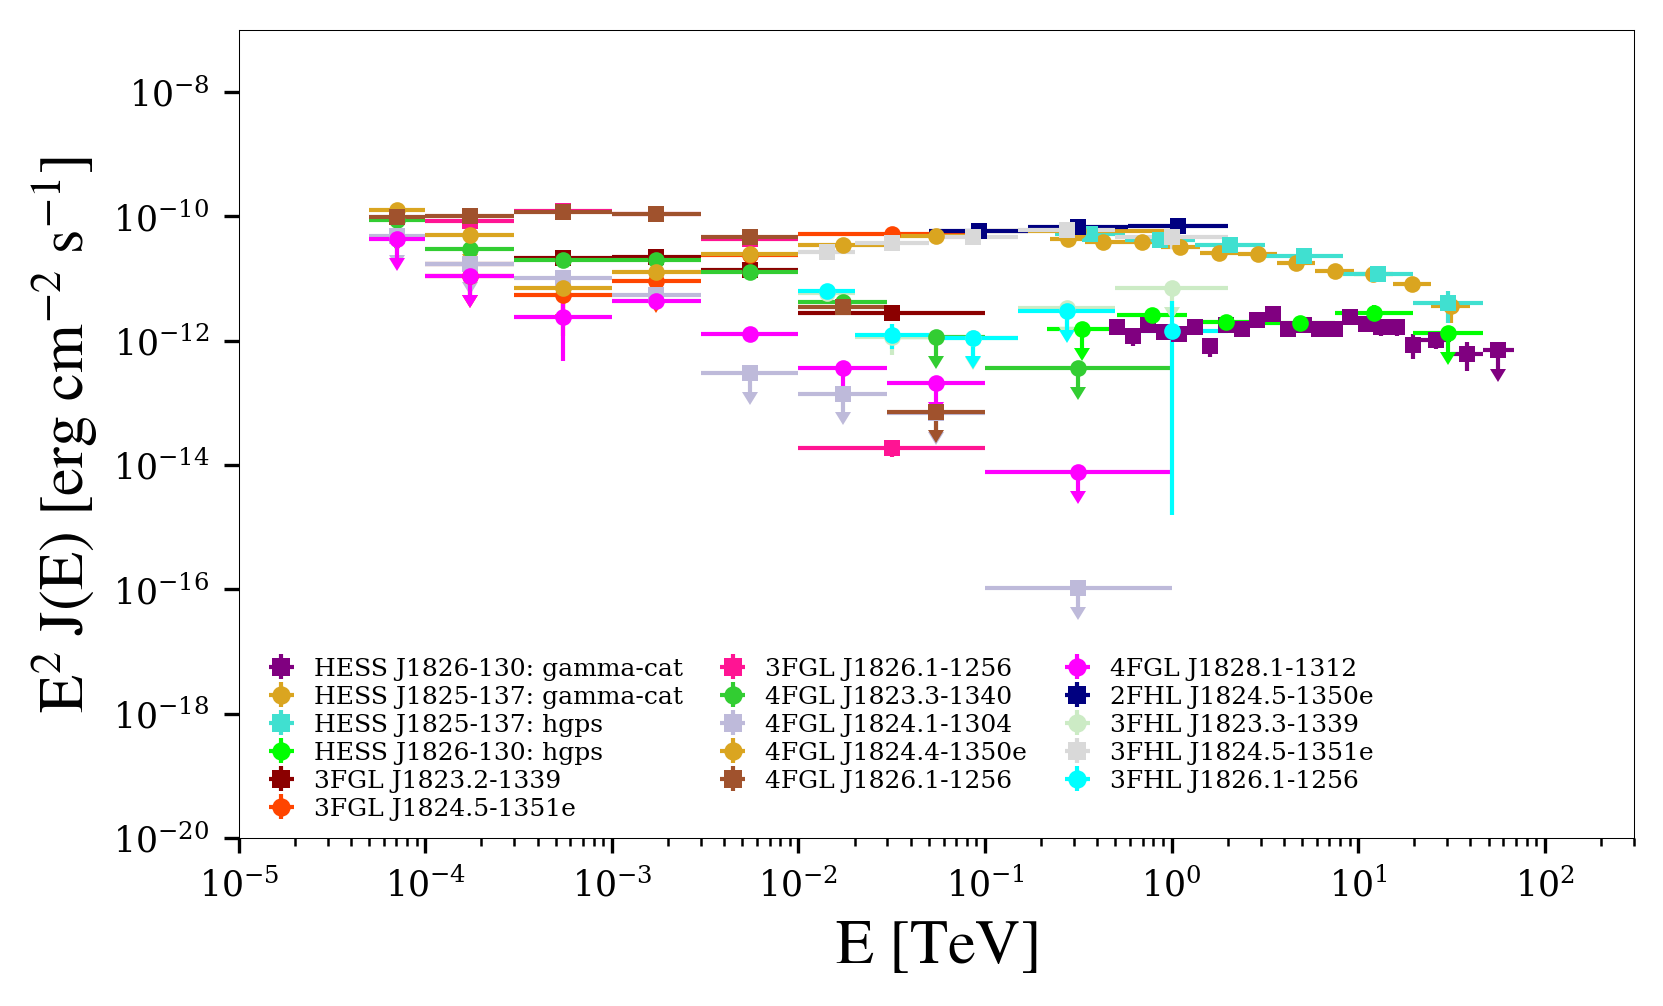

In [35]:
sed_type = cfg.sed_type_e2dnde
yaxis_units="erg cm-2 s-1"
xaxis_units="TeV"

energy_bounds = [1e-5, 3e2] * u.TeV
ylim = [1e-20, 1e-7]

ncol = 3
loc_legend = 'lower left'

plot_flux_points(
    datasets = datasets,
    sed_type = sed_type, 
    yaxis_units=yaxis_units,
    xaxis_units=xaxis_units,
    energy_bounds=energy_bounds, 
    ylim=ylim,
ncol=ncol,
loc_legend = loc_legend
)

<a id='3.2'></a>
🔝 [Back to Top](#intro)<br>
#### 3.2 LHASSO Data Published in the Nature (2021)

In [36]:
path_fp_LHAASO = "/home/born-again/Documents/GitHub/grupo_AAE/data_access_and_selection(DL3)/flux_points_tables/LHASSOColaboration_publishNature_2021"

In [37]:
from astropy.table import Table

file_name = 'J1825_KM2A_201209'
table_J1825 =  LHAASO_table_to_SED_format(path_fp_LHAASO, file_name)
table_J1825_copy = Table(table_J1825, copy=True)

e_ref,e2dnde,e2dnde_errp,e2dnde_errn
TeV,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s)
float64,float64,float64,float64
31.6,1.664e-11,5.2640001e-12,5.2640001e-12
50.1,6.9440001e-12,1.4784e-12,1.4784e-12
79.4,5.5200001e-12,6.5440001e-13,6.5440001e-13
126.0,3.8080001e-12,5.6160001e-13,5.6160001e-13
200.0,9.6000001e-13,3.9040001e-13,3.296e-13
316.0,3.7120001e-13,2.992e-13,2.384e-13
501.0,1.936e-13,3.5520001e-13,1.2416e-13


In [38]:
# file_name = 'J1908_KM2A_201209'
# table_J1908 =  LHAASO_table_to_SED_format(path_fp_LHAASO, file_name)
# table_J1908_copy = Table(table_J1908, copy=True)
# table_J1908_copy

In [39]:
# file_name = 'J2228_KM2A_201209'
# table_J2226 =  LHAASO_table_to_SED_format(path_fp_LHAASO, file_name)
# table_J2226_copy = Table(table_J2226, copy=True)
# table_J2226_copy

In [40]:
from gammapy.modeling.models import LogParabolaSpectralModel

# Gammapy spectral model object:
spectral_model =  LogParabolaSpectralModel(
    alpha=0.92,
    amplitude="1e-12 cm-2 s-1 TeV-1",
    reference=10 * u.TeV,
    beta=1.19,
)
spectral_model_tag = spectral_model.tag[0]
spectral_model_tag_short = spectral_model.tag[0]
spectral_model_name = f"{region_of_interest['source_name']} {spectral_model_tag}"
print(spectral_model)

LogParabolaSpectralModel

  type      name     value         unit      ... max frozen is_norm link
-------- --------- ---------- -------------- ... --- ------ ------- ----
spectral amplitude 1.0000e-12 cm-2 s-1 TeV-1 ... nan  False    True     
spectral reference 1.0000e+01            TeV ... nan   True   False     
spectral     alpha 9.2000e-01                ... nan  False   False     
spectral      beta 1.1900e+00                ... nan  False   False     


In [41]:
# Gammapy sky model object:
sky_model = SkyModel(
    spectral_model=spectral_model, 
    name=spectral_model_name)
print(sky_model)

SkyModel

  Name                      : LHAASO J1825-1326 LogParabolaSpectralModel
  Datasets names            : None
  Spectral model type       : LogParabolaSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    amplitude                     :   1.00e-12   +/- 0.0e+00 1 / (cm2 s TeV)
    reference             (frozen):     10.000       TeV         
    alpha                         :      0.920   +/-    0.00             
    beta                          :      1.190   +/-    0.00             




In [42]:
sky_model_in = sky_model.copy()
# print(sky_model_in)

In [43]:
from gammapy.estimators import FluxPoints

source_name = "LHAASO J1825-1326"
dataset_J1825 = ds_fp_from_table_fp(table_J1825_copy, sky_model)

In [44]:
datasets_J1825 = []
datasets_J1825 = counterparts_datasets
datasets_J1825.append(dataset_J1825)

In [45]:
for index, dataset in enumerate(datasets_J1825):
    print(f'{index}: {dataset.name} flux points table') 

0: HESS J1826-130: gamma-cat flux points table
1: HESS J1825-137: gamma-cat flux points table
2: HESS J1825-137: hgps flux points table
3: HESS J1826-130: hgps flux points table
4: 3FGL J1823.2-1339 flux points table
5: 3FGL J1824.5-1351e flux points table
6: 3FGL J1826.1-1256 flux points table
7: 4FGL J1823.3-1340 flux points table
8: 4FGL J1824.1-1304 flux points table
9: 4FGL J1824.4-1350e flux points table
10: 4FGL J1826.1-1256 flux points table
11: 4FGL J1828.1-1312 flux points table
12: 2FHL J1824.5-1350e flux points table
13: 3FHL J1823.3-1339 flux points table
14: 3FHL J1824.5-1351e flux points table
15: 3FHL J1826.1-1256 flux points table
16: LHAASO J1825-1326 flux points table


Directory 'flux_points/figures' created


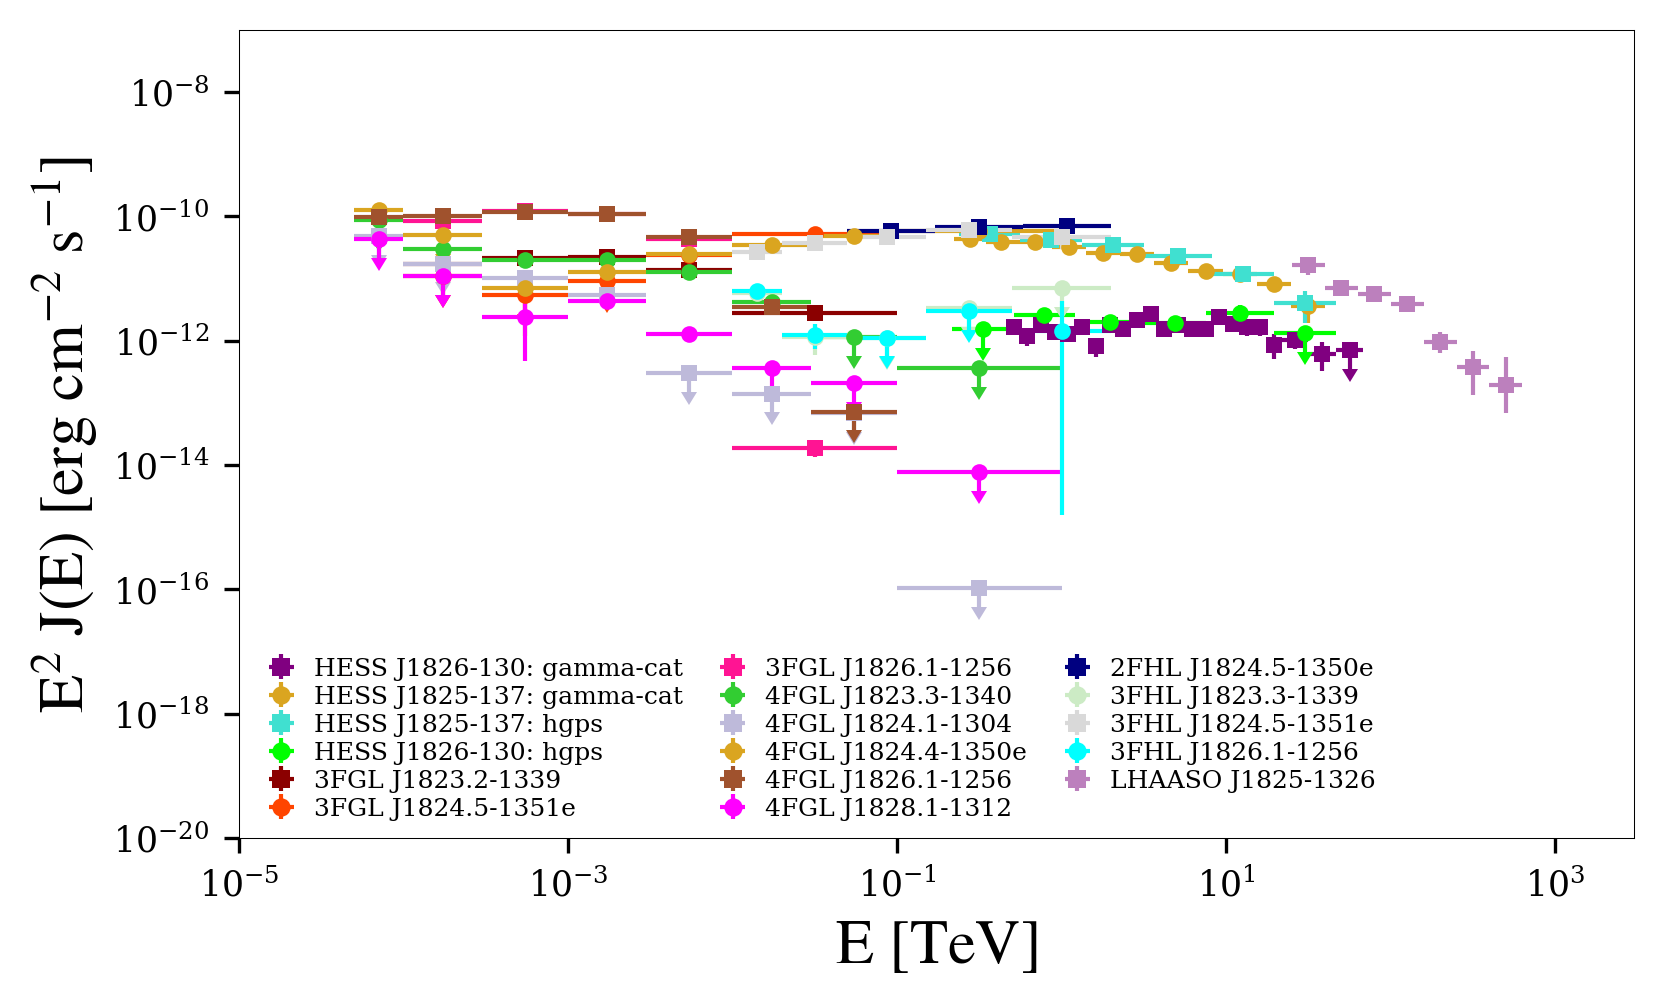

In [46]:
sed_type = cfg.sed_type_e2dnde
yaxis_units="erg cm-2 s-1"
xaxis_units="TeV"

energy_bounds = [1e-5, 3e3] * u.TeV
ylim = [1e-20, 1e-7]

ncol = 3
loc_legend = 'lower left'

plot_flux_points(
    datasets = datasets_J1825,
    sed_type = sed_type, 
    yaxis_units=yaxis_units,
    xaxis_units=xaxis_units,
    energy_bounds=energy_bounds, 
    ylim=ylim,
ncol=ncol,
loc_legend = loc_legend
)

<a id='4.0'></a>
🔝 [Back to Top](#indice)<br>
## 4. Analysis

<a id='4.1'></a>
🔝 [Back to Top](#intro)<br>
#### 4.1 HESS J1825-137

In [47]:
ds_fp_HESS137 = [datasets_J1825[1],datasets_J1825[2],datasets_J1825[5], datasets_J1825[9],datasets_J1825[14]]

In [48]:
for index, dataset in enumerate(ds_fp_HESS137):
    print(f'{index}: {dataset.name} flux points table') 

0: HESS J1825-137: gamma-cat flux points table
1: HESS J1825-137: hgps flux points table
2: 3FGL J1824.5-1351e flux points table
3: 4FGL J1824.4-1350e flux points table
4: 3FHL J1824.5-1351e flux points table


In [49]:
# source_name = "LHAASO J1825-1326"
# ds_fp_HESS137.append(ds_fp_from_table_fp(table_J1825_copy, sky_model))

In [50]:
# for index, dataset in enumerate(ds_fp_HESS137):
#     print(f'{index}: {dataset.name} flux points table') 

Directory 'flux_points/figures' created


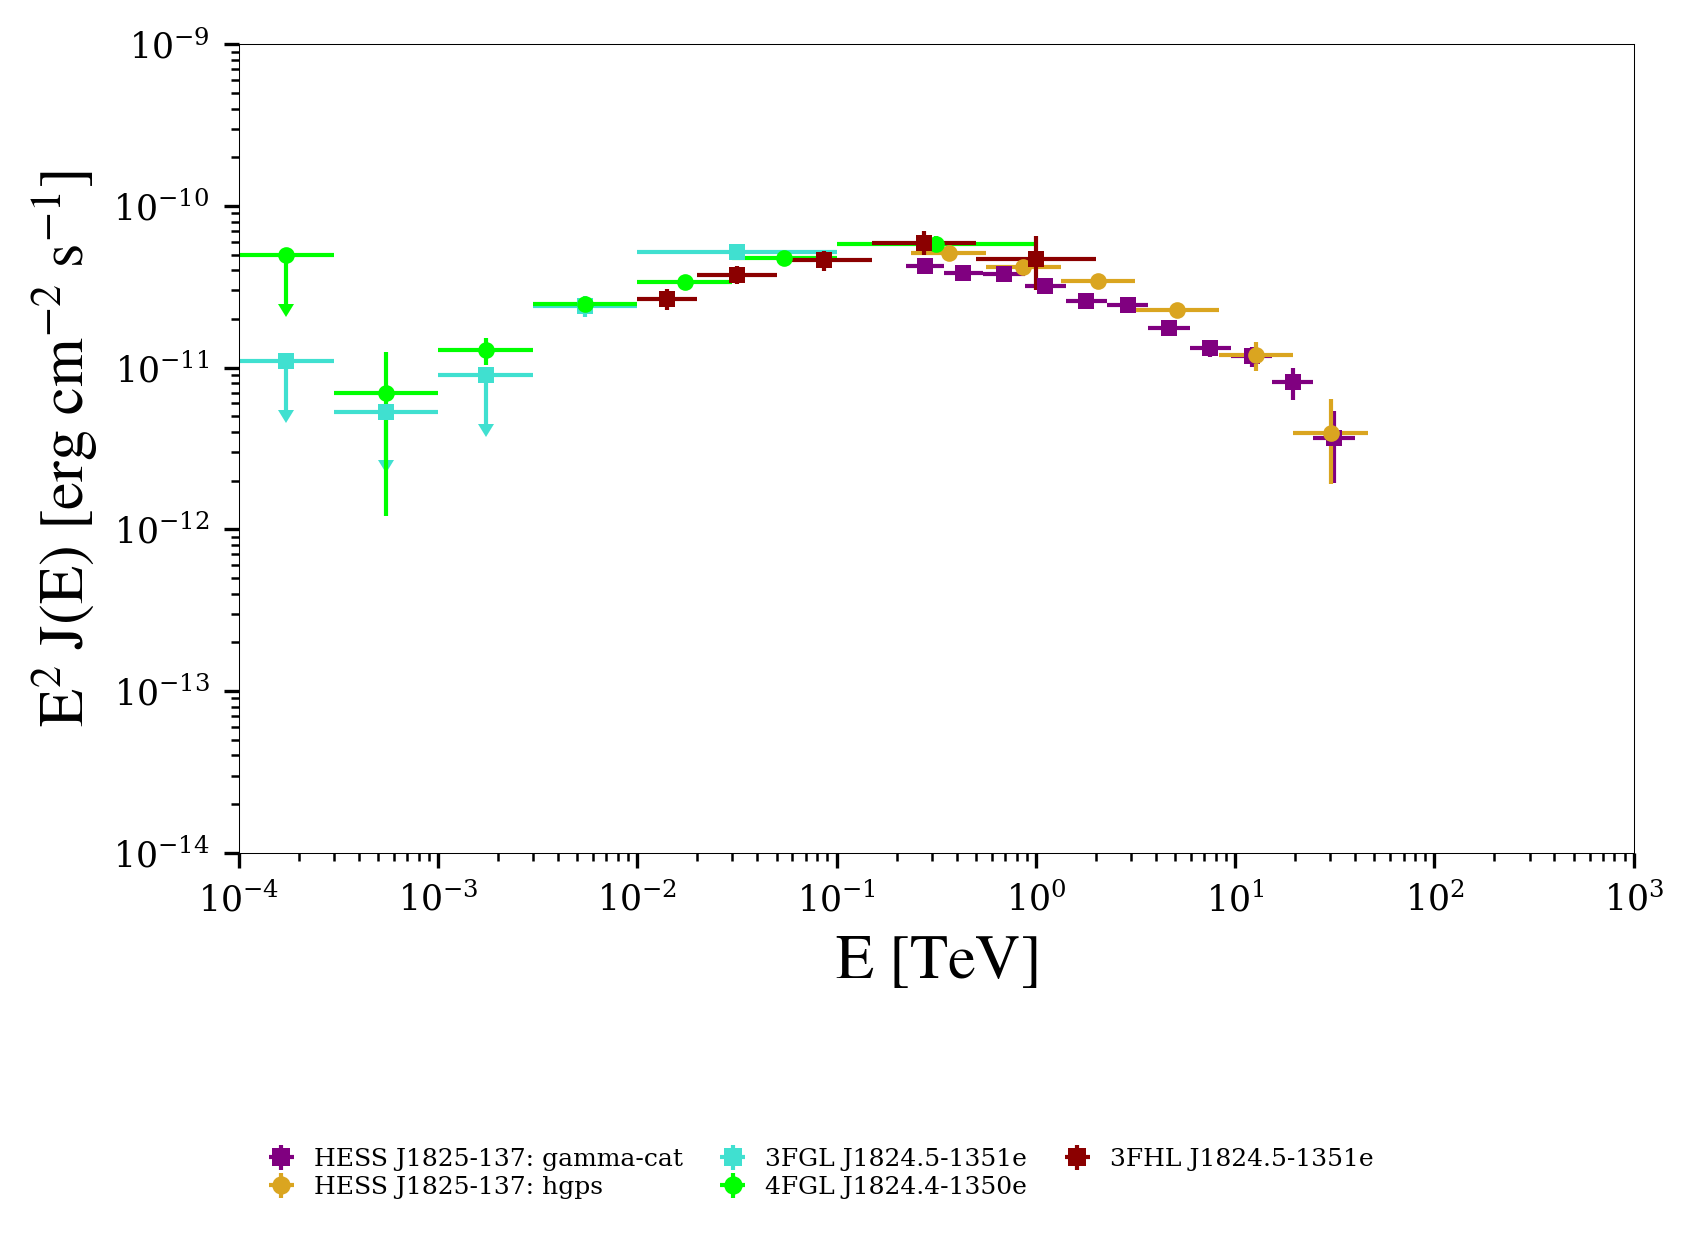

In [51]:
datasets = Datasets(ds_fp_HESS137)
CTA = 1
CTA_plot = False
spectral_plot = False

bbox_to_anchor=(0, -0.45)
energy_bounds = [1e-4, 1e3] * u.TeV
ylim = [1e-14, 1e-9]

leg_out = True
bbox_to_anchor=(0, -0.45)
loc_legend = 'lower left'
ncol = 3

SED_fp(
    datasets = datasets,
    spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

In [52]:
from gammapy.modeling import Fit

datasets.models = sky_model
print(datasets)
fitter = Fit()
result_fit = fitter.run(datasets=datasets)

Datasets
--------

Dataset 0: 

  Type       : FluxPointsDataset
  Name       : HESS J1825-137: gamma-cat
  Instrument : 
  Models     : ['LHAASO J1825-1326 LogParabolaSpectralModel']

Dataset 1: 

  Type       : FluxPointsDataset
  Name       : HESS J1825-137: hgps
  Instrument : 
  Models     : ['LHAASO J1825-1326 LogParabolaSpectralModel']

Dataset 2: 

  Type       : FluxPointsDataset
  Name       : 3FGL J1824.5-1351e
  Instrument : 
  Models     : ['LHAASO J1825-1326 LogParabolaSpectralModel']

Dataset 3: 

  Type       : FluxPointsDataset
  Name       : 4FGL J1824.4-1350e
  Instrument : 
  Models     : ['LHAASO J1825-1326 LogParabolaSpectralModel']

Dataset 4: 

  Type       : FluxPointsDataset
  Name       : 3FHL J1824.5-1351e
  Instrument : 
  Models     : ['LHAASO J1825-1326 LogParabolaSpectralModel']




/home/born-again/anaconda3/envs/gammapy-1.0/lib/python3.9/site-packages/astropy/units/quantity.py:620: RuntimeWarning: overflow encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/born-again/anaconda3/envs/gammapy-1.0/lib/python3.9/site-packages/gammapy/datasets/flux_points.py:288: RuntimeWarning: overflow encountered in square
  return ((data - model) / sigma.quantity[:, 0, 0]).to_value("") ** 2


In [53]:
print(result_fit.parameters.to_table())

  type      name     value         unit      ... max frozen is_norm link
-------- --------- ---------- -------------- ... --- ------ ------- ----
spectral amplitude 7.6353e-14 cm-2 s-1 TeV-1 ... nan  False    True     
spectral reference 1.0000e+01            TeV ... nan   True   False     
spectral     alpha 2.6112e+00                ... nan  False   False     
spectral      beta 6.9829e-02                ... nan  False   False     


Directory 'flux_points/figures' created


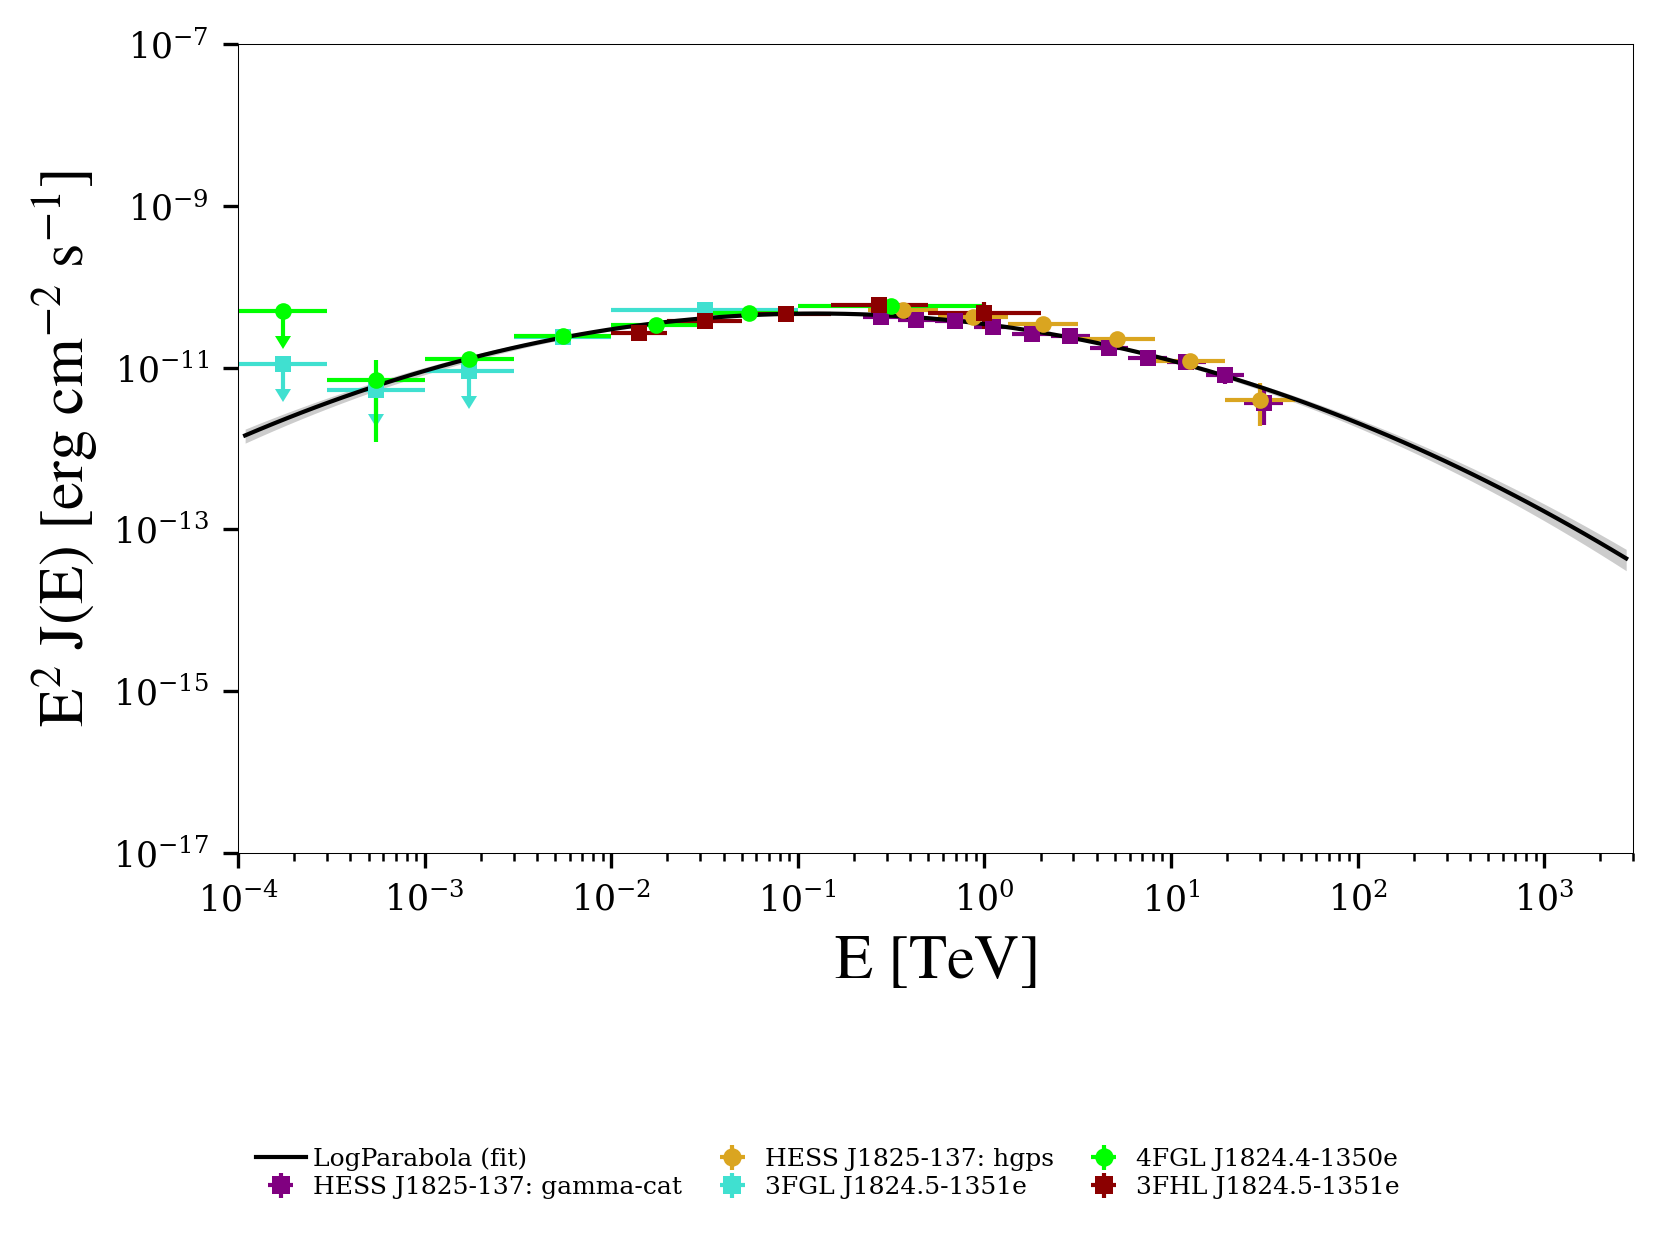

In [54]:
CTA = 1
CTA_plot = False
spectral_plot = True

energy_bounds = [1e-4, 3e3] * u.TeV
ylim = [1e-17, 1e-7]

leg_out = True
loc_legend = 'lower left'
bbox_to_anchor=(0, -0.45)
ncol = 3

SED_fp(
    datasets = datasets,
    spectral_model=spectral_model, 
    sed_type = sed_type, 
    yaxis_units=yaxis_units, 
    energy_bounds=energy_bounds, 
    ylim=ylim)

In [55]:
source_name = "LHAASO J1825-1326"
ds_fp_HESS137.append(ds_fp_from_table_fp(table_J1825_copy, sky_model))

In [56]:
for index, dataset in enumerate(ds_fp_HESS137):
    print(f'{index}: {dataset.name} flux points table') 

0: HESS J1825-137: gamma-cat flux points table
1: HESS J1825-137: hgps flux points table
2: 3FGL J1824.5-1351e flux points table
3: 4FGL J1824.4-1350e flux points table
4: 3FHL J1824.5-1351e flux points table
5: LHAASO J1825-1326 flux points table


Directory 'flux_points/figures' created


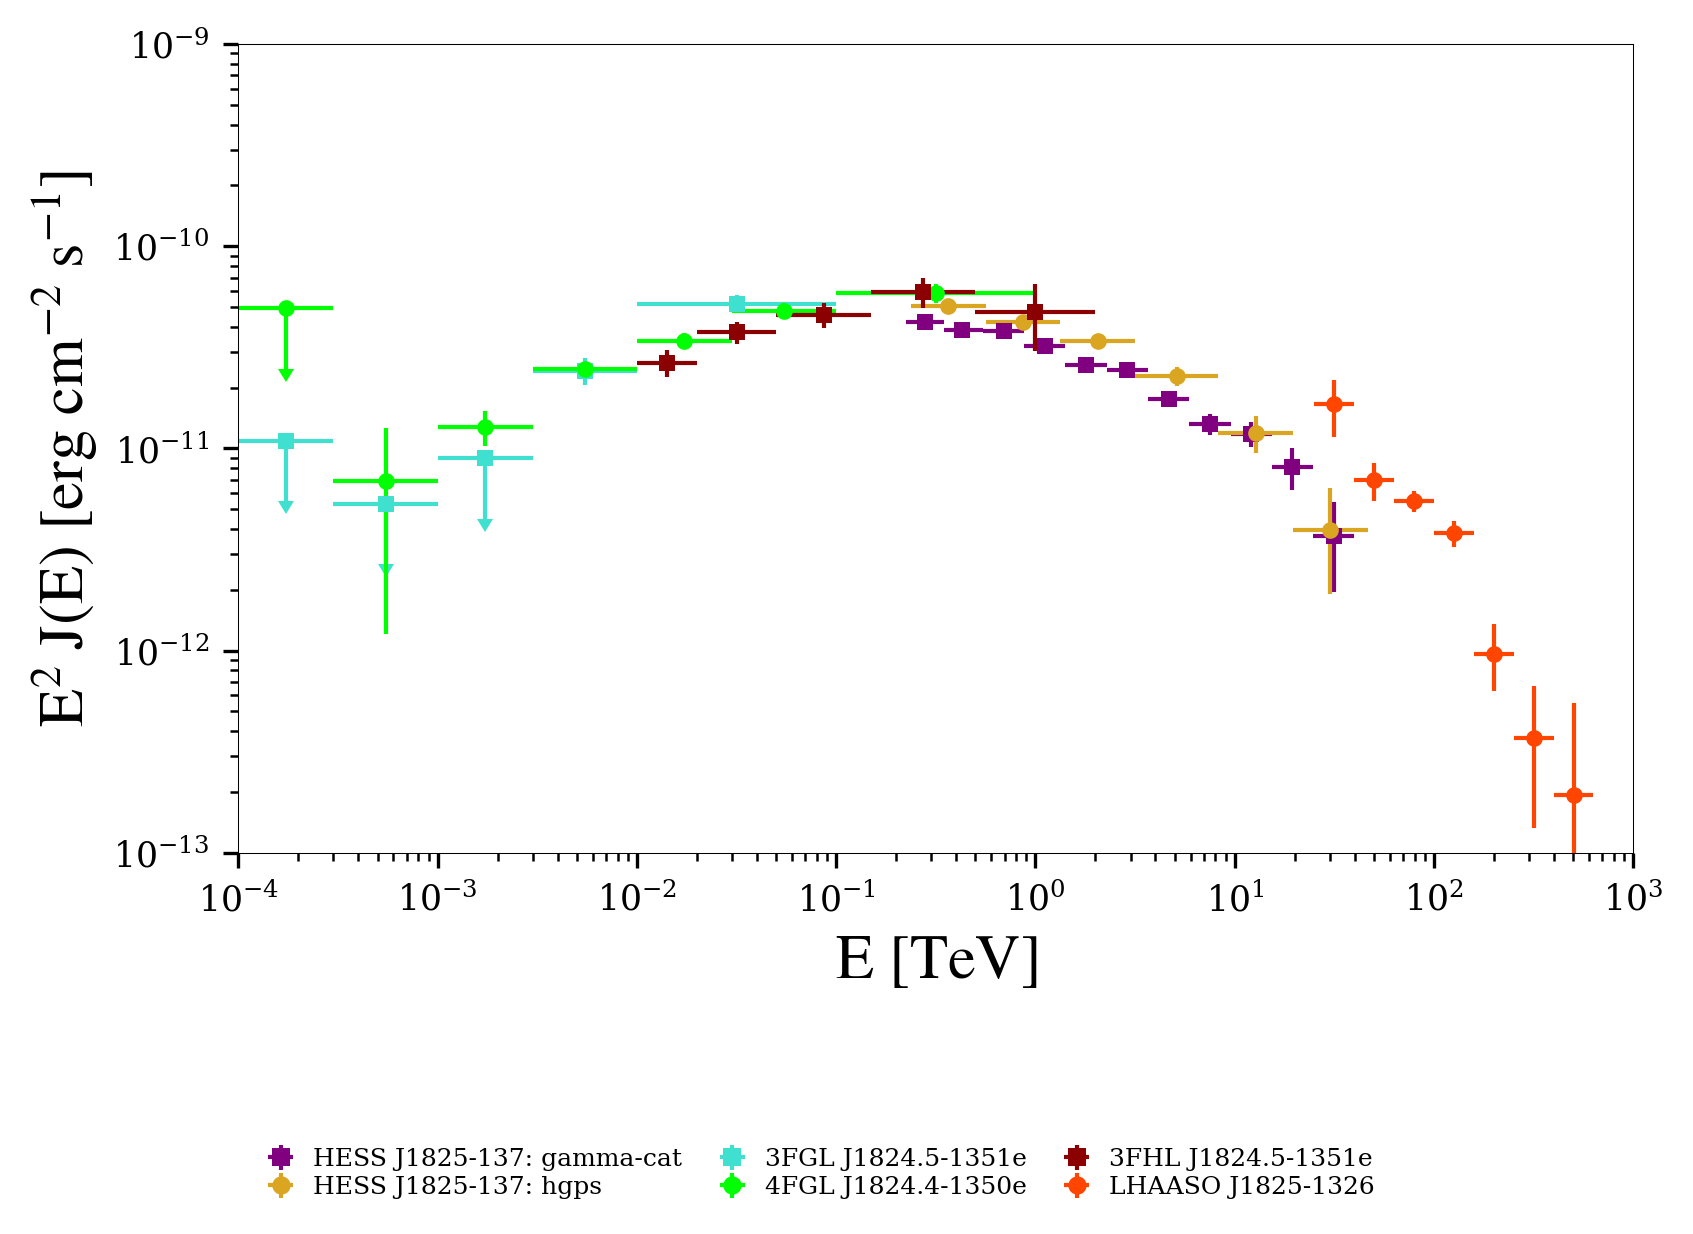

In [57]:
datasets = Datasets(ds_fp_HESS137)
CTA = 1
CTA_plot = False
spectral_plot = False
loc_legend = 'lower left'
leg_out = True
bbox_to_anchor=(0, -0.45)
energy_bounds = [1e-4, 1e3] * u.TeV
ylim = [1e-13, 1e-9]

leg_out = True
bbox_to_anchor=(0, -0.45)
loc_legend = 'lower left'
ncol = 3

SED_fp(
    datasets = datasets,
    spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

In [58]:
from gammapy.modeling import Fit

datasets.models = sky_model
print(datasets)
fitter = Fit()
result_fit = fitter.run(datasets=datasets)

Datasets
--------

Dataset 0: 

  Type       : FluxPointsDataset
  Name       : HESS J1825-137: gamma-cat
  Instrument : 
  Models     : ['LHAASO J1825-1326 LogParabolaSpectralModel']

Dataset 1: 

  Type       : FluxPointsDataset
  Name       : HESS J1825-137: hgps
  Instrument : 
  Models     : ['LHAASO J1825-1326 LogParabolaSpectralModel']

Dataset 2: 

  Type       : FluxPointsDataset
  Name       : 3FGL J1824.5-1351e
  Instrument : 
  Models     : ['LHAASO J1825-1326 LogParabolaSpectralModel']

Dataset 3: 

  Type       : FluxPointsDataset
  Name       : 4FGL J1824.4-1350e
  Instrument : 
  Models     : ['LHAASO J1825-1326 LogParabolaSpectralModel']

Dataset 4: 

  Type       : FluxPointsDataset
  Name       : 3FHL J1824.5-1351e
  Instrument : 
  Models     : ['LHAASO J1825-1326 LogParabolaSpectralModel']

Dataset 5: 

  Type       : FluxPointsDataset
  Name       : LHAASO J1825-1326
  Instrument : 
  Models     : ['LHAASO J1825-1326 LogParabolaSpectralModel']




Directory 'flux_points/figures' created


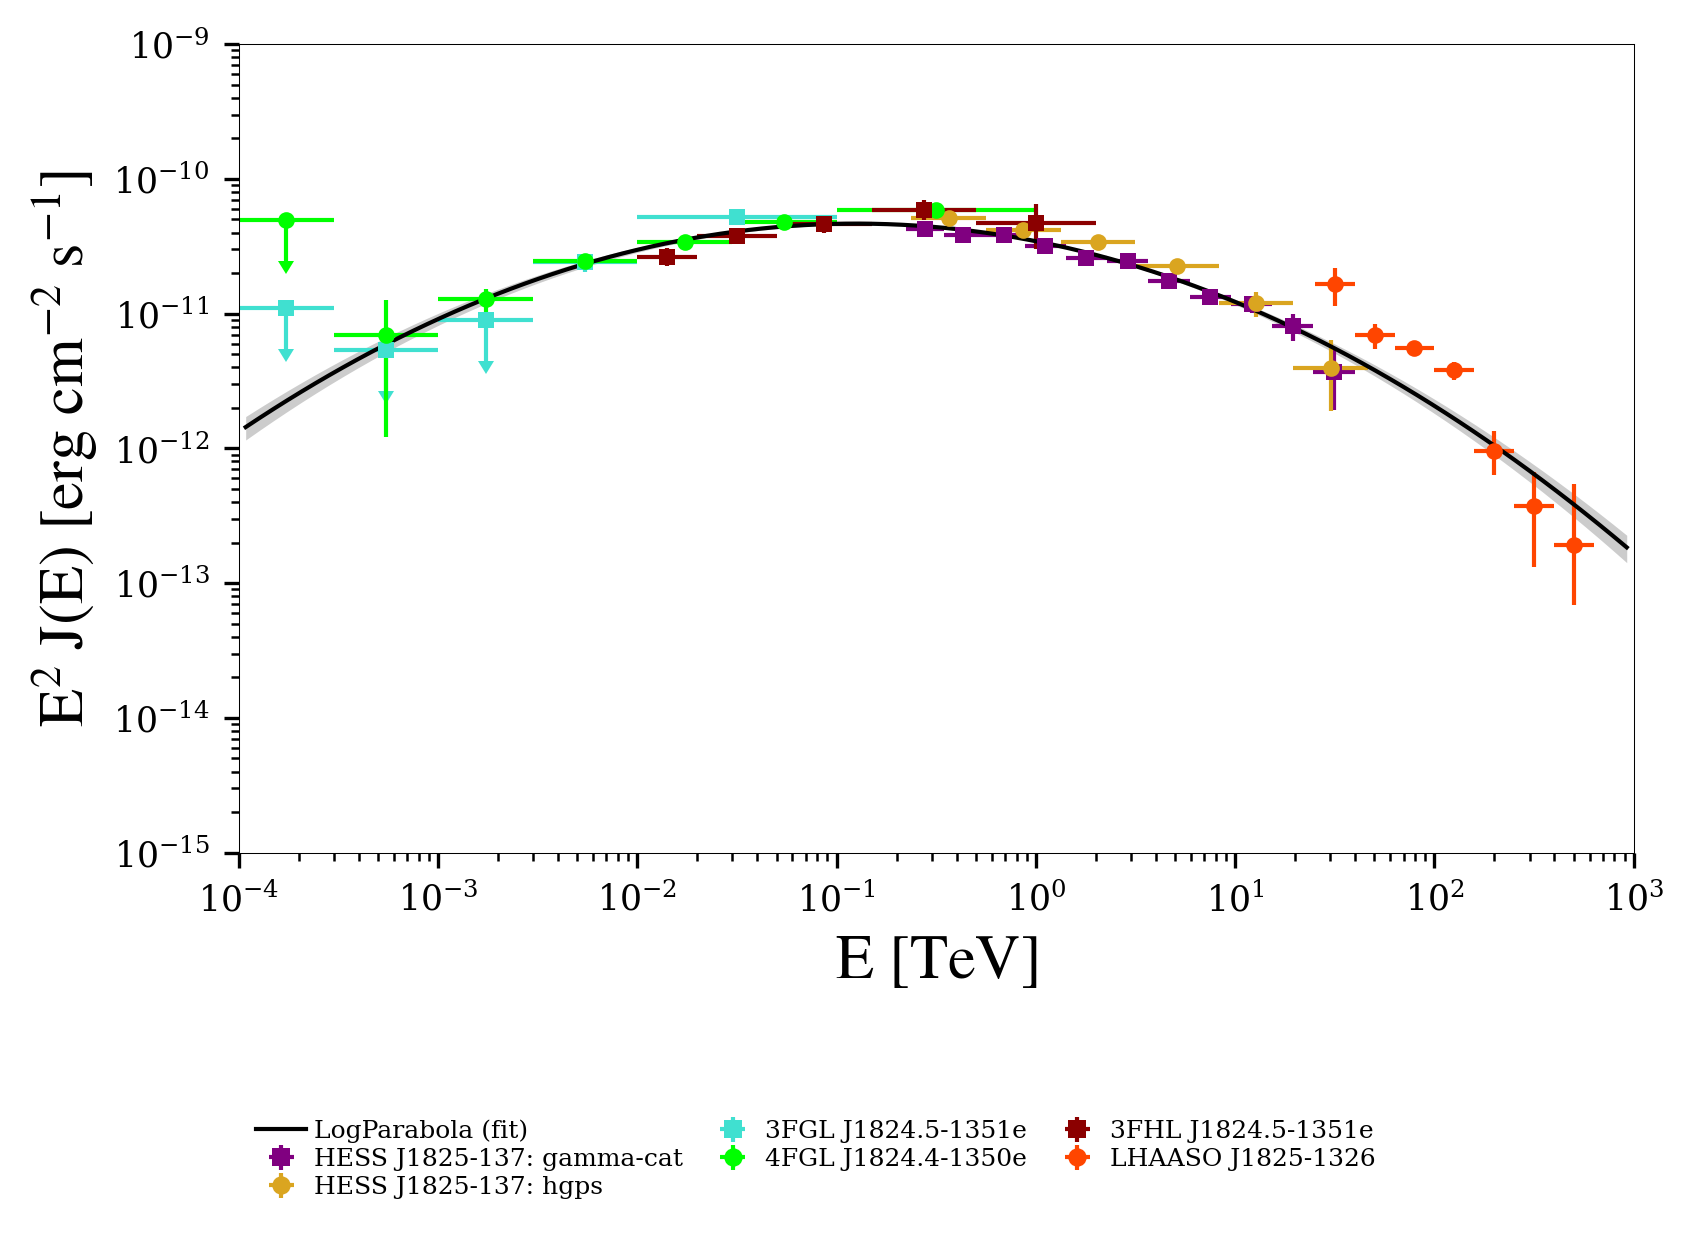

In [59]:
CTA = 1
CTA_plot = False
spectral_plot = True
loc_legend = 'lower left'
leg_out = True
bbox_to_anchor=(0, -0.45)
energy_bounds = [1e-4, 1e3] * u.TeV
ylim = [1e-15, 1e-9]

leg_out = True
bbox_to_anchor=(0, -0.45)
loc_legend = 'lower left'
ncol = 3

SED_fp(
    datasets = datasets,
    spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

In [60]:
print(result_fit.parameters.to_table())

  type      name     value         unit      ... max frozen is_norm link
-------- --------- ---------- -------------- ... --- ------ ------- ----
spectral amplitude 7.6352e-14 cm-2 s-1 TeV-1 ... nan  False    True     
spectral reference 1.0000e+01            TeV ... nan   True   False     
spectral     alpha 2.6111e+00                ... nan  False   False     
spectral      beta 6.9829e-02                ... nan  False   False     


<a id='3.2'></a>
🔝 [Back to Top](#intro)<br>
#### 3.2 CTA Simulations

In [61]:
irf_site = 1 # 0 or 1

In [62]:
irf_name = f'{cfg.irf_loc[irf_site][irf_site]}_z{cfg.irf_z[0]}_{cfg.irf_h[1]}h'
irf_name

'South_z20_5h'

In [63]:
src_jname = "PSR J1826-1256"  # Pulsar name based on J2000 coordinates;  
src_id  = src_jname.replace(" ", "_") # Name of identified or likely associated source

In [64]:
# src_jname = "PSR J1826-1334"  # Pulsar name based on J2000 coordinates;  
# src_id  = src_jname.replace(" ", "_") # Name of identified or likely associated source

In [65]:
file_name = f'{src_id}_{irf_name}'
file_name

'PSR_J1826-1256_South_z20_5h'

In [66]:
PSR_name_1 = f'CTA - {src_id}'
path_file = f"/home/born-again/Documents/GitHub/gammapy/my-notebooks/pulsars/{src_id}/flux_points/tables"
table_CTA_1 = Table.read(f"{path_file}/{file_name}{cfg.format_csv}",format='ascii', delimiter=' ', comment='#')
# table_CTA_1

In [67]:
# PSR_name_2 = 'CTA - PSR J1826-1256'
# path_file = "flux_points_tables/PSR_J1826-1256_CTA_simulations"
# table_CTA_2 = Table.read(f"{path_file}/CTA_J1826-1256_South_z20_5h.csv",format='ascii', delimiter=' ', comment='#')
# # table_CTA_1

In [68]:
source_name = f'CTA simulations - {src_id}'

dataset_CTA = ds_fp_from_table_fp(table_CTA_1, sky_model)

In [69]:
datasets_CTA = []
datasets_CTA = ds_fp_HESS137
datasets_CTA.append(dataset_CTA)

Directory 'flux_points/figures' created


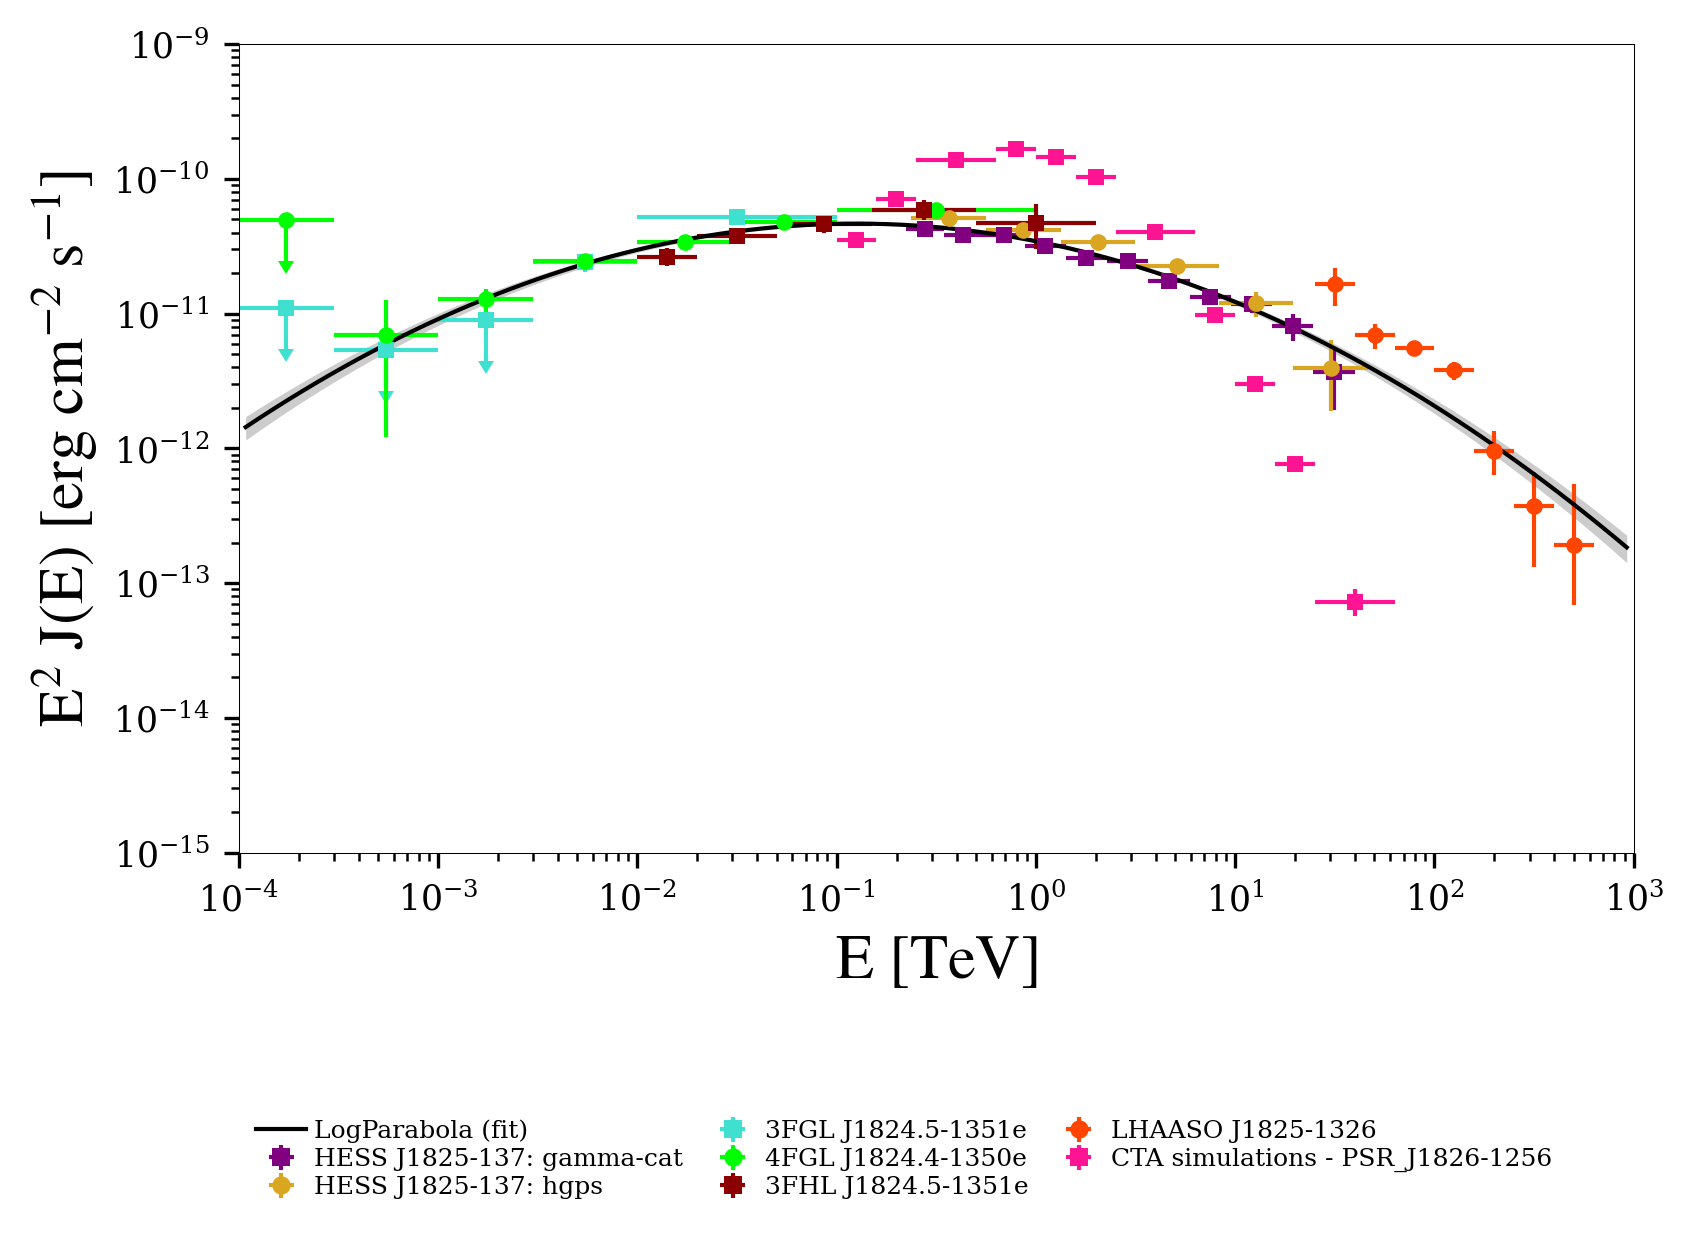

In [70]:
datasets = Datasets(datasets_CTA)

CTA = 1
CTA_plot = False
spectral_plot = True
loc_legend = 'lower left'
leg_out = True
bbox_to_anchor=(0, -0.45)
energy_bounds = [1e-4, 1e3] * u.TeV
ylim = [1e-15, 1e-9]

leg_out = True
bbox_to_anchor=(0, -0.45)
loc_legend = 'lower left'
ncol = 3

SED_fp(
    datasets = datasets,
    spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

<a id='3.2'></a>
🔝 [Back to Top](#intro)<br>
#### 3.2 LHASSO Data Published in the Nature (2021)

In [71]:
path_fp_LHAASO = "/home/born-again/Documents/GitHub/grupo_AAE/data_access_and_selection(DL3)/flux_points_tables/LHASSOColaboration_publishNature_2021"

In [72]:
# import numpy as np
# from astropy import units as u
from astropy.table import Table
# from gammapy.utils.scripts import make_path

file_name = 'J1825_KM2A_201209'
table_J1825 =  LHAASO_table_to_SED_format(path_fp_LHAASO, file_name)
table_J1825_copy = Table(table_J1825, copy=True)

e_ref,e2dnde,e2dnde_errp,e2dnde_errn
TeV,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s)
float64,float64,float64,float64
31.6,1.664e-11,5.2640001e-12,5.2640001e-12
50.1,6.9440001e-12,1.4784e-12,1.4784e-12
79.4,5.5200001e-12,6.5440001e-13,6.5440001e-13
126.0,3.8080001e-12,5.6160001e-13,5.6160001e-13
200.0,9.6000001e-13,3.9040001e-13,3.296e-13
316.0,3.7120001e-13,2.992e-13,2.384e-13
501.0,1.936e-13,3.5520001e-13,1.2416e-13


In [73]:
# file_name = 'J1908_KM2A_201209'
# table_J1908 =  LHAASO_table_to_SED_format(path_fp_LHAASO, file_name)
# table_J1908_copy = Table(table_J1908, copy=True)
# table_J1908_copy

In [74]:
# file_name = 'J2228_KM2A_201209'
# table_J2226 =  LHAASO_table_to_SED_format(path_fp_LHAASO, file_name)
# table_J2226_copy = Table(table_J2226, copy=True)
# table_J2226_copy

In [75]:
from gammapy.estimators import FluxPoints

source_name = "LHAASO J1825-1326"
dataset_J1825 = ds_fp_from_table_fp(table_J1825_copy, sky_model)

In [76]:
datasets_J1825 = []
len(counterparts_datasets)

17

In [77]:
datasets_J1825 = []
datasets_J1825 = counterparts_datasets
datasets_J1825.append(dataset_J1825)

In [78]:
for index, dataset in enumerate(datasets_J1825):
    print(f'{index}: {dataset.name} flux points table') 

0: HESS J1826-130: gamma-cat flux points table
1: HESS J1825-137: gamma-cat flux points table
2: HESS J1825-137: hgps flux points table
3: HESS J1826-130: hgps flux points table
4: 3FGL J1823.2-1339 flux points table
5: 3FGL J1824.5-1351e flux points table
6: 3FGL J1826.1-1256 flux points table
7: 4FGL J1823.3-1340 flux points table
8: 4FGL J1824.1-1304 flux points table
9: 4FGL J1824.4-1350e flux points table
10: 4FGL J1826.1-1256 flux points table
11: 4FGL J1828.1-1312 flux points table
12: 2FHL J1824.5-1350e flux points table
13: 3FHL J1823.3-1339 flux points table
14: 3FHL J1824.5-1351e flux points table
15: 3FHL J1826.1-1256 flux points table
16: LHAASO J1825-1326 flux points table
17: LHAASO J1825-1326 flux points table


In [79]:
datasets = Datasets(datasets_J1825)

ValueError: Dataset names must be unique

In [ ]:
from gammapy.modeling import Fit

datasets.models = sky_model_in
print(datasets)
fitter = Fit()
result_fit = fitter.run(datasets=datasets)

In [ ]:
print(result_fit.parameters.to_table())

In [ ]:
print(sky_model_in.spectral_model)

In [ ]:
CTA = 1
CTA_plot = False
spectral_plot = True

energy_bounds = [1e-4, 3e3] * u.TeV
ylim = [1e-17, 1e-7]

leg_out = True
loc_legend = 'lower left'
bbox_to_anchor=(0, -0.45)
ncol = 3

SED_fp(
    datasets = datasets,
    spectral_model=sky_model_in.spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

<a id='3.2'></a>
🔝 [Back to Top](#intro)<br>
#### 3.2 CTA Simulations

In [ ]:
irf_site = 1 # 0 or 1

In [ ]:
irf_name = f'{cfg.irf_loc[irf_site][irf_site]}_z{cfg.irf_z[0]}_{cfg.irf_h[1]}h'
irf_name

In [ ]:
# src_jname = "PSR J1826-1256"  # Pulsar name based on J2000 coordinates;  
# src_id  = src_jname.replace(" ", "_") # Name of identified or likely associated source

src_jname = "PSR J1826-1334"  # Pulsar name based on J2000 coordinates;  
src_id  = src_jname.replace(" ", "_") # Name of identified or likely associated source

In [ ]:
file_name = f"{src_id}_{irf_name}"
file_name

In [ ]:
PSR_name_1 = f'CTA - {src_id}'
path_file = f"/home/born-again/Documents/GitHub/gammapy/my-notebooks/pulsars/{src_id}/flux_points/tables"
table_CTA_1 = Table.read(f"{path_file}/{file_name}{cfg.format_csv}",format='ascii', delimiter=' ', comment='#')
# table_CTA_1

In [ ]:
PSR_name_2 = 'CTA - PSR J1826-1256'
path_file = "flux_points_tables/PSR_J1826-1256_CTA_simulations"
table_CTA_2 = Table.read(f"{path_file}/CTA_J1826-1256_South_z20_5h.csv",format='ascii', delimiter=' ', comment='#')
# table_CTA_1

In [ ]:
source_name = 'CTA simulations - PSR J1826-1334'

dataset_CTA = ds_fp_from_table_fp(table_CTA_1, sky_model)

In [ ]:
datasets_CTA = []
datasets_CTA = datasets_J1825
datasets_CTA.append(dataset_CTA)

In [ ]:
source_name = 'CTA simulations - PSR J1826-1334'
ds_fp_HESS137.append(ds_fp_from_table_fp(table_CTA_1, sky_model))

In [ ]:
from astropy import units as u

from gammapy.modeling import Fit
from gammapy.modeling.models import (
    Models,
    SuperExpCutoffPowerLaw4FGLDR3SpectralModel,
    ExpCutoffPowerLawSpectralModel,
    LogParabolaSpectralModel,
    PowerLawSpectralModel,
    SkyModel,
)

In [ ]:
energy_bounds = [1e-5, 3e2] * u.TeV
ylim = [1e-17, 1e-7]

In [ ]:
def plot_SED():
#     plt.style.use(['science', 'notebook', 'grid'])

    plt.figure(figsize=(8,6))

    ax = spectral_model.plot(energy_bounds, sed_type="e2dnde", color="red")
    ax = spectral_model.plot_error(energy_bounds, sed_type="e2dnde")
    flux_points.plot(
        ax=ax,
        sed_type="e2dnde"
    )
    ax.text(0.02, .94, source_name, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'), size=13)

    ax.set_ylim(ylim)
    ax.set_xlim(energy_bounds)

    # plt.title(f"{source_name}: {counterpart_name}")
    plt.legend([spectral_model_tag, "Error", f"{counterpart_name} - {catalog_tag}"], facecolor='white', edgecolor='black',  loc='upper right', prop={'size': 8})
    plt.xlabel("Energy (TeV)")   
    plt.ylabel(r"$E^{2}$dN/dE (erg $cm^{-2}$ $s^{-1}$)")
    plt.savefig(file_path, bbox_inches='tight')
    
    plt.show()

In [ ]:


for catalog in catalogs_roi: 
            
    # to select a catalog:
    catalog_tag = catalog.tag
    # print(catalog)
    
    for index, source in enumerate(catalog):
        
        try:
            flux_points = source.flux_points

            # Gammapy sky model object:
            sky_model = source.sky_model()

            # Gammapy spatial model object:
            spatial_model = source.spatial_model

            # Gammapy spectral model object:
            spectral_model = source.spectral_model()
            spectral_model_tag = spectral_model.tag[0]
            spectral_model_tag_short = spectral_model.tag[0]

        #     file_name = f'{source_name}_{counterpart_txt}_{catalog_tag}_{spectral_model_tag_short}.png'
            file_name = f'{source_name}_{catalog_tag}_{spectral_model_tag_short}.png'

            file_path = path_SED_from_catalogs / file_name 

            plot_SED()

        #     print(f'{source_txt}_{counterpart_txt}_{catalog_tag}_{spectral_model_tag_short}:')

            print(spectral_model.parameters.to_table())
            
        except Exception as error:
           # By this way we can know about the type of error occurring
            print("The error is: ",error)

## LHAASO J1825-1326

In [ ]:
unit_deg = 'deg'
source_name = "LHAASO J1825-1326"  # Source name based on J2000 coordinates  
source_RA = 276.45 # Right ascension 
source_dec = -13.45 # Declination (degrees)
angle_separation = 1 # (in degrees) 

In [ ]:
counterparts, counterparts_datasets = get_flux_points_tables(source_name, source_RA, source_dec, angle_separation)        

In [ ]:
display(counterparts_datasets)

In [ ]:
datasets = Datasets(counterparts_datasets)

In [ ]:
spectral_model =  LogParabolaSpectralModel(
    alpha=0.92,
    amplitude="1e-12 cm-2 s-1 TeV-1",
    reference=1 * u.TeV,
    beta=1.19,
)
spectral_model_name=spectral_model.tag[0]

sky_model = SkyModel(spectral_model=spectral_model, name=spectral_model_name)

In [ ]:
kwargs_axis = {"units": ["TeV cm-2 s-1", "TeV"],
                "limits": [[1e-5, 1e2] * u.TeV, 
                          [1e-13, 1e-9]],  
               }
    
kwargs_legend = {"loc": "",
                  "ncol": ,  
                  
               }

In [ ]:
CTA = 1
CTA_plot = False
spectral_plot = False

energy_bounds = [1e-5, 3e2] * u.TeV
ylim = [1e-17, 1e-7]

leg_out = True
loc_legend = 'lower left'
bbox_to_anchor=(0, -0.45)
ncol = 3

SED_fp(
    datasets = datasets,
    spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

In [ ]:
for index, dataset in enumerate(counterparts_datasets):
    print(f'{index}: {dataset.name} flux points table') 

In [ ]:
ds_fp_HESS137 = [counterparts_datasets[1],counterparts_datasets[2],counterparts_datasets[4],counterparts_datasets[5],counterparts_datasets[7], counterparts_datasets[8], counterparts_datasets[9],counterparts_datasets[12],counterparts_datasets[13],counterparts_datasets[14]]

In [ ]:
ds_fp_HESS137 = [counterparts_datasets[1],counterparts_datasets[2],counterparts_datasets[5], counterparts_datasets[9],counterparts_datasets[14]]

In [ ]:
for index, dataset in enumerate(ds_fp_HESS137):
    print(f'{index}: {dataset.name} flux points table') 

In [ ]:
datasets = Datasets(ds_fp_HESS137)
CTA = 1
CTA_plot = False
spectral_plot = False
loc_legend = 'lower left'
leg_out = True
bbox_to_anchor=(0, -0.45)
energy_bounds = [1e-4, 1e2] * u.TeV
ylim = [1e-13, 1e-9]

leg_out = True
bbox_to_anchor=(0, -0.45)
loc_legend = 'lower left'
ncol = 3

SED_fp(
    datasets = datasets,
    spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

In [ ]:
source_name = "LHAASO J1825-1326"
ds_fp_HESS137.append(ds_fp_from_table_fp(table_J1825_copy, sky_model))

In [ ]:
for index, dataset in enumerate(ds_fp_HESS137):
    print(f'{index}: {dataset.name} flux points table') 

<a id='3.2'></a>
🔝 [Back to Top](#intro)<br>
#### 3.2 CTA Simulations

In [ ]:
PSR_name_1 = 'CTA - PSR J1826-1334'
PSR_name_2 = 'CTA - PSR J1826-1256'
table_CTA_1 = Table.read('CTA_J1826-1334_South_z20_5h.csv',format='ascii', delimiter=' ', comment='#')
# table_CTA_1
table_CTA_2 = Table.read('CTA_J1826-1256_South_z20_5h.csv',format='ascii', delimiter=' ', comment='#')
# table_CTA_1

In [ ]:
source_name = 'CTA simulations - PSR J1826-1334'
ds_fp_HESS137.append(ds_fp_from_table_fp(table_CTA_1, sky_model))

In [ ]:
for index, dataset in enumerate(ds_fp_HESS137):
    print(f'{index}: {dataset.name} flux points table') 

In [ ]:
datasets = Datasets(ds_fp_HESS137)
CTA = 1
CTA_plot = False
spectral_plot = True
loc_legend = 'lower left'
leg_out = False
bbox_to_anchor=(0, -0.45)
energy_bounds = [1e-4, 1e3] * u.TeV
ylim = [1e-15, 1e-9]

leg_out = False
bbox_to_anchor=(0, -0.45)
loc_legend = 'lower left'
ncol = 3

SED_fp(
    datasets = datasets,
    spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

In [ ]:
datasets.models = sky_model
print(datasets)
fitter_cut = Fit()
result_fit_cut = fitter_cut.run(datasets=datasets)

In [ ]:
spectral_model_CTA =  LogParabolaSpectralModel(
    alpha=2.294,
    amplitude="9.7397e-13 cm-2 s-1 TeV-1",
    reference=1 * u.TeV,
    beta=0.5,
)
spectral_model_name=spectral_model.tag[0]

sky_model_CTA = SkyModel(spectral_model=spectral_model_CTA, name=spectral_model_name)

In [ ]:
CTA = 1
CTA_plot = False
spectral_plot = True
loc_legend = 'lower left'
leg_out = False
bbox_to_anchor=(0, -0.45)
energy_bounds = [1e-4, 1e3] * u.TeV
ylim = [1e-14, 1e-8]

leg_out = False
bbox_to_anchor=(0, -0.45)
loc_legend = 'upper center'
ncol = 3

SED_fp(
    datasets = datasets,
    spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

In [ ]:
print(result_fit_cut.parameters.to_table())

In [ ]:
CTA = 1
CTA_plot = True
spectral_plot = True
loc_legend = 'lower left'
leg_out = False
bbox_to_anchor=(0, -0.45)
energy_bounds = [1e-4, 1e3] * u.TeV
ylim = [1e-14, 1e-9]

leg_out = False
bbox_to_anchor=(0, -0.45)
loc_legend = 'lower center'
ncol = 3

SED_fp(
    datasets = datasets,
    spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

<a id='3.2'></a>
🔝 [Back to Top](#intro)<br>
#### 3.2 CTA Simulations

In [ ]:
PSR_name_1 = 'CTA - PSR J1826-1334'
PSR_name_2 = 'CTA - PSR J1826-1256'
table_CTA_1 = Table.read('CTA_J1826-1334_South_z20_5h.csv',format='ascii', delimiter=' ', comment='#')
# table_CTA_1
table_CTA_2 = Table.read('CTA_J1826-1256_South_z20_5h.csv',format='ascii', delimiter=' ', comment='#')
# table_CTA_1

In [ ]:
fp_CTA = FluxPoints.from_table(table = table_CTA_1, sed_type='e2dnde')

In [ ]:
datasets_CTA = []
ds_name = "CTA simulation - PSR J1826-1334"
ds = FluxPointsDataset(
    models = sky_model_CTA,
    data   = fp_CTA, 
    name   = ds_name
)
datasets_CTA.append(ds)

In [ ]:
ds_CTA = Datasets(datasets_CTA)
ds_CTA.models = sky_model_CTA
# print(datasets)
fitter_cut_2 = Fit()
result_fit_cut = fitter_cut_2.run(datasets=ds_CTA)

In [ ]:
CTA = 1
CTA_plot = False
spectral_plot = True
loc_legend = 'lower left'
leg_out = True
bbox_to_anchor=(0, -0.45)
energy_bounds = [8e-2, 2e1] * u.TeV
ylim = [1e-14, 1e-11]

leg_out = False
bbox_to_anchor=(0, -0.45)
loc_legend = 'upper right'
ncol = 1

SED_fp(
    datasets = ds_CTA,
    spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

In [ ]:
print(result_fit_cut.parameters.to_table())

In [ ]:
spectral_model_CTA.plot(energy_bounds)

In [ ]:


def print_sensitivity():
    fig, axes = plt.subplots(figsize=(5, 3))
    axes.set_ylim(ylim)
    axes.set_xlim(energy_bounds)
    axes.yaxis.set_units(u.Unit("erg cm-2 s-1"))
    axes.xaxis.set_units(u.Unit("TeV"))
    
    axes.plot(table_sens_1["energy"], table_sens_1["e2dnde"],linestyle=':', marker=4, markersize=0, color='purple', label=label_1)
    axes.plot(table_sens_2["energy"], table_sens_2["e2dnde"], linestyle='solid', marker=4, markersize=0, color='turquoise', label=label_2)
    axes.plot(table_sens_3["energy"], table_sens_3["e2dnde"], linestyle='dashdot', marker=4, markersize=0, color='lime', label=label_3)

    axes.loglog()
    
    plt.xlabel(r'$\rm{E\ [TeV] }$')   
    plt.ylabel(r'$\rm{Sensitivity\ [erg\ cm^{-2}\ s^{-1}] }$')
    leg = axes.legend()
    leg.set_title('Instrument Response Function')

#     plt.legend()
    plt.savefig("aaaa", bbox_inches='tight')

    return

In [ ]:
path_file_1 = "CTA_J1826-1256_South_z20_5h.csv"
label_1 = "South_z20_5h"
table_sens_1= Table.read(path_file_1,format='ascii', delimiter=' ', comment='#')
path_file_2 = "CTA_J1826-1256_South_z40_5h.csv"
label_2 = "South_z40_5h"
table_sens_2= Table.read(path_file_2,format='ascii', delimiter=' ', comment='#')
path_file_3 = "CTA_J1826-1256_South_z60_5h.csv"
label_3 = "South_z60_5h"
table_sens_3= Table.read(path_file_3,format='ascii', delimiter=' ', comment='#')

In [ ]:
path_file_1 = "CTA_J1826-1334_sensitivity_South_z20_0.5h.csv"
label_1 = "South_z20_0.5h"
table_sens_1= Table.read(path_file_1,format='ascii', delimiter=' ', comment='#')
path_file_2 = "CTA_J1826-1334_sensitivity_South_z20_5h.csv"
label_2 = "South_z20_5h"
table_sens_2= Table.read(path_file_2,format='ascii', delimiter=' ', comment='#')
path_file_3 = "CTA_J1826-1334_sensitivity_South_z20_50h.csv"
label_3 = "South_z20_50h"
table_sens_3= Table.read(path_file_3,format='ascii', delimiter=' ', comment='#')

In [ ]:
energy_bounds = [1e-1, 1e2] 
ylim = [5e-14, 1e-11]

name = f'sensitivitytime'
print_sensitivity()

In [ ]:
ds_fp_HESS137 = [counterparts_datasets[1],counterparts_datasets[2],counterparts_datasets[4],counterparts_datasets[5],counterparts_datasets[7], counterparts_datasets[8], counterparts_datasets[9],counterparts_datasets[12],counterparts_datasets[13],counterparts_datasets[14]]
ds_fp_HESS137.append(ds_fp_from_table_fp(table_J1825_copy, sky_model))


In [ ]:
CTA = 1
CTA_plot = False
spectral_plot = True
loc_legend = 'lower left'
leg_out = True
bbox_to_anchor=(0, -0.45)
energy_bounds = [1e-5, 3e2] * u.TeV
ylim = [1e-23, 1e-7]

leg_out = True
bbox_to_anchor=(0, -0.45)
loc_legend = 'lower left'
ncol = 3

SED_fp(
    datasets = ds_fp_HESS137,
    spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

## LHAASO J1908+0621

In [ ]:
unit_deg = 'deg'
source_name = "LHAASO J1908+0621"  # Source name based on J2000 coordinates  
source_RA = 287.05 # Right ascension 
source_dec = 6.35 # Declination (degrees)
angle_separation = 1 # (in degrees) 

In [ ]:
counterparts, counterparts_datasets_2 = get_flux_points_tables(source_name, source_RA, source_dec, angle_separation)        

In [ ]:
display(counterparts_datasets_2)

In [ ]:
len(counterparts_datasets_2)

In [ ]:
# for i, ds in enumerate(dataset_J1825):
#     print(i, ds.models.to_yaml)

In [ ]:
from astropy import units as u

from gammapy.modeling import Fit
from gammapy.modeling.models import (
    Models,
    SuperExpCutoffPowerLaw4FGLDR3SpectralModel,
    ExpCutoffPowerLawSpectralModel,
    LogParabolaSpectralModel,
    PowerLawSpectralModel,
    SkyModel,
)
spectral_model_2 =  LogParabolaSpectralModel(
    alpha=0.2,
    amplitude="1e-12 cm-2 s-1 TeV-1",
    reference=1 * u.TeV,
    beta=1.46,
)
spectral_model_name=spectral_model.tag[0]

sky_model_2 = SkyModel(spectral_model=spectral_model_2, name=spectral_model_name)

In [ ]:
from gammapy.datasets import FluxPointsDataset, Datasets
datasets_2 = Datasets(counterparts_datasets_2)
datasets_2.models = sky_model_2
# print(datasets)
fitter_cut_2 = Fit()
result_fit_cut = fitter_cut_2.run(datasets=datasets_2)

In [ ]:
CTA = 1
CTA_plot = False
spectral_plot = True
loc_legend = 'lower left'
energy_bounds = [1e-5, 3e2] * u.TeV
ylim = [1e-23, 1e-7]

loc_legend = 'lower left'
ncol = 3

SED_fp(
    datasets = datasets_2,
    spectral_model=spectral_model_2, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

In [ ]:

ax = plt.subplot()
ax.yaxis.set_units(u.Unit("erg cm-2 s-1"))
ax.xaxis.set_units(u.Unit("TeV"))

kwargs = {"ax": ax, "sed_type": "e2dnde"}

while len(markers) < len(datasets) +1:
    markers.extend(markers)


for i, d in enumerate(datasets):
    d.data.plot(label=d.name, marker=markers[i],  **kwargs)

spectral_model.plot(label = spectral_model_name,energy_bounds=energy_bounds,  marker = ',', color="k", **kwargs)
spectral_model.plot_error(energy_bounds=energy_bounds,**kwargs)

if CTA_plot == True:
    if CTA == 1: 
        FluxPoints.from_table(table = table_CTA_1, sed_type='e2dnde').plot(label= PSR_name_1)
    elif CTA == 2:
        FluxPoints.from_table(table = table_CTA_2, sed_type='e2dnde').plot(label= PSR_name_2)
    else:
        pass

ax.set_ylim(ylim)
ax.set_xlim(energy_bounds)
#     ax.legend(loc = loc_legend, ncol = ncol, bbox_to_anchor=(0, -0.45))
loc_legend = 'lower right'

ax.legend(loc = loc_legend, ncol = ncol)
plt.xlabel(r'$\rm{E\ [TeV] }$')   
plt.ylabel(r'$\rm{E^2\ J(E)\ [erg\ cm^{-2}\ s^{-1}] }$')
file = path_flux_points_figures / f'{name_to_txt(source_name)}.png'    
plt.savefig(file, bbox_inches='tight')
plt.savefig("aaaa", bbox_inches='tight')
plt.show()


In [ ]:
# Defining the minimum value of the reference energy  
angle_separation_txt = name_to_txt(str(angle_separation))+'degree'    

dir_fp_tab_counterparts = f"{name_to_txt(source_name)}_counterparts_{angle_separation_txt}"

path_flux_points_tables, path_fp_tab_counterparts = mkdir_sub_directory(
    cfg.dir_flux_points_tables, 
    dir_fp_tab_counterparts
)
    

In [ ]:
e_ref_min = 100 * u.Unit("GeV")
e_ref_min_txt = name_to_txt(str(e_ref_min))
source_txt  = name_to_txt(source_name)
angle_separation_txt = name_to_txt(str(angle_separation))+'degree'

# Creates the directories to save the flux points tables 
cfg.dir_flux_points_tables = "flux_points_tables"
dir_fp_tab_counterparts = f"{name_to_txt(source_name)}_counterparts_{angle_separation_txt}"
dir_fp_tab_counterparts

In [ ]:
counterparts_datasets[2].name

In [ ]:
datasets_cut_fp=cut_flux_points_in_energy(counterparts_datasets,e_ref_min)

In [ ]:
for index, dataset_fp in enumerate(datasets_cut_fp):
    print(dataset_fp.data.to_table())

In [ ]:
for index, dataset_fp in enumerate(datasets_cut_fp):
    print(f'{index}: {dataset_fp.name} flux points table (cutting energy)') 

In [ ]:
from astropy import units as u

from gammapy.modeling import Fit
from gammapy.modeling.models import (
    Models,
    SuperExpCutoffPowerLaw4FGLDR3SpectralModel,
    ExpCutoffPowerLawSpectralModel,
    LogParabolaSpectralModel,
    PowerLawSpectralModel,
    SkyModel,
)
spectral_model = LogParabolaSpectralModel(
    alpha=1.3,
    amplitude="1e-12 cm-2 s-1 TeV-1",
    reference=1 * u.TeV,
    beta=1.5,
)

# spectral_model.amplitude.max = 3
# spectral_model.beta.min = 0

spectral_model_name=spectral_model.tag[0]

sky_model = SkyModel(spectral_model=spectral_model, name=spectral_model_name)

In [ ]:
print(spectral_model)

In [ ]:
from gammapy.datasets import FluxPointsDataset, Datasets
datasets_cut = Datasets(datasets_cut_fp)
datasets_cut.models = sky_model
# print(datasets)
fitter_cut = Fit()
result_fit_cut = fitter_cut.run(datasets_cut)

In [ ]:
print(result_fit_cut)

In [ ]:
print(spectral_model)

In [ ]:

CTA = 1
CTA_plot = False
spectral_plot = True 
loc_legend = 'lower left'
energy_bounds = [1e-3, 3e2] * u.TeV
ylim = [1e-13, 5e-10]

loc_legend = 'upper right'
ncol = 3

SED_fp(
    datasets = datasets_cut,
    spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

In [ ]:
fit_joint = Fit()
results_joint = fit_joint.run(datasets=datasets)
print(results_joint)

In [ ]:
from gammapy.datasets import FluxPointsDataset, Datasets
datasets = Datasets(counterparts_datasets)
datasets.models = sky_model
# # print(datasets)
# fitter = Fit()
# result_fit = fitter.run(datasets=datasets)
CTA = 1
CTA_plot = False
spectral_plot = False 
loc_legend = 'lower left'
energy_bounds = [1e-5, 1e3] * u.TeV
ylim = [1e-22, 5e-9]

loc_legend = 'lower left'
ncol = 3

SED_fp(
    datasets = datasets,
    spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

In [ ]:
source_name = "LHAASO J1825-1326"  # Source name based on J2000 coordinates  
source_RA = 276.45 # Right ascension 
source_dec = -13.45 # Declination (degrees)
angle_separation = 1 # (in degrees) 
counterparts, counterparts_datasets = get_flux_points_tables(source_name, source_RA, source_dec, angle_separation)

In [ ]:
unit_deg = 'deg'

In [ ]:
dict_source_information = {## Source name and its position (Right ascension, Declination) (degrees)  
    "LHAASO J0534+2202": ("083.55", "+22.05"),
    "LHAASO J1825-1326": ("276.45", "-13.45"), 
    "LHAASO J1839-0545": ("279.95", "-05.75"),
    "LHAASO J1843-0338": ("280.75", "-03.65"),
    "LHAASO J1849-0003": ("282.35", "-00.05"),
    "LHAASO J1908+0621": ("287.05", "+06.35"), 
    "LHAASO J1929+1745": ("292.25", "+17.75"),
    "LHAASO J1956+2845": ("299.05", "+28.75"),
    "LHAASO J2018+3651": ("304.75", "+36.85"),
    "LHAASO J2032+4102": ("308.05", "+41.05"),
    "LHAASO J2108+5157": ("317.15", "+51.95"),
    "LHAASO J2226+6057": ("336.75", "+60.95")
}

In [ ]:
# Creating a dictionary of the Potential TeV Counterparts (dict values) 
# of the three most significant (excluding Crab) LHASSO observations (dict keys)
# see https://www.nature.com/articles/s41586-021-03498-z
dict_PeVatrons_ = {
    "LHAASO J1825-1326": ("276.45", "-13.45"), 
    "LHAASO J1908+0621": ("287.05" , "6.35"), 
    "LHAASO J2226+6057": ("336.75"  , "60.95")
}

Spectral energy distributions and significance maps. a–c, Data are
shown for LHAASO J2226+6057 (a), LHAASO J1908+0621 (b), and LHAASO
J1825-1326 (c). Spectral fits with a log-parabola function (solid lines) in the form
of [E/(10 TeV)]−a − blog[E/(10 TeV)] are compared with the power-law fits E−Γ for: a = 1.56,
b = 0.88 and Γ = 3.01 (a); a = 2.27, b = 0.46 and Γ = 2.89 (b); and a = 0.92, b = 1.19
and Γ = 3.36 (c). The dotted curves correspond to the log-parabola fits
corrected for the interstellar γ−γ absorption (see Methods for the radiation
fields and Extended Data Fig. 6 for the opacity curves). The comparison of the
power-law (PL) model and the log-parabola (LOG) model with the Akaike
Information Criterion20 (AIC) gives: AICLOG = 12.3 and AICPL = 24.4 for LHAASO
J2226+6057; AICLOG = 15.1 and AICPL = 30.1 for LHAASO J1908+0621; andAICLOG = 11.6 and AICPL = 14.8 for LHAASO J1825-1326. The insets show the
significance maps of the three sources, obtained for γ-rays above 25 TeV. The
colour bars show the square root of test statistics (TS), which is equivalent to
the significance. The significance ( TS ) maps are smoothed with the
Gaussian-type point spread function (PSF) of each source. The size of PSFs (68%
contamination regions) are shown at the bottom right of each map. We note
that the PSFs of the three sources are slightly different owing to different
inclination angles. Namely, the 68% contamination angles are 0.49° for
LHAASO J2226+6057, 0.45° for LHAASO J1908+0621 and 0.62° for LHAASO
J1825-1326. Error bars represent one standard deviation.

In [ ]:
dataset_fp.models.names

In [ ]:
models = Models()  # global models object
datasets_ = Datasets(counterparts_datasets)

for index, dataset_fp in enumerate(counterparts_datasets):
    print(f"{index} {dataset_fp.name}; {dataset_fp.models}")

    # Now, add the diffuse model to the global models list
    models.append(dataset_fp.models)

# add it to the datasets, and inspect
datasets_.models = models
print(datasets_)

In [ ]:
print(datasets_write[1])

In [ ]:
# Creates the directories to save the flux points datasets 
path_flux_points_datasets = mkdir_sub_directory(cfg.dir_flux_points_datasets)

In [ ]:
models = Models()  # global models object
counterparts_datasets

In [ ]:
from gammapy.datasets import Datasets
filename = path_flux_points_datasets / f"{name_to_txt(source_name)}.yaml"
print(filename)
datasets_write = Datasets(counterparts_datasets)
# datasets_write.models = list_models

datasets_write.write(filename, overwrite=True)

In [ ]:
filename = path_flux_points_datasets / f"{name_to_txt(source_name)}_models.yaml"

datasets_write.models.write(f"{filename}", overwrite=True)

In [ ]:
filename = path_flux_points_datasets / f"{name_to_txt(source_name)}.yaml"
datasets_read = Datasets.read(filename)
# datasets_read.models = sky_model

In [ ]:
filename = path_flux_points_datasets / f"{name_to_txt(source_name)}_models.yaml"

datasets_read_models = Datasets.read(filename)


In [ ]:
models = Models()  # global models object


In [ ]:
print(datasets_read)

In [ ]:
datasets_write[13].plot_fit()


In [ ]:
print(datasets_read[13].plot_fit())

### Cutting energy

In [ ]:
# Defining the minimum value of the reference energy  
e_ref_min = 100 * u.Unit("GeV")
e_ref_min_txt = name_to_txt(str(e_ref_min))
e_ref_min_txt

In [ ]:

flux_points = dataset_fp.data 
mask_energy = np.zeros(len(flux_points.to_table()), dtype=bool)

for m, e_ref in enumerate(flux_points.energy_ref):
    if e_ref > e_ref_min:
        mask_energy[m] = True
flux_points_mask = flux_points.to_table()[mask_energy]
flux_points_energy = FluxPoints.from_table(flux_points_mask)
                

In [ ]:
for index, dataset_fp in enumerate(datasets_read):
    print(dataset_fp.data.to_table())

In [ ]:
spectral_plot = True
CTA_plot = False
loc_legend = 'lower left'
energy_bounds = [1e-8, 1e3] * u.TeV
ylim = [1e-15, 1e-9]
ncol = 3

SED_fp(
    datasets = datasets,
    spectral_model=None, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim
)

In [ ]:
from astropy import units as u

from gammapy.modeling import Fit
from gammapy.modeling.models import (
    Models,
    SuperExpCutoffPowerLaw4FGLDR3SpectralModel,
    ExpCutoffPowerLawSpectralModel,
    LogParabolaSpectralModel,
    PowerLawSpectralModel,
    SkyModel,
)
spectral_model = LogParabolaSpectralModel(
    alpha=0.92,
    amplitude="1e-12 cm-2 s-1 TeV-1",
    reference=10 * u.TeV,
    beta=1.19,
)
spectral_model_name=spectral_model.tag[0]

sky_model = SkyModel(spectral_model=spectral_model, name=spectral_model_name)


In [ ]:
print(spectral_model)

In [ ]:
# counterparts_datasets.append(ds_fp_from_table_fp(table_J2226_copy, sky_model))
# [counterparts_datasets[1],counterparts_datasets[2],counterparts_datasets[5],counterparts_datasets[9],counterparts_datasets[14], counterparts_datasets[16]]

In [ ]:
for i, dataset_fp in enumerate(counterparts_datasets):
    print(i, dataset_fp.name)

In [ ]:
print(sky_model)

In [ ]:
datasets = Datasets(counterparts_datasets)
datasets.models = sky_model
# print(datasets)

fitter = Fit()
result_fit = fitter.run(datasets=datasets)

In [ ]:
# print(counterparts_datasets[2].plot_spectrum())

In [ ]:
from gammapy.modeling.models import (
    Models,
    SkyModel,
    LogParabolaSpectralModel
)
spectral_model = LogParabolaSpectralModel(
    alpha=0.92,
    amplitude="1e-12 cm-2 s-1 TeV-1",
    reference=10 * u.TeV,
    beta=1.19,
)
spectral_model_name=spectral_model.tag[0]

sky_model = SkyModel(spectral_model=spectral_model, name=spectral_model_name)

In [ ]:
print(sky_model)

In [ ]:
from gammapy.datasets import Datasets

spectral_model = LogParabolaSpectralModel(
    alpha=0.92,
    amplitude="1e-12 cm-2 s-1 TeV-1",
    reference=10 * u.TeV,
    beta=1.19,
)
spectral_model_name=spectral_model.tag[0]

sky_model = SkyModel(spectral_model=spectral_model, name=spectral_model_name)

filename = path_flux_points_datasets / "LHAASO J1825-1326.yaml"



datasets = Datasets.read(filename)
datasets.models = sky_model

In [ ]:
dataset = datasets["HESS J1826-130: gamma-cat"]
print(dataset)

In [ ]:
datasets["HESS J1826-130: gamma-cat"]

In [ ]:
# print(f"Fit range : {datasets.slice_by_energy}")

In [ ]:
# energy_min, energy_max = [1e-1, 1e3] * u.TeV

# datasets.slice_by_energy(energy_min, energy_max)

In [ ]:
from gammapy.modeling import Fit
# datasets = Datasets(counterparts_datasets)
# datasets.models = sky_model
# # print(datasets)

fitter = Fit()
result_fit = fitter.run(datasets=datasets)

In [ ]:
print(spectral_model)

In [ ]:
print(result_fit.parameters.to_table())

In [ ]:
spectral_plot = True
CTA_plot = False
loc_legend = 'lower left'
energy_bounds = [1e-8, 1e3] * u.TeV
ylim = [1e-15, 1e-9]
ncol = 2

SED_fp(
    datasets = datasets,
    spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

In [ ]:
from gammapy.datasets import (
    Datasets,
#     FluxPointsDataset,
#     SpectrumDataset,
#     SpectrumDatasetOnOff,
)

In [ ]:
dict_source_information.keys()

In [ ]:
datasets_flux_points = []
# Creates the directories to save the flux points datasets 
path_flux_points_datasets = mkdir_sub_directory(
cfg.dir_flux_points_datasets
)

for i, source_name in enumerate(dict_source_information.keys()):
    source_RA = list(dict_source_information.values())[i][0] # Right ascension (degrees)
    source_dec = list(dict_source_information.values())[i][1] # Declination (degrees)
    print(i,source_name, source_RA, source_dec)
    
    datasets_flux_points.append(get_flux_points_tables(source_name, source_RA, source_dec, angle_separation))
    print(i,source_name, source_RA, source_dec)

    filename = path_flux_points_datasets / f"{name_to_txt(source_name)}.yaml"
    print(filename)
    datasets = Datasets(datasets_flux_points[i])

    datasets.write(filename, overwrite=True)


In [ ]:
datasets_flux_points

### LHAASO J1825-1326
[see TevCat LHAASO J1825-1326](http://tevcat.uchicago.edu/?mode=1&showsrc=342)

In [ ]:
source_name = "LHAASO J1825-1326"  # Source name based on J2000 coordinates  
source_txt  = source_name.replace(" ", "") 

In [ ]:
from astropy.coordinates import SkyCoord

source_RA = 276.45 # Right ascension 
source_dec = -13.45 # Declination (degrees)

source_position = SkyCoord(source_RA, source_dec, unit='deg') 
source_position

In [ ]:
from astropy import units as u

angle_separation = 1 * u.deg
# angle_separation_txt = str(angle_separation.value).replace(".0", "").replace(".", "dot")+'degree'
angle_separation_txt = str(angle_separation.value).replace(".", "dot")+'degree'


In [ ]:
# Creates the directories to save the flux points tables 
dir_fp_tab_counterparts = f"{source_txt}_counterparts_{angle_separation_txt}"

path_flux_points_tables, path_fp_tab_counterparts = mkdir_sub_directory(
    cfg.dir_flux_points_tables, 
    dir_fp_tab_counterparts
)

In [ ]:
counterparts_datasets = get_counterparts_datasets(source_position, angle_separation)

In [ ]:
for i, dataset_fp in enumerate(counterparts_datasets):
    print(i, dataset_fp.name)

In [ ]:
plot_ds_fp(counterparts_datasets,
    sed_type='e2dnde',
    xaxis_units='TeV',
    yaxis_units='erg cm-2 s-1',
    energy_bounds=[1e-05, 1e+03] * u.TeV,
    ylim=[1e-20, 1e-8],
    xlabel='$\\rm{E\\ [TeV] }$',
    ylabel='$\\rm{E^2\\ J(E)\\ [erg\\ cm^{-2}\\ s^{-1}] }$',
    loc_legend='lower left',
    ncol=3)

In [ ]:
from gammapy.datasets import Datasets
from gammapy.modeling.models import (
    Models,
    SkyModel,
    LogParabolaSpectralModel
)
from gammapy.modeling import Fit


spectral_model = LogParabolaSpectralModel(
    alpha=0.92,
    amplitude="1e-10 cm-2 s-1 TeV-1",
    reference=10 * u.TeV,
    beta=1.19,
)
spectral_model_name=spectral_model.tag[0]

sky_model = SkyModel(spectral_model=spectral_model, name=spectral_model_name)

In [ ]:
datasets = Datasets(counterparts_datasets)
datasets.models = sky_model
# print(datasets)

fitter = Fit()
result_fit = fitter.run(datasets=datasets)

In [ ]:
print(spectral_model)

In [ ]:
print(result_fit.parameters.to_table())

In [ ]:
spectral_plot = True
CTA_plot = False
loc_legend = 'lower left'
energy_bounds = [1e-8, 1e3] * u.TeV
ylim = [1e-15, 1e-9]
ncol = 2

SED_fp(
    datasets = datasets,
    spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

In [ ]:
df_fp, df_no_fp, counterparts_datasets = get_counterparts_datasetsp(source_position, angle_separation)

In [ ]:
df_fp

In [ ]:
df_no_fp

In [ ]:
counterparts_datasets = get_counterparts_datasets(source_position, angle_separation)

In [ ]:
counterparts_datasets

In [ ]:
for i, dataset_fp in enumerate(counterparts_datasets):
    print(i, dataset_fp.name)

## Data Reduction (DL3toDL4)

In [ ]:
def source_identification(source_index = None):
    '''
    To write Docstring!!!!
    '''
    try: 
        
        global source_name, source_txt 
        
        source_name = df_fp["source_name"][source_index]
        source_txt = df_fp["source_txt"][source_index]
        
        global counterpart_name, counterpart_txt
        
        counterpart_name = df_fp["counterpart_name"][source_index]
        counterpart_txt = df_fp["counterpart_txt"][source_index] 
    
    except:
        print("Oops!  That was no valid index.  Try again...")

In [ ]:
import numpy as np
# from astropy import units as u
from astropy.table import Table
from gammapy.estimators import FluxPoints
from gammapy.utils.scripts import make_path

# format_csv = ".csv"
format_fits = ".fits"

sed_type="e2dnde"
# sed_type="dnde"

counterparts_datasets_cut = []
def flux_points_cut_energy(df_fp = None, counterparts_datasets = None, e_ref_min=None):
    '''To write Docstring!!!!'''
    
    source_range = range(len(df_fp))
    for source_index in source_range:
        counterparts_datasets = []
        
        source_identification(source_index)
        
        k_range = range(len(counterparts_datasets[source_index]))
        for k in k_range: 
            
            catalog_tag = df_fp["catalog"][source_index][k]

            ds_name = f"{counterpart_name}: {catalog_tag}"
            flux_points = counterparts_datasets[source_index][k].data

            mask_energy = np.zeros(len(flux_points.to_table()), dtype=bool)

            for m, e_ref in enumerate(flux_points.energy_ref):
                if e_ref > e_ref_min:
                    mask_energy[m] = True
            print(ds_name, counterpart_txt)  
            
            try:
                flux_points_mask = flux_points.to_table()[mask_energy]
                flux_points_energy = FluxPoints.from_table(flux_points_mask)

                ds = FluxPointsDataset(
                                    data=flux_points_energy, 
                                    name=ds_name
                                )

                table = ds.data.to_table(
                                    sed_type = sed_type, 
                                    formatted = True
                                )
                counterparts_datasets.append(ds)

                file_name = f'{source_txt}_{counterpart_txt}_{catalog_tag}_e_ref_min_{e_ref_min_name}{format_fits}'
                path_os = os.path.abspath(
                    os.path.join(
                        f"{path_flux_points_tables_analysis}/{file_name}"
                    )
                )

                if path_os not in sys.path:
                    sys.path.append(path_os)

                table.write(f"{path_os}",format='fits', overwrite=True)

            except:
                print(f"{counterpart_name} out")    
            
        counterparts_datasets_cut.append(counterparts_datasets)
    return counterparts_datasets_cut

### Cutting energy

In [ ]:
# Defining the minimum value of the reference energy  
e_ref_min = 100 * u.Unit("GeV")
e_ref_min_name = str(e_ref_min).replace(" ", "").replace(".", "dot")

In [ ]:
e_ref_min_name

In [ ]:
# Creating the directories to save the tables
dir_analysis = "analysisss"
cfg.dir_flux_points_tables = f"flux_points_table_e_ref_min_{e_ref_min_name}"

path_catalogs_data, path_flux_points_tables_analysis = mkdir_sub_directory(
    dir_analysis, 
    cfg.dir_flux_points_tables
)

In [ ]:
counterparts_datasets_cut = flux_points_cut_energy(df_fp = df_fp, counterparts_datasets = counterparts_datasets, e_ref_min=e_ref_min)

In [ ]:
# !pip install jupyterthemes

In [ ]:
# !jt -l 

In [ ]:
# !jt -t monokai -f fira -fs 10 -nf ptsans -nfs 11 -N -kl -cursw 2 -cursc r -cellw 95% -T

In [ ]:
# !jt -r

In [ ]:
# import os

# path = os.path.expandvars("$GAMMAPY_DATA")

# if not os.path.exists(path):
#     raise Exception("gammapy-data repository not found!")
# else:
#     print("Great your setup is correct!")

In [ ]:
# !pip install dataframe-image

In [ ]:
# !pip install tabulate

In [ ]:
# # to install the latest commit (from GitHub)
# !pip install git+https://github.com/garrettj403/SciencePlots
# Making plots actually look nice
# import scienceplots
# plt.style.use(['science', 'notebook', 'grid'])
# plt.style.available

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from gammapy.datasets import FluxPointsDataset, Datasets
from gammapy.catalog import CATALOG_REGISTRY

In [ ]:
import os
import sys
import importlib

modules_path = '../modules'

module_path = os.path.abspath(f'{modules_path}/spectral_models')
if module_path not in sys.path:
    sys.path.append(module_path)

import spectral_models
importlib.reload(spectral_models)
from spectral_models import pwl_model, get_source_data

module_path = os.path.abspath(f'{modules_path}/utilities')
if module_path not in sys.path:
    sys.path.append(module_path)

import utilities
importlib.reload(utilities)
from utilities import mkdir_sub_directory

In [ ]:
from astropy import units as u

from gammapy.modeling import Fit
from gammapy.modeling.models import (
    Models,
    SuperExpCutoffPowerLaw4FGLDR3SpectralModel,
    ExpCutoffPowerLawSpectralModel,
    LogParabolaSpectralModel,
    PowerLawSpectralModel,
    SkyModel,
)

In [ ]:
# for i, dict_key in enumerate(list(dict_TeV_counterparts.keys())):
#     print(dict_key)

In [ ]:
# source = catalog_hgps['HESS J1826-130']


In [ ]:
# source.data.

In [ ]:
# source_name ='LHAASO J1825-1326'
# dict_TeV_counterparts[source_name]

In [ ]:
help(ds_fp_from_table_fp)

In [ ]:
df_fp, df_no_fp, counterparts_datasets = get_counterparts_datasetsp(source_position, angle_separation)

In [ ]:
df_fp

In [ ]:
df_no_fp

In [ ]:
# counterparts_datasets = get_counterparts_datasets(source_position, angle_separation)

In [ ]:
# import pandas library as pd

import pandas as pd 
from gammapy.datasets import FluxPointsDataset
from gammapy.catalog import CATALOG_REGISTRY
import os
import sys

format_csv = ".csv"
format_fits = ".fits"

sed_type="e2dnde"
# sed_type="dnde"

df_columns=[]
counterparts_datasets = []
sources_catalogs = []
  
# create an Empty DataFrame object
df = pd.DataFrame()


def getting_source_data(dict_TeV_counterparts = None, catalogs_tags = None):
    '''
    To write Docstring!!!!
    '''
    
#     LHAASO_range = range(len())
    for source_name in list(dict_TeV_counterparts.keys()):
#     for i in LHAASO_range:

#         source_name = dict_key[i]
        source_txt = source_name.replace(" ", "")
        
#         source_range = range(len())
        for counterpart_name in dict_TeV_counterparts[source_name]:
            
            counterpart_txt = counterpart_name.replace(" ", "")

            catalog_source = []

            catalog_fp = []
            
            source_catalog = []

            counterparts_datasets = []

#             counterpart_name = dict_TeV_counterparts[source_name][j]
            
#             catalog_range = range(len(catalogs_tags))
#             for k in catalog_range: 
            for catalog_tag in catalogs_tags:    
#                 catalog_tag = catalogs_tags[k]

                catalog = CATALOG_REGISTRY.get_cls(catalog_tag)()
                
                try:
                    
                    src = catalog[counterpart_name]
                    
                    catalog_source.append(catalog_tag)
                    
                    ds_name = f"{counterpart_name}: {catalog_tag}"
                    ds = FluxPointsDataset(
                        models = src.sky_model(),
                        data=src.flux_points, 
                        name=  ds_name     
                    )
                    
                    source_catalog.append(src)
                    counterparts_datasets.append(ds)
                    catalog_fp.append(catalog_tag)

                    table = ds.data.to_table(
                        sed_type = sed_type, 
                        formatted = True
                    )
                    
                    # Setting the units
                    
                    # Writes the flux points table in the fits format
                    file_name = f'{source_txt}_{counterpart_txt}_{catalog_tag}{format_fits}'
                    path_os = os.path.abspath(
                        os.path.join(
                            f"{path_flux_points_tables}/{file_name}"
                        )
                    )      
                    
                    if path_os not in sys.path:
                        sys.path.append(path_os)

                    table.write(
                        f"{path_os}",
                        format = 'fits', 
                        overwrite = True
                    )
                    
                    # Writes the flux points table in the csv format
                    file_name = f'{source_txt}_{counterpart_txt}_{catalog_tag}{format_csv}'
                    path_os = os.path.abspath(
                        os.path.join(
                            f"{path_flux_points_tables}/{file_name}"
                        )
                    )
                     
                    if path_os not in sys.path:
                        sys.path.append(path_os)

                    table.write(
                        f"{path_os}",
                        format = 'ascii.ecsv', 
                        overwrite = True
                    )   
                    
                except:
                    pass

                df_columns_source = [source_name, source_txt, counterpart_name, counterpart_txt, catalog_source, catalog_fp]
            df_columns.append(df_columns_source)
            counterparts_datasets.append(counterparts_datasets)
            sources_catalogs.append(source_catalog)

        df = pd.DataFrame(df_columns, columns = ['source_name', "source_txt",'counterpart_name', "counterpart_txt", 'catalog', 'flux_points']) 
        df_fp = df[df["flux_points"].str.len() != 0]
        df_fp = df_fp.reset_index(drop = True)
        df_fp.index.name = 'counterpart_index'

        file_name = "data_frame_flux_points.csv"
        path_file = f"{os.getcwd()}/{file_name}"
        df_fp.to_csv(path_file, index = "True" )

        df_no_fp = df[df["flux_points"].str.len() == 0]
        df_no_fp = df_no_fp.reset_index(drop = True)
        df_no_fp.index.name = df_fp.index.name

        file_name = "data_frame_no_flux_points.csv"
        path_file = f"{os.getcwd()}/{file_name}"
        df_no_fp.to_csv(path_file, index = "True")
        print(f"Sources without flux points table: {list(df_no_fp['counterpart_name'])}")

        sources_catalogs[:] = list(filter(None, sources_catalogs))
        counterparts_datasets[:] = list(filter(None, counterparts_datasets))

    return df_fp, counterparts_datasets, sources_catalogs

In [ ]:
# from pandas import read_csv

# myData = read_csv(f"{os.getcwd()}/data_frame_flux_points.csv", index_col = None)
# myData

In [ ]:
# to get the current working directory
directory = os.getcwd()

print(directory)

In [ ]:
import os

In [ ]:
path_DL3 = os.getcwd()
os.chdir('../')
path_LHAASO = os.getcwd()
os.chdir(path_DL3)

file_name = "paths.dat"
path_file = f"{path_LHAASO}/{file_name}"
    
with open(path_file, "w") as my_file: 
    my_file.write(f"{path_LHAASO} \n")
    my_file.write(f"{path_file} \n")
    my_file.write(f"{path_DL3} \n")

In [ ]:
# path_file

In [ ]:
# f"{os.getcwd()}/data_frame_no_flux_points.csv"

### LHAASO J1825-1326

Here we use the position property of the object to select sources (in the gammapy catalogs) within a region from source:

In [ ]:
source_name = "LHAASO J1825-1326"  # Source name based on J2000 coordinates  
source_txt  = source_name.replace(" ", "") 

In [ ]:
from astropy.coordinates import SkyCoord

source_RA = 276.45 # Right ascension 
source_dec = -13.45 # Declination (degrees)

source_position = SkyCoord(source_RA, source_dec, unit='deg') 
# source_position

In [ ]:
angle_separation = 1 * u.deg
angle_separation_txt = str(angle_separation.value).replace(".0", "").replace(".", "dot")+'degree'

In [ ]:
# Creates the directories to save the flux points tables 
cfg.dir_flux_points_tables = "flux_points_tables"
dir_fp_tab_counterparts = f"{source_txt}_counterparts_{angle_separation_txt}"

path_flux_points_tables, path_fp_tab_counterparts = mkdir_sub_directory(
    cfg.dir_flux_points_tables, 
    dir_fp_tab_counterparts
)

In [ ]:
counterparts_datasets = get_flux_points_tables(source_position, angle_separation)

In [ ]:
counterparts_datasets

In [ ]:
for i, dataset_fp in enumerate(counterparts_datasets):
    print(i, dataset_fp.name)

<a id='3.2'></a>
🔝 [Back to Top](#intro)<br>
#### 3.2 CTA Simulations

In [ ]:
PSR_name_1 = 'CTA - PSR J1826-1334'
PSR_name_2 = 'CTA - PSR J1826-1256'
table_CTA_1 = Table.read('CTA_PSRJ1826-1334.csv',format='ascii', delimiter=' ', comment='#')
# table_CTA_1
table_CTA_2 = Table.read('CTA_PSRJ1826-1256.csv',format='ascii', delimiter=' ', comment='#')
# table_CTA_1

In [ ]:
datasets = Datasets(counterparts_datasets)
datasets.models = sky_model
# print(datasets)

fitter = Fit()
result_fit = fitter.run(datasets=datasets)

In [ ]:
print(spectral_model)

In [ ]:
print(result_fit.parameters.to_table())

In [ ]:
markers = ['H', 'D', 'd', 'P', 'X','o', 'v', '^', '<', '>',  '8', 's', 'p', '*', 'h']
markers=['s','o','^']

In [ ]:
# Creates the directories to save the flux points figures 
cfg.dir_flux_points_figures = "flux_points_figures"

path_flux_points_figures = mkdir_sub_directory(
    cfg.dir_flux_points_figures
)

## AAAAAAAAAAAAAAAAAAAAA

In [ ]:
spectral_plot = False
CTA_plot = False
loc_legend = 'lower left'
energy_bounds = [1e-8, 1e3] * u.TeV
ylim = [1e-15, 1e-9]
ncol = 2

SED_fp(
    datasets = datasets,
    spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

In [ ]:
print(result_fit.parameters.to_table())

In [ ]:
# help(plt.legend)

In [ ]:
ds_ = [counterparts_datasets[1],counterparts_datasets[2],counterparts_datasets[5],counterparts_datasets[9],counterparts_datasets[14], counterparts_datasets[15]]

In [ ]:
# datasets = Datasets(counterparts_datasets)
datasets = Datasets(ds_)
datasets.models = sky_model
# print(datasets)

fitter = Fit()
result_fit = fitter.run(datasets=datasets)

In [ ]:
source_txt = 'LHAASOJ1825-1326_HESSJ1825-137_2'
CTA = 2
CTA_plot = True
spectral_plot = True 
loc_legend = 'lower left'
energy_bounds = [1e-4, 1e3] * u.TeV
ylim = [1e-13, 1e-10]
spectral_plot = True
CTA_plot = True
loc_legend = 'lower left'
ncol = 2

SED_fp(
    datasets = datasets,
    spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

In [ ]:
print(result_fit.parameters.to_table())

In [ ]:
ds_ = [counterparts_datasets[0],counterparts_datasets[3], counterparts_datasets[6],counterparts_datasets[10],counterparts_datasets[11]]
ds_ = [datasets_cut_fp[0],datasets_cut_fp[3], datasets_cut_fp[6],datasets_cut_fp[10],datasets_cut_fp[11]]

In [ ]:
spectral_model, sky_model = pwl_model()

In [ ]:
datasets = Datasets(ds_)
datasets.models = sky_model
# print(datasets)

fitter = Fit()
result_fit = fitter.run(datasets=datasets)

In [ ]:
source_txt = 'LHAASOJ1825-1326_HESSJ1826-130_1'

CTA = 1
CTA_plot = False
spectral_plot = True 
loc_legend = 'lower left'
energy_bounds = [1e-2, 3e2] * u.TeV
ylim = [1e-15, 5e-11]

loc_legend = 'upper left'
ncol = 2
SED_fp(
    datasets = datasets,
    spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

In [ ]:
print(result_fit.parameters.to_table())

### LHAASO J1908+0621

Here we use the position property of the catalog object to select sources within a region (1 degree) from LHASSO source:

In [ ]:
source_name = "LHAASO J1908+0621"  # Source name based on J2000 coordinates  
source_txt  = source_name.replace(" ", "") 

In [ ]:
source_RA = 287.05 # Right ascension 
source_dec = 6.35 # Declination (degrees)

source_position = SkyCoord(source_RA, source_dec, unit='deg') 
# source_position

In [ ]:
angle_separation = 1 * u.deg

In [ ]:
# Creates the directories to save the flux points tables 
cfg.dir_flux_points_tables = "flux_points_tables"
dir_fp_tab_counterparts = f"{source_txt}_counterparts_{angle_separation_txt}"

path_flux_points_tables, path_fp_tab_counterparts = mkdir_sub_directory(
    cfg.dir_flux_points_tables, 
    dir_fp_tab_counterparts
)

In [ ]:
counterparts_datasets = get_counterparts_datasets(source_position, angle_separation)
# for i, dataset_fp in enumerate(counterparts_datasets):
#     print(i, dataset_fp.name)

In [ ]:
file_name = 'J1908_KM2A_201209'
table_fp = table_to_SED_format(file_name)
# table_fp

In [ ]:
spectral_model = LogParabolaSpectralModel(
    alpha=0.1,
    amplitude="1e-12 cm-2 s-1 TeV-1",
    reference=10 * u.TeV,
    beta=2.0,
)
spectral_model_name=spectral_model.tag[0]

sky_model = SkyModel(spectral_model=spectral_model, name=spectral_model_name)


In [ ]:
counterparts_datasets.append(ds_fp_from_table_fp(table_fp, sky_model))

In [ ]:
for i, dataset_fp in enumerate(counterparts_datasets):
    print(i, dataset_fp.name)

<a id='3.2'></a>
🔝 [Back to Top](#intro)<br>
#### 3.2 CTA Simulations

In [ ]:
PSR_name_1 = 'CTA - PSR J1907+0631'
PSR_name_2 = 'CTA - PSR J1907+0602'

table_CTA_1 = Table.read('CTA_PSRJ1907+0631.csv',format='ascii', delimiter=' ', comment='#')
# table_CTA_1
table_CTA_2 = Table.read('CTA_PSRJ1907+0602.csv',format='ascii', delimiter=' ', comment='#')
# table_CTA_1

In [ ]:
datasets = Datasets(counterparts_datasets)
datasets.models = sky_model
# print(datasets)

fitter = Fit()
result_fit = fitter.run(datasets=datasets)

In [ ]:
source_txt = 'LHAASOJ1908+0621_2'

CTA = 2
CTA_plot = True
spectral_plot = True 
loc_legend = 'lower left'
energy_bounds = [2e-2, 1e3] * u.TeV
ylim = [1e-14, 3e-10]
spectral_plot = True
CTA_plot = True
loc_legend = 'upper right'
ncol = 3
SED_fp(
    datasets = datasets,
    spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

In [ ]:
print(result_fit.parameters.to_table())

### LHAASO J2226+6057

Here we use the position property of the catalog object to select sources within a region (1 degree) from LHASSO source:

In [ ]:
source_name = "LHAASO J2226+6057"  # Source name based on J2000 coordinates  
source_txt  = source_name.replace(" ", "") 

In [ ]:
source_RA = 336.75 # Right ascension 
source_dec = 60.95 # Declination (degrees)

source_position = SkyCoord(source_RA, source_dec, unit='deg') 
# source_position

In [ ]:
angle_separation = 1 * u.deg

In [ ]:
# Creates the directories to save the flux points tables 
cfg.dir_flux_points_tables = "flux_points_tables"
dir_fp_tab_counterparts = f"{source_txt}_counterparts_{angle_separation_txt}"

path_flux_points_tables, path_fp_tab_counterparts = mkdir_sub_directory(
    cfg.dir_flux_points_tables, 
    dir_fp_tab_counterparts
)

In [ ]:
counterparts_datasets = get_counterparts_datasets(source_position, angle_separation)
# for i, dataset_fp in enumerate(counterparts_datasets):
#     print(i, dataset_fp.name)

In [ ]:
file_name = 'J2228_KM2A_201209'

In [ ]:
table_fp = table_to_SED_format(file_name)
# table_fp

In [ ]:
spectral_model = LogParabolaSpectralModel(
    alpha=2.27,
    amplitude="1e-12 cm-2 s-1 TeV-1",
    reference=10 * u.TeV,
    beta=1.19,
)
spectral_model_name=spectral_model.tag[0]

sky_model = SkyModel(spectral_model=spectral_model, name=spectral_model_name)


In [ ]:
counterparts_datasets.append(ds_fp_from_table_fp(table_fp, sky_model))

In [ ]:
for i, dataset_fp in enumerate(counterparts_datasets):
    print(i, dataset_fp.name)

<a id='3.2'></a>
🔝 [Back to Top](#intro)<br>
#### 3.2 CTA Simulations

In [ ]:
PSR_name_1 = 'CTA - PSR J2229+6114'

table_CTA_1 = Table.read('CTA_PSRJ2229+6114.csv',format='ascii', delimiter=' ', comment='#')
# table_CTA

In [ ]:
datasets = Datasets(counterparts_datasets)
datasets.models = sky_model
# print(datasets)

fitter = Fit()
result_fit = fitter.run(datasets=datasets)

In [ ]:

CTA = 1
CTA_plot = True
spectral_plot = True 
loc_legend = 'lower left'
energy_bounds = [1e-1, 1e3] * u.TeV
ylim = [1e-13, 5e-11]
spectral_plot = True
CTA_plot = True
loc_legend = 'upper right'
ncol = 2

SED_fp(
    datasets = datasets,
    spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

In [ ]:
print(result_fit.parameters.to_table())

In [ ]:
# ds_name = f"{source.name}: {catalog.tag}"  
# ds = FluxPointsDataset(
#     data=flux_points, 
#     name=  ds_name
# )

In [ ]:
# file_name = f'{source_txt}_{counterpart_txt}_{catalog_tag}_e_ref_min_{e_ref_min_name}{format_fits}'
# file_path = make_path(f"{path_flux_points_tables}/{file_name}")
# flux_points = FluxPoints.read(file_path, sed_type=sed_type)
# ds = FluxPointsDataset(
#     data = flux_points, 
#     name = f"{counterpart_name}: {catalog_tag}"
# )

In [ ]:
# flux_points.plot()

In [ ]:
datasets = Datasets(ds)


# opts = dict(sed_type="e2dnde", yunits=u.Unit("TeV cm-2 s-1"))
energy_bounds = [1e-3, 1e3] * u.TeV
ylim = [1e-13, 1e-9]
plotting_SED_flux_pointing(
    datasets = datasets,
#     spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)


In [ ]:
counterparts_datasets = []

for i, catalog in enumerate(catalog_roi):
#     print(catalog)
    for j, source in enumerate(catalog):
#         print(source)
#         print(f"{source.name}: {catalog.tag}") 
        
        try:
            ds_name = f"{source.name}: {catalog.tag}"  
            ds = FluxPointsDataset(
                models = source.sky_model(),
                data=source.flux_points, 
                name=  ds_name
            )

            counterparts_datasets.append(ds)
            
            table = ds.data.to_table(
                sed_type = sed_type, 
                formatted = True
            )

            # Setting the units

            # Writes the flux points table in the fits format
            file_name = f'{source_txt}_{counterpart_txt}_{catalog_tag}{format_fits}'
            path_os = os.path.abspath(
                os.path.join(
                    f"{path_flux_points_tables}/{file_name}"
                )
            )      

            if path_os not in sys.path:
                sys.path.append(path_os)

            table.write(
                f"{path_os}",
                format = 'fits', 
                overwrite = True
            )   

                
        except:
            print(ds_name) 

In [ ]:
counterparts_datasets

<a id='3.2'></a>
🔝 [Back to Top](#intro)<br>
#### 3.2 Gammapy Catalogs
Loading the catalogs and sources to be studied

In [ ]:
# Creating a dictionary of the Potential TeV Counterparts (dict values) 
# of the three most significant (excluding Crab) LHASSO observations (dict keys)
# see https://www.nature.com/articles/s41586-021-03498-z
dict_TeV_counterparts = {
    "LHAASO J1825-1326": ["HESS J1825-137", "HESS J1826-130", "2HWC J1825-134"], 
    "LHAASO J1908+0621": ["MGRO J1908+06" , "HESS J1908+063", "ARGO J1907+0627", "VER J1907+062", "2HWC J1908+063"], 
    "LHAASO J2226+6057": ["VER J2227+608"  , "Boomerang"]
}

In [ ]:
# Creating the directories to save the flux points tables from Gammapy catalogs
cfg.dir_flux_points_tables = "flux_points_tables"

path_flux_points_tables = mkdir_sub_directory(
    cfg.dir_flux_points_tables
)

In [ ]:
# Getting the data of the sources from the catalogs of the Gammapy package
df_fp, counterparts_datasets, sources_catalogs = getting_source_data(dict_TeV_counterparts, catalogs_tags)

In [ ]:
df_fp

In [ ]:
df_fp[['source_name','counterpart_name','flux_points']]

In [ ]:
import dataframe_image as dfi
dfi.export(df_fp[['source_name','counterpart_name','flux_points']], 'df_fp.png')

In [ ]:
import numpy as np
import astropy.units as u

# %matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
from gammapy.catalog import CATALOG_REGISTRY

from pandas import read_csv

In [ ]:
counterpart_name = list(dict_TeV_counterparts.values())[0][0]

In [ ]:
print(df_fp[['source_name','counterpart_name','flux_points']].to_latex(index=False)) 

In [ ]:

df_no_pf = read_csv(f"{os.getcwd()}/data_frame_no_flux_points.csv", index_col = 'counterpart_index')
df_no_pf

In [ ]:
print(df_no_pf[['source_name','counterpart_name', 'catalog']].to_latex(index=False)) 

In [ ]:
dict_TeV_counterparts

In [ ]:
print(catalog_2fhl["HESS J1825-137"])

In [ ]:
# Celestial coordinates: RA (°)dec. (°)
# LHAASO J1825-1326: 276.45,-13.45
# LHAASO J1908+0621


In [ ]:
print(catalog_roi[2][0].info())

In [ ]:
display(counterparts_datasets)

In [ ]:
sky_model = source.sky_model()
spectral_model = source.spectral_model()

spectral_model_name=sky_model.spectral_model.tag[1]
model = SkyModel(spectral_model=source.spectral_model(), name=spectral_model_name)

In [ ]:
datasets = Datasets([counterparts_datasets[0], counterparts_datasets[1], counterparts_datasets[2], counterparts_datasets[3], counterparts_datasets[4], counterparts_datasets[5],counterparts_datasets[6]
                    , counterparts_datasets[7], counterparts_datasets[8], counterparts_datasets[9], counterparts_datasets[10], counterparts_datasets[11], counterparts_datasets[12], counterparts_datasets[13], counterparts_datasets[14], counterparts_datasets[15]])
datasets.models = model
# print(datasets)

fitter = Fit()
result_pwl = fitter.run(datasets=datasets)

In [ ]:
from astropy.table import Table

table_CTA = Table.read('CTA_table.csv',format='ascii', delimiter=' ', comment='#')
table_CTA

In [ ]:
CTA_sensitivity = Table.read('CTA_sensitivity.csv',format='ascii', delimiter=' ', comment='#')
CTA_sensitivity

In [ ]:
fix, axes = plt.subplots(figsize=(5, 3))

axes.plot(CTA_sensitivity["energy"], CTA_sensitivity["e2dnde"], "s-", color="red")
axes.loglog()

In [ ]:
 counterparts_datasets[0].data.to_table(sed_type='e2dnde')

In [ ]:
from gammapy.estimators import FluxPoints

In [ ]:
len(counterparts_datasets)

In [ ]:
datasets = Datasets([
#     counterparts_datasets[0], 
                     counterparts_datasets[1], 
                     counterparts_datasets[2], 
#                      counterparts_datasets[3], 
#                      counterparts_datasets[4],
                     counterparts_datasets[5],
#                      counterparts_datasets[6], 
#                      counterparts_datasets[7], 
#                      counterparts_datasets[8], 
                     counterparts_datasets[9], 
#                      counterparts_datasets[10], 
#                      counterparts_datasets[11], 
                     counterparts_datasets[12], 
#                      counterparts_datasets[13], 
                     counterparts_datasets[14], 
#                      counterparts_datasets[15]
                    ])
datasets.models = model
# print(datasets)

fitter = Fit()
result_pwl = fitter.run(datasets=datasets)

fig, ax = plt.subplots(figsize=(10, 6))
ax.yaxis.set_units(u.Unit("erg cm-2 s-1"))
ax.xaxis.set_units(u.Unit("TeV"))
FluxPoints.from_table(table = table_CTA, sed_type='e2dnde').plot(label= 'CTA')
kwargs = {"ax": ax, "sed_type": "e2dnde"}

table_index =2
# source_name = PeVatrons_names[table_index]
# kwargs_PeV = {
#     'label': source_name
# }
# ax.plot(x_data[table_index], y_data[table_index], 'o', color='red', lw=2, ms=4)
# ax.errorbar(x_data[table_index], y_data[table_index], yerr=[y_errn[table_index], y_errp[table_index]],fmt='.', color='red', **kwargs_PeV)

    
for d in datasets:
    d.data.plot(label=d.name, **kwargs)

energy_bounds = [1e-5, 1e2] * u.TeV
# pwl.plot(energy_bounds=energy_bounds, color="k", **kwargs)
# pwl.plot_error(energy_bounds=energy_bounds, **kwargs)
ax.loglog()
ax.legend(loc="best")
ax.set_ylim(1e-15, 1e-9)
ax.set_xlim(energy_bounds)
plt.xlabel("Energy (TeV)")   
plt.ylabel(r"$E^{2}$dN/dE (erg $cm^{-2}$ $s^{-1}$)")
ax.legend(loc='lower left', prop={'size': 8})
plt.show()

In [ ]:
datasets = Datasets([
    counterparts_datasets[0], 

                     counterparts_datasets[3], 
                     counterparts_datasets[4],
                     counterparts_datasets[6], 
                     counterparts_datasets[7], 
                     counterparts_datasets[8], 
                     counterparts_datasets[10], 
                     counterparts_datasets[11], 
                     counterparts_datasets[13], 
                     counterparts_datasets[15]
                    ])
datasets.models = model
# print(datasets)

fitter = Fit()
result_pwl = fitter.run(datasets=datasets)

fig, ax = plt.subplots(figsize=(10, 6))

# ax = plt.subplot(figsize=(5, 3))
ax.yaxis.set_units(u.Unit("erg cm-2 s-1"))
ax.xaxis.set_units(u.Unit("TeV"))

kwargs = {"ax": ax, "sed_type": "e2dnde"}

for d in datasets:
    d.data.plot(label=d.name, **kwargs)

energy_bounds = [1e-8, 1e3] * u.TeV
# pwl.plot(energy_bounds=energy_bounds, color="k", **kwargs)
# pwl.plot_error(energy_bounds=energy_bounds, **kwargs)
ax.legend(loc="best")
ax.set_ylim(1e-20, 1e-6)
ax.set_xlim(energy_bounds)
ax.legend(loc='lower left', prop={'size': 8})
plt.show()

In [ ]:
counterparts_datasets

In [ ]:
print(catalog_roi[1])

In [ ]:
catalog_roi[0].flux_points_table

In [ ]:
catalog_roi.source_name(0)

In [ ]:
source = catalog_roi[0]
print(source.sky_model())

In [ ]:
sky_model = source.sky_model()
spectral_model = source.spectral_model()

spectral_model_name=sky_model.spectral_model.tag[1]


In [ ]:
spectral_model_name

In [ ]:
print(source.spectral_model())

In [ ]:
from gammapy.catalog import SourceCatalog4FGL
catalog = SourceCatalog4FGL("$GAMMAPY_DATA/catalogs/fermi/gll_psc_v28.fit.gz")
print("Number of sources :", len(catalog.table))

In [ ]:
display(catalog.table)

In [ ]:
catalog['HESS J1826-130'].flux_points.plot(sed_type='e2dnde')

In [ ]:
catalog_roi.tag

In [ ]:
catalog = catalogs_cls[7]
print(f"{catalog.tag}: {catalog.description}")

In [ ]:
source1 = catalog['3FHL J1823.3-1339']
# source1.data

In [ ]:
source1.flux_points.plot()

In [ ]:
source2 = catalog['3FHL J1824.5-1351e']
source2.flux_points.plot()

In [ ]:

source3 = catalog['3FHL J1826.1-1256']
source3.flux_points.plot()

In [ ]:
ds_1 = FluxPointsDataset(data=source1.flux_points, name=source1.name)
ds_1.data.to_table(sed_type="dnde", formatted=True)



In [ ]:
ds_2 = FluxPointsDataset(data=source2.flux_points, name=source2.name)
ds_2.data.to_table(sed_type="dnde", formatted=True)



In [ ]:
ds_3 = FluxPointsDataset(data=source3.flux_points, name=source3.name)
ds_3.data.to_table(sed_type="dnde", formatted=True)

In [ ]:
pwl = PowerLawSpectralModel(
    index=2, amplitude="1e-12 cm-2 s-1 TeV-1", reference="1 TeV"
)
model = SkyModel(spectral_model=pwl, name="j1507-pl")

In [ ]:
datasets = Datasets([ds_1, ds_2, ds_3])
datasets.models = model
print(datasets)

fitter = Fit()
result_pwl = fitter.run(datasets=datasets)

In [ ]:
ax = plt.subplot()
ax.yaxis.set_units(u.Unit("erg cm-2 s-1"))
ax.xaxis.set_units(u.Unit("TeV"))

kwargs = {"ax": ax, "sed_type": "e2dnde"}

for d in datasets:
    d.data.plot(label=d.name, **kwargs)

energy_bounds = [1e-10, 1e3] * u.TeV
# pwl.plot(energy_bounds=energy_bounds, color="k", **kwargs)
# pwl.plot_error(energy_bounds=energy_bounds, **kwargs)
ax.set_ylim(1e-16, 1e-9)
ax.set_xlim(energy_bounds)
ax.legend()
plt.show()

In [ ]:
sky_model = source.sky_model()
spectral_model = source.spectral_model()

# name=spectral_model_name=sky_model.spectral_model.tag[0]
# print(name)


In [ ]:
ds_name = f"{source.name}: {catalog.tag}"
# ds = FluxPointsDataset(
#     models = source.sky_model(),
#     data=source.flux_points, 
#     name=  ds_name     
# )

In [ ]:
sky_model = SkyModel(spectral_model=spectral_model, name=spectral_model_name)

ds_J1908 = FluxPointsDataset(
                        models = sky_model,
                        data=source.flux_points, 
                        name=  sky_model.name     
                    )

datasets = Datasets(ds_J1908)
datasets.models = sky_model

fitter = Fit()

result_fit = fitter.run(datasets=datasets)

plt.style.use(['default'])

ax = plt.subplot()
ax.yaxis.set_units(u.Unit("erg cm-2 s-1"))
ax.xaxis.set_units(u.Unit("TeV"))

kwargs = {"ax": ax, "sed_type": "e2dnde"}

for d in datasets:
    d.data.plot(label=d.name, **kwargs)

energy_bounds = (1 * u.MeV, 100 * u.TeV)
spectral_model.plot(energy_bounds=energy_bounds, color="k", **kwargs)
ax.set_ylim(1e-16, 1e-8)
ax.set_xlim(energy_bounds)
ax.legend()
plt.show()

In [ ]:
# source = catalog_4fgl["HESS J1825-137"]
# source.position
mask_roi = source_position.separation(catalog.positions) < 1 * u.deg

catalog_roi = catalog[mask_roi]
print("Number of sources :", len(catalog_roi.table))


In [ ]:
display(catalog_roi.table)

In [ ]:
catalog_roi.table

In [ ]:
# display(catalog_roi.table['Source_Name',
#  'DataRelease',
#  'RAJ2000',
#  'DEJ2000', 'Extended_Source_Name',
#  'Signif_Avg','ASSOC_4FGL',
#  'ASSOC_FGL',
#  'ASSOC_FHL',
#  'ASSOC_GAM1',
#  'ASSOC_GAM2',
#  'ASSOC_GAM3',
#  'TEVCAT_FLAG',
#  'ASSOC_TEV',
#  'CLASS1',
#  'CLASS2',
#  'ASSOC1',
#  'ASSOC2',
#  'ASSOC_PROB_BAY',
#  'ASSOC_PROB_LR'])

In [ ]:
source = catalog_roi[1]
sky_model = source.sky_model()
spectral_model = source.spectral_model()

name=spectral_model_name=sky_model.spectral_model.tag[0]
print(name)



In [ ]:
print(source.info())

In [ ]:
source.data.Flux_Band

In [ ]:
mask_bright = np.zeros(len(catalog_roi.table), dtype=bool)
for k, source in enumerate(catalog_roi):
    flux = source.spectral_model().integral(100 * u.GeV, 200 * u.GeV).to("cm-2 s-1")
    source.flux_points.energy_max
    if flux > 1e-10 * u.Unit("cm-2 s-1"):
        mask_bright[k] = True
        print(f"{source.row_index:<7d} {source.name:20s} {flux:.3g}")

In [ ]:
sky_model = SkyModel(spectral_model=spectral_model, name=spectral_model_name)

ds_J1908 = FluxPointsDataset(
                        models = sky_model,
                        data=source.flux_points, 
                        name=  sky_model.name     
                    )

datasets = Datasets(ds_J1908)
datasets.models = sky_model

fitter = Fit()

result_fit = fitter.run(datasets=datasets)

plt.style.use(['default'])

ax = plt.subplot()
ax.yaxis.set_units(u.Unit("erg cm-2 s-1"))
ax.xaxis.set_units(u.Unit("TeV"))

kwargs = {"ax": ax, "sed_type": "e2dnde"}

for d in datasets:
    d.data.plot(label=d.name, **kwargs)

energy_bounds = (1 * u.MeV, 100 * u.TeV)
spectral_model.plot(energy_bounds=energy_bounds, color="k", **kwargs)
ax.set_ylim(1e-16, 1e-8)
ax.set_xlim(energy_bounds)
ax.legend()
plt.show()

<a id='3.2'></a>
🔝 [Back to Top](#intro)<br>
#### 3.2 Data Published in the Nature

In [ ]:
directory_path = '../publishNature'
# format_dat = '.dat'

In [ ]:
# To get unique values from a list
set_res = set(list(df_fp['source_name'])) # To convert the input list to set
# print(set_res) 
PeVatrons_names = (list(set_res)) # To convert the set back to the list 
# PeVatrons_names.reverse()

In [ ]:
files_names = ['J1825_KM2A_201209.dat', 'J1908_KM2A_201209.dat', 'J2228_KM2A_201209.dat']

In [ ]:
files_names, PeVatrons_names

In [ ]:
from pathlib import Path
from astropy.table import Table

file_path = Path(f'HESS_J1825-137.dat') 
tabled = Table.read(file_path,format='ascii',  delimiter='\t', comment='#')


In [ ]:
tabled

In [ ]:
Table.read.help() 

In [ ]:
help(Table)

In [ ]:
from pathlib import Path
from astropy.table import Table

x_data, y_data, y_errp, y_errn = [], [], [], []
for i, file_name in enumerate(files_names):
    
    file_path = Path(f'{directory_path}/{file_name}') 
    table = Table.read(file_path,format='ascii', delimiter=' ', comment='#')
#     display(table)
    
    table['col1'] = table['col1']/1e12
    table.rename_column('col1', 'e_ref')
    table['e_ref'].unit = u.TeV

#     table['col5'] = table['col5']/1e12
#     table.rename_column('col5', 'e_min')
#     table['e_min'].unit = u.TeV

#     table['col6'] = table['col6']/1e12
#     table.rename_column('col6', 'e_max')
#     table['e_max'].unit = u.TeV

    table.rename_column('col2', 'e2dnde')
    table['e2dnde'].unit = u.Unit("erg cm-2 s-1")

    table.rename_column('col3', 'e2dnde_errp')
    table['e2dnde_errp'].unit = u.Unit("erg cm-2 s-1")

    table.rename_column('col4', 'e2dnde_errn')
    table['e2dnde_errn'].unit = u.Unit("erg cm-2 s-1")

    table.meta["SED_TYPE"] = "e2dnde"
    table.meta["name"] = "table"
    
    print(PeVatrons_names[i])
    display(table)
    
    if i == 0:
        table_J1825 = Table(table, copy=True)
    elif i == 1:
        table_J1908 = Table(table, copy=True)
    else:
        table_J2226 = Table(table, copy=True)
   
    x_data.append(table['e_ref'])
    y_data.append(table['e2dnde'])
    y_errp.append(table['e2dnde_errp'])
    y_errn.append(table['e2dnde_errn'])

In [ ]:
table_J1825['e_ref', 'e2dnde', 'e2dnde_errp', 'e2dnde_errn']

In [ ]:
from gammapy.estimators import FluxPoints

In [ ]:
flux_points_J2226 = FluxPoints.from_table(table = table_J2226, sed_type='e2dnde')

In [ ]:
flux_points_J2226.to_table()

In [ ]:
flux_points_J2226.plot()
plt.xlim(.1, 1000)
plt.ylim(1e-14, 1e-10)
plt.grid(which="both")

In [ ]:
flux_points_J1908 = FluxPoints.from_table(table = table_J1908, sed_type='e2dnde')

In [ ]:
spectral_model = LogParabolaSpectralModel(
    alpha=2.3,
    amplitude="1e-12 cm-2 s-1 TeV-1",
    reference=1 * u.TeV,
    beta=0.5,
)
# model.plot(energy_bounds)
# plt.grid(which="both")

sky_model = SkyModel(spectral_model=spectral_model, name=spectral_model.tag[0])

ds_J1908 = FluxPointsDataset(
                        models = sky_model,
                        data=flux_points_J1908, 
                        name=  sky_model.name     
                    )

datasets = Datasets(ds_J1908)
datasets.models = sky_model

fitter = Fit()

result_fit = fitter.run(datasets=datasets)

plt.style.use(['default'])

ax = plt.subplot()
ax.yaxis.set_units(u.Unit("erg cm-2 s-1"))

kwargs = {"ax": ax, "sed_type": "e2dnde"}

for d in datasets:
    d.data.plot(label=d.name, **kwargs)

energy_bounds = (0.1 * u.TeV, 1000 * u.TeV)
spectral_model.plot(energy_bounds=energy_bounds, color="k", **kwargs)
ax.set_ylim(1e-16, 1e-8)
ax.set_xlim(energy_bounds)
ax.legend()
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12,6), sharex=True, sharey=True)

ax = axes[0]
ax.set_ylabel(r"$E^{2}$dN/dE (erg $cm^{-2}$ $s^{-1}$)")

ax.loglog(x_data[0], y_data[0], 'o', color='red', lw=2, ms=4)
ax.errorbar(x_data[0], y_data[0], yerr=[y_errn[0], y_errp[0]],fmt='.', color='red')
ax.text(0.04,0.1, PeVatrons_names[0], transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='white'), size=13)
ax.grid(which="both")
ax.set_xlim(10, 1000)
ax.set_ylim(1e-14, 5e-11)


ax = axes[1]
ax.loglog(x_data[1], y_data[1], 'o', color='red', lw=2, ms=4)
ax.errorbar(x_data[1], y_data[1], yerr=[y_errn[1], y_errp[1]],fmt='.', color='red')
ax.text(0.04,0.1, PeVatrons_names[1], transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='white'), size=13)
ax.grid(which="both")
ax.set_xlim(10, 1000)
ax.set_ylim(1e-14, 5e-11)

ax = axes[2]
ax.loglog(x_data[2], y_data[2], 'o', color='red', lw=2, ms=4)
ax.errorbar(x_data[2], y_data[2], yerr=[y_errn[2], y_errp[2]],fmt='.', color='red')
ax.text(0.04,0.1, PeVatrons_names[2], transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='white'), size=13)
ax.set_xlim(10, 1000)
ax.set_ylim(1e-14, 5e-11)
ax.grid(which="both")
# ax.tick_params(axis='both', which='major', labelsize=10)

fig.text(0.5, -0.04, "Energy (TeV)", ha='center', size=20)

# fig.suptitle('Flux Points from LHAASO', y=1., fontsize=20)

plt.savefig('Cao2021-LHAASO_fp.png', bbox_inches='tight')

plt.show()

#### HAWCJ1825

In [ ]:
with open('HAWCJ1825-134.csv', "r") as my_file: 
    df = my_file.read()

In [ ]:
print(df)

In [ ]:
table_HAWCJ1825_134 = Table.read('HAWCJ1825-134.csv',format='ascii', delimiter=',', comment='#')
table_HAWCJ1825_134.colnames

In [ ]:
table_HAWCJ1825_134.rename_column('x', 'e_ref')
table_HAWCJ1825_134['e_ref'].unit = u.TeV

table_HAWCJ1825_134['e2dnde'].unit = u.Unit("TeV cm-2 s-1")

In [ ]:
table_HAWCJ1825_134

In [ ]:
from gammapy.estimators import FluxPoints

In [ ]:
FluxPoints.from_table(table = table_HAWCJ1825_134, sed_type='e2dnde').plot()
plt.xlim(.1, 1000)
plt.ylim(1e-14, 1e-10)
plt.grid(which="both")

In [ ]:
yaxis_units="erg cm-2 s-1"
ax = plt.subplot()
ax.yaxis.set_units(u.Unit(yaxis_units))
ax.xaxis.set_units(u.Unit("TeV"))

flux_points = FluxPoints.from_table(table = table_HAWCJ1825_134, sed_type='e2dnde')
flux_points.plot(ax=ax)


plt.xlim(.1, 1000)
plt.ylim(1e-14, 1e-10)
plt.grid(which="both")
plt.savefig('uu.png', bbox_inches='tight')

In [ ]:
flux_points.to_table()

In [ ]:
table_HAWCJ1825_134["e2dnde"][:] = table_HAWCJ1825_134["e2dnde"].to(u.Unit("erg cm-2 s-1")) 

In [ ]:
table_HAWCJ1825_134

In [ ]:
flux_points = FluxPoints.from_table(table_HAWCJ1825_134, sed_type='e2dnde')

flux_points.to_table(formatted=True)

In [ ]:
energy_bounds = [1e-5, 1e3] * u.TeV
ylim = [1e-16, 1e-6]

In [ ]:
df_fp['catalog'][3]

In [ ]:
source = sources_catalogs[3][0]

In [ ]:
print(source.info())

In [ ]:
# sources_catalogs[0][0].data['common_name', '']

In [ ]:
# catalog_3hwc["eHWC J1825-134"].data.keys()

In [ ]:
# type(df_fp["catalog"][source_index])

In [ ]:
# to select a source object index: [0-6]
source_index = 1
colors_tag = colors_tags[source_index]
source_identification(source_index)
# source_name, counterpart_name

# List of catalogs with flux points table of the source
# print(df_fp['catalog'][source_index])

k_range = range(len(counterparts_datasets[source_index]))
for k in k_range: 
            
    # to select a catalog:
    cat_index = k
    catalog_tag = df_fp["catalog"][source_index][cat_index]
    catalog = CATALOG_REGISTRY.get_cls(catalog_tag)()
    # print(catalog)

    source  = catalog[counterpart_name]
    # source.data

    flux_points = source.flux_points

    # Gammapy sky model object:
    sky_model = source.sky_model()

    # Gammapy spatial model object:
    spatial_model = source.spatial_model

    # Gammapy spectral model object:
    spectral_model = source.spectral_model()
    spectral_model_tag = spectral_model.tag[0]
    spectral_model_tag_short = spectral_model.tag[0]

    file_name = f'{source_txt}_{counterpart_txt}_{catalog_tag}_{spectral_model_tag_short}.png'
    file_path = path_SED_from_catalogs / file_name 
    
    plot_SED()
    
    print(f'{source_txt}_{counterpart_txt}_{catalog_tag}_{spectral_model_tag_short}:')
    
    print(spectral_model.parameters.to_table())
    

In [ ]:
def plotting_SED_flux_pointing(datasets = None, spectral_model = None, sed_type = "e2dnde", yaxis_units="TeV cm-2 s-1", energy_bounds= [1e-5, 1e2] * u.TeV, ylim = [1e-13, 1e-9]):
    '''Returns a spectral energy distribution
    
    >>> plotting_SED_flux_pointing(spec_model, yaxis_units, sed_type, reference)
    '''
    
    ax = plt.subplot()
#     ax.grid(which="both")
    ax.yaxis.set_units(u.Unit(yaxis_units))
    ax.xaxis.set_units(u.Unit("TeV"))

    #label = f"{sky_model}"
    
    kwargs = {
        "ax": ax, 
        "sed_type": sed_type
    }    
    
    
#     plot_kwargs = {
#     "energy_bounds": [0.1, 30] * u.TeV,
#     "sed_type": "e2dnde",
#     "yunits": u.Unit("erg cm-2 s-1"),
#     "ax": ax,
# }
    
    source_name = PeVatrons_names[table_index]
    kwargs_PeV = {
        'label': source_name
    }
    ax.plot(x_data[table_index], y_data[table_index], 'o', color='red', lw=2, ms=4)
    ax.errorbar(x_data[table_index], y_data[table_index], yerr=[y_errn[table_index], y_errp[table_index]],fmt='.', color='red', **kwargs_PeV)
    
    
    FluxPoints.from_table(table = table_CTA, sed_type='e2dnde').plot(label= 'CTA - PSR J1826−1334')



#     ax.loglog(J1825['e_ref'],J1825['e2dnde'], 'o', color='red', lw=2, ms=4)
#     ax.errorbar(J1825['e_ref'],J1825['e2dnde'], yerr=[J1825['e2dnde_errn'], J1825['e2dnde_errp']],fmt='.', color='red', label=source_name)

    color_tag = 0
    for d in datasets:
        d.data.plot(label=d.name, color=colors_tags[color_tag], **kwargs)
        color_tag += 1
    try:   

        kwargs_fit = {"label":sky_model.name}
        spectral_model.plot(energy_bounds=energy_bounds, color="k", **kwargs, **kwargs_fit)
        spectral_model.plot_error(energy_bounds=energy_bounds, **kwargs)
        
        if combined_ds == False:
            file = path_flux_points_figures_analysis / f'{source_txt}_{counterpart_txt}_{sky_model.name}.png'
        else:
            file = path_flux_points_figures_analysis / f'{source_txt}_{sky_model.name}.png'
            
    except:
        
        if combined_ds == False:
            file = path_flux_points_figures_analysis / f'{source_txt}_{counterpart_txt}.png'
        else:
            file = path_flux_points_figures_analysis / f'{source_txt}.png'
    
    ax.plot(CTA_sensitivity["energy"], CTA_sensitivity["e2dnde"],  'o', color='black', lw=2, ms=4, label = "CTA - Sensitivity")


    
    ax.set_ylim(ylim)
    ax.set_xlim(energy_bounds)
    ax.legend(facecolor='white', edgecolor='white',  loc='upper right', prop={'size': 10})
    
#     ax.text(0.02, .94, source_name, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='white'), size=15)
    
        
#     plt.title(f"{source_name}: {counterpart_name}")
    
    plt.xlabel("Energy (TeV)")   
    plt.ylabel(r"$E^{2}$dN/dE (erg $cm^{-2}$ $s^{-1}$)")
    
    plt.savefig(file, bbox_inches='tight')
    plt.show()
    
    return 

In [ ]:
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

# to select a source object index: [0-6]
source_index = 0
table_index = 2
source_identification(source_index)

ds_src = counterparts_datasets[source_index]

datasets = Datasets(ds_src)

energy_bounds = [1e-5, 1e3] * u.TeV
ylim = [1e-14, 1e-7]

combined_ds = False
plotting_SED_flux_pointing(
    datasets = datasets,
    sed_type = sed_type, 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

## 

In [ ]:
# to select a source object index: [0-6]
source_index = 0
table_index = 2
source_identification(source_index)

ds_src = counterparts_datasets[source_index]

datasets = Datasets(ds_src)

energy_bounds = [1e-5, 1e3] * u.TeV
ylim = [1e-14, 1e-7]

combined_ds = False
plotting_SED_flux_pointing(
    datasets = datasets,
    sed_type = sed_type, 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

In [ ]:
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

# to select a source object index: [0-6]
source_index = 6

source_identification(source_index)

source_name

In [ ]:
ds_src_combined = list(counterparts_datasets[source_index])

In [ ]:
ds_src_combined

In [ ]:
for item in counterparts_datasets[5]:
    ds_src_combined.append(item)

In [ ]:
ds_src_combined

In [ ]:
ds_src_combined_3 = list(ds_src_combined)

In [ ]:
ds_src_combined_2 = list(ds_src_combined)

In [ ]:
ds_src_combined_1 = list(ds_src_combined)

In [ ]:
datasets_combined = Datasets(ds_src_combined_1)

# energy_bounds = [1e-5, 1e2] * u.TeV
ylim = [1e-16, 1e-6]

table_index = 1
combined_ds = True
plotting_SED_flux_pointing(
    datasets = datasets_combined,
    sed_type = sed_type, 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

## Data Reduction (DL3toDL4)

In [ ]:
import numpy as np
# from astropy import units as u
from astropy.table import Table
from gammapy.estimators import FluxPoints
from gammapy.utils.scripts import make_path

# format_csv = ".csv"
format_fits = ".fits"

sed_type="e2dnde"
# sed_type="dnde"

counterparts_datasets_cut = []
def flux_points_cut_energy(df_fp = None, counterparts_datasets = None, e_ref_min=None):
    '''To write Docstring!!!!'''
    
    source_range = range(len(df_fp))
    for source_index in source_range:
        counterparts_datasets = []
        
        source_identification(source_index)
        
        k_range = range(len(counterparts_datasets[source_index]))
        for k in k_range: 
            
            catalog_tag = df_fp["catalog"][source_index][k]

            ds_name = f"{counterpart_name}: {catalog_tag}"
            flux_points = counterparts_datasets[source_index][k].data

            mask_energy = np.zeros(len(flux_points.to_table()), dtype=bool)

            for m, e_ref in enumerate(flux_points.energy_ref):
                if e_ref > e_ref_min:
                    mask_energy[m] = True
            print(ds_name, counterpart_txt)  
            
            try:
                flux_points_mask = flux_points.to_table()[mask_energy]
                flux_points_energy = FluxPoints.from_table(flux_points_mask)

                ds = FluxPointsDataset(
                                    data=flux_points_energy, 
                                    name=ds_name
                                )

                table = ds.data.to_table(
                                    sed_type = sed_type, 
                                    formatted = True
                                )
                counterparts_datasets.append(ds)

                file_name = f'{source_txt}_{counterpart_txt}_{catalog_tag}_e_ref_min_{e_ref_min_name}{format_fits}'
                path_os = os.path.abspath(
                    os.path.join(
                        f"{path_flux_points_tables_analysis}/{file_name}"
                    )
                )

                if path_os not in sys.path:
                    sys.path.append(path_os)

                table.write(f"{path_os}",format='fits', overwrite=True)

            except:
                print(f"{counterpart_name} out")    
            
        counterparts_datasets_cut.append(counterparts_datasets)
    return counterparts_datasets_cut

### Cutting energy

In [ ]:
# Defining the minimum value of the reference energy  
e_ref_min = 100 * u.Unit("GeV")
e_ref_min_name = str(e_ref_min).replace(" ", "").replace(".", "dot")

In [ ]:
e_ref_min_name

In [ ]:
# Creating the directories to save the tables
dir_analysis = "analysis"
cfg.dir_flux_points_tables = f"flux_points_table_e_ref_min_{e_ref_min_name}"

path_catalogs_data, path_flux_points_tables_analysis = mkdir_sub_directory(
    dir_analysis, 
    cfg.dir_flux_points_tables
)

In [ ]:
counterparts_datasets_cut = flux_points_cut_energy(df_fp = df_fp, counterparts_datasets = counterparts_datasets, e_ref_min=e_ref_min)

In [ ]:
# Creating the directories to save the tables
dir_analysis = "analysis"
cfg.dir_flux_points_figures = f"flux_points_figures_e_ref_min_{e_ref_min_name}"

path_analysis, path_flux_points_figures_analysis = mkdir_sub_directory(
    dir_analysis, 
    cfg.dir_flux_points_figures
)

In [ ]:
# to select a source object index: [0-6]
source_index = 6

source_identification(source_index)

source_name

In [ ]:
ds_src_combined_cut = list(counterparts_datasets_cut[source_index])

In [ ]:
ds_src_combined_cut

In [ ]:
for item in counterparts_datasets_cut[5]:
    ds_src_combined_cut.append(item)

In [ ]:
ds_src_combined_cut

In [ ]:
ds_src_combined_cut_3 = list(ds_src_combined_cut)

In [ ]:
ds_src_combined_cut_2 = list(ds_src_combined_cut)

In [ ]:
ds_src_combined_cut_1 = list(ds_src_combined_cut)

In [ ]:
datasets_combined = Datasets(ds_src_combined_cut_3)

energy_bounds = [1e-1, 1e2] * u.TeV
# ylim = [1e-16, 1e-6]

combined_ds = True
plotting_SED_flux_pointing(
    datasets = datasets_combined,
    sed_type = sed_type, 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)

### SED cutting energy

In [ ]:
# Creating the directories to save the tables
dir_analysis = "analysis"
cfg.dir_flux_points_figures = f"SED_figures_e_ref_min_{e_ref_min_name}"

path_analysis, path_flux_points_figures_analysis = mkdir_sub_directory(
    dir_analysis, 
    cfg.dir_flux_points_figures
)

<a id='4.0'></a>
🔝 [Back to Top](#intro)<br>
#### 4.0 Analysis

<a id='4.1'></a>
🔝 [Back to Top](#intro)<br>
#### 4.1 LHAASO J1825-1326: HESS 1825-137

In [ ]:
plt.style.use(['science', 'notebook', 'grid'])

In [ ]:
# to select a source object index: [0-6]
table_index = 1
source_index = 0
cat_index = 2

# source = sources_catalogs[source_index][0]
source_identification(source_index)

catalog_tag = df_fp["catalog"][source_index][cat_index]

ds_src = counterparts_datasets[source_index]
# ds_src = ds_src_combined_cut_1

spectral_model = sources_catalogs[source_index][cat_index].spectral_model()

name = f"{spectral_model.tag[0]}_{df_fp['catalog'][source_index][cat_index]}"
        
sky_model = SkyModel(spectral_model=spectral_model, name=name)

datasets = Datasets(ds_src)
datasets.models = sky_model

fitter = Fit()

result_fit = fitter.run(datasets=datasets)

energy_bounds = [1e-1, 1e3] * u.TeV
ylim = [1e-16, 1e-4]

plotting_SED_flux_pointing(
    datasets = datasets,
    spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim
)

In [ ]:
# to select a source object index: [0-6]
table_index = 0
source_index = 1
cat_index = 2

# source = sources_catalogs[source_index][0]
source_identification(source_index)

catalog_tag = df_fp["catalog"][source_index][cat_index]

ds_src = counterparts_datasets[source_index]

spectral_model = LogParabolaSpectralModel(
    alpha=1.5,
    amplitude="1e-12 cm-2 s-1 TeV-1",
    reference=1 * u.TeV,
    beta=0.8,
)

name = f"{spectral_model.tag[0]}_{df_fp['catalog'][source_index][cat_index]}"
    
    
    
sky_model = SkyModel(spectral_model=spectral_model, name=spectral_model.tag[0])

datasets = Datasets(ds_src)
datasets.models = sky_model

fitter = Fit()

result_fit = fitter.run(datasets=datasets)

energy_bounds = [1e-5, 1e3] * u.TeV
ylim = [1e-16, 1e-4]

plotting_SED_flux_pointing(
    datasets = datasets,
    spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim
)

https://docs.gammapy.org/dev/tutorials/api/fitting.html

https://cxc.cfa.harvard.edu/sherpa/methods/index.html

In [ ]:
print(fitter.minuit)

In [ ]:
display(result_fit.models.to_parameters_table())


In [ ]:
result_fit.models.covariance.plot_correlation()

# The covariance information is also propagated to the individual models
# Therefore, one can also get the error on a specific parameter by directly
# accessing the `~gammapy.modeling.Parameter.error` attribute:
#

print(sky_model.spectral_model.alpha.error)

<a id='4.1'></a>
🔝 [Back to Top](#intro)<br>
#### 4.1 LHAASO J1825-1326: HESS 1826-130

In [ ]:
import operator
from astropy import units as u
import matplotlib.pyplot as plt
from gammapy.modeling.models import (
    CompoundSpectralModel,
    LogParabolaSpectralModel,
    Models,
    PowerLawSpectralModel,
    SkyModel,
)

In [ ]:
# to select a source object index: [0-6]
table_index = 0
source_index = 6
cat_index = 0

# source = sources_catalogs[source_index][0]
source_identification(source_index)

catalog_tag = df_fp["catalog"][source_index][cat_index]

ds_src = counterparts_datasets[source_index]
# ds_src = ds_src_combined_cut_1

spectral_model1 = sources_catalogs[source_index][cat_index].spectral_model()


ecpwl = ExpCutoffPowerLawSpectralModel(
    amplitude=1e-12 * u.Unit("cm-2 s-1 TeV-1"),
    index=2,
    lambda_=0.1 * u.Unit("TeV-1"),
    reference=0.01 * u.TeV,
)

lp1 = LogParabolaSpectralModel(
    alpha=1.56,
    amplitude="1e-15 cm-2 s-1 TeV-1",
    reference=50 * u.TeV,
    beta=0.88,
)


lp2 = LogParabolaSpectralModel(
    alpha=1.56,
    amplitude="1e-15 cm-2 s-1 erg-1",
    reference=5 * u.TeV,
    beta=0.88,
)

lp3 = LogParabolaSpectralModel(
    alpha=1.56,
    amplitude="1e-15 cm-2 s-1 erg-1",
    reference=100 * u.TeV,
    beta=0.88,
)


In [ ]:
spectral_model = CompoundSpectralModel(spectral_model1, lp1, operator.add)

name = f"{spectral_model.tag[0]}_{df_fp['catalog'][source_index][cat_index]}"
    
sky_model = SkyModel(spectral_model=spectral_model, name=name)

datasets = Datasets(ds_src)
datasets.models = sky_model

fitter = Fit()

result_fit = fitter.run(datasets=datasets)

energy_bounds = [1e-5, 1e3] * u.TeV
ylim = [1e-18, 1e-5]

plotting_SED_flux_pointing(
    datasets = datasets,
    spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim
)

In [ ]:
spectral_model = CompoundSpectralModel(spectral_model1, lp2, operator.add)

name = f"{spectral_model.tag[0]}_{df_fp['catalog'][source_index][cat_index]}"
    
sky_model = SkyModel(spectral_model=spectral_model, name=name)

datasets = Datasets(ds_src)
datasets.models = sky_model

fitter = Fit()

result_fit = fitter.run(datasets=datasets)

energy_bounds = [1e-5, 1e3] * u.TeV
ylim = [1e-18, 1e-5]

plotting_SED_flux_pointing(
    datasets = datasets,
    spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim
)

In [ ]:
spectral_model = CompoundSpectralModel(spectral_model1, lp3, operator.add)

name = f"{spectral_model.tag[0]}_{df_fp['catalog'][source_index][cat_index]}"
    
sky_model = SkyModel(spectral_model=spectral_model, name=name)

datasets = Datasets(ds_src)
datasets.models = sky_model

fitter = Fit()

result_fit = fitter.run(datasets=datasets)

energy_bounds = [1e-5, 1e3] * u.TeV
ylim = [1e-18, 1e-5]

plotting_SED_flux_pointing(
    datasets = datasets,
    spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim
)

In [ ]:
result_fit.parameters.to_table()

In [ ]:
counterpart_name

In [ ]:
J1825_flux_points = FluxPoints.from_table(table = table_J1825)

In [ ]:
J1825_ds = FluxPointsDataset(
    data = J1825_flux_points, 
    name = f"{source_name}"
)
counterparts_datasets_cut[source_index].append(J1825_ds)



In [ ]:
print(counterparts_datasets_cut[source_index][1])

#### AQUIII

In [ ]:
df_fp["source_name"]

In [ ]:
# to select a source object index: [0-6]
source_index = 6
table_index = 0
cat_index = 0
# source = sources_catalogs[source_index][0]
source_identification(source_index)

catalog_tag = df_fp["catalog"][source_index][cat_index]

ds_src = counterparts_datasets[source_index]
# ds_src = ds_src_combined_cut_3

spectral_model = sources_catalogs[source_index][cat_index].spectral_model()

# spectral_model = PowerLawSpectralModel(
#     index=2,
#     amplitude="1e-10 TeV-1 cm-2 s-1",
#     reference=1 * u.TeV,
# )

# spectral_model = LogParabolaSpectralModel(
#     alpha=0.92,
#     amplitude="1e-12 cm-2 s-1 erg-1",
#     reference=1 * u.TeV,
#     beta=1.19,
# )

name = f"{spectral_model.tag[0]}_{df_fp['catalog'][source_index][cat_index]}"
    
sky_model = SkyModel(spectral_model=spectral_model, name=name)

datasets = Datasets(ds_src)
datasets.models = sky_model

fitter = Fit()

result_fit = fitter.run(datasets=datasets)

energy_bounds = [1e-3, 1e5] * u.TeV
ylim = [1e-16, 1e-6]

plotting_SED_flux_pointing(
    datasets = datasets,
    spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim
)

In [ ]:
print(result_fit.models.parameters.to_table())

In [ ]:
import operator
from astropy import units as u
import matplotlib.pyplot as plt
from gammapy.modeling.models import (
    CompoundSpectralModel,
    LogParabolaSpectralModel,
    Models,
    PowerLawSpectralModel,
    SkyModel,
)

energy_bounds = [0.1, 100] * u.TeV
pwl = PowerLawSpectralModel(
    index=2.0, amplitude="1e-12 cm-2 s-1 TeV-1", reference="1 TeV"
)
lp = LogParabolaSpectralModel(
    amplitude="1e-12 cm-2 s-1 TeV-1", reference="10 TeV", alpha=2.0, beta=1.0
)

model_add = CompoundSpectralModel(pwl, lp, operator.add)
model_add.plot(energy_bounds)
plt.grid(which="both")


In [ ]:
spectral_model.reference

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Generate dataset for the plot
# x = np.linspace(-10, 10, 1000)
# y = np.sin(x)

# # Plot the data
# plt.plot(x, y, color='red')

# # Use the rdbu colormap to color the background
# plt.imshow(np.outer(np.ones(10), np.arange(100)),
#            cmap='RdBu',
#            extent=(-10, 10, -1, 1),
#            alpha=0.2)

# # Add text to the plot using an rgba color
# plt.text(5, 0.5, 'Text in RGBA color', color=(0, 1, 0, 0.5), fontsize=16)

# # Show the plot
# plt.show()

In [ ]:
# to select a source object index: [0-6]
source_index = 0
source_identification(source_index)
source_name, counterpart_name

In [ ]:
# List of catalogs with flux points table of the source
df_fp['catalog'][source_index]

In [ ]:
# to select a catalog:
cat_index = 4
catalog_tag = df_fp["catalog"][source_index][cat_index]
catalog = CATALOG_REGISTRY.get_cls(catalog_tag)()
# print(catalog)

In [ ]:
source  = catalog[counterpart_name]
# source.data

In [ ]:
flux_points = source.flux_points
flux_points.to_table(sed_type="e2dnde", formatted=True)

In [ ]:
# Gammapy sky model object:
sky_model = source.sky_model()

# Gammapy spatial model object:
spatial_model = source.spatial_model

# Gammapy spectral model object:
spectral_model = source.spectral_model()
spectral_model_tag = spectral_model.tag[0]
spectral_model_tag_short = spectral_model.tag[0]

In [ ]:
# energy_bounds = [1e-5, 1e3] * u.TeV
# ylim = [1e-20, 1e-7]

In [ ]:
file_name = f'{source_txt}_{counterpart_txt}_{spectral_model_tag_short}.png'
file_path = path_SED_from_catalogs / file_name

In [ ]:
plt.style.use(['science', 'notebook', 'grid'])

plt.figure()

ax = spectral_model.plot(energy_bounds, sed_type="e2dnde")
ax = spectral_model.plot_error(energy_bounds, sed_type="e2dnde")
flux_points.plot(ax=ax, sed_type="e2dnde")
ax.text(0.08, 0.1, source_name, transform=ax.transAxes, fontsize = "x-large")

ax.set_ylim(ylim)
ax.set_xlim(energy_bounds)

# plt.title(f"{source_name}: {counterpart_name}")
plt.legend([spectral_model_tag, "Error", f"{counterpart_name} - {catalog_tag}"], loc='upper left', prop={'size': 10})
plt.savefig(file_path, bbox_inches='tight')
plt.show()

In [ ]:
file_name

In [ ]:
source_index = 1
source_identification(source_index)
catalog_tag = df_fp["catalog"][source_index][3]

file_name = f'{source_txt}_{counterpart_txt}_{catalog_tag}{format_fits}'
file_path = make_path(f"{path_flux_points_tables}/{file_name}")
flux_points = FluxPoints.read(file_path, sed_type=sed_type)
ds = FluxPointsDataset(
    data = flux_points, 
    name = f"{counterpart_name}: {catalog_tag}"
)
datasets = Datasets(ds)


# opts = dict(sed_type="e2dnde", yunits=u.Unit("TeV cm-2 s-1"))
energy_bounds = [1e-3, 1e3] * u.TeV
ylim = [1e-13, 1e-9]
plotting_SED_flux_pointing(
    datasets = datasets,
#     spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)


In [ ]:
# Defining the minimum value of the reference energy  
e_ref_min = 100 * u.Unit("GeV")
e_ref_min_name = str(e_ref_min).replace(" ", "")

In [ ]:
source_identification(source_index)
catalog_tag = df_fp["catalog"][source_index][3]

file_name = f'{source_txt}_{counterpart_txt}_{catalog_tag}_e_ref_min_{e_ref_min_name}{format_fits}'
file_path = make_path(f"{path_flux_points_tables_analysis}/{file_name}")
flux_points = FluxPoints.read(file_path, sed_type=sed_type)
ds = FluxPointsDataset(
    data = flux_points, 
    name = f"{counterpart_name}: {catalog_tag}"
)
datasets = Datasets(ds)


# opts = dict(sed_type="e2dnde", yunits=u.Unit("TeV cm-2 s-1"))
energy_bounds = [1e-3, 1e3] * u.TeV
ylim = [1e-13, 1e-9]
plotting_SED_flux_pointing(
    datasets = datasets,
#     spectral_model=spectral_model, 
    sed_type = "e2dnde", 
    yaxis_units="erg cm-2 s-1", 
    energy_bounds=energy_bounds, 
    ylim=ylim)


In [ ]:
with open('J1825_KM2A_201209.dat', "r") as my_file: 
    df = my_file.read()

## Table LHAASO

#### HAWCJ1825

In [ ]:
with open('HAWCJ1825-134.csv', "r") as my_file: 
    df = my_file.read()



In [ ]:
print(df)

In [ ]:
table_HAWCJ1825_134 = Table.read('HAWCJ1825-134.csv',format='ascii', delimiter=',', comment='#')
table_HAWCJ1825_134.colnames

In [ ]:
table_HAWCJ1825_134.rename_column('x', 'e_ref')
table_HAWCJ1825_134['e_ref'].unit = u.TeV


table_HAWCJ1825_134['e2dnde'].unit = u.Unit("TeV cm-2 s-1")

In [ ]:
table_HAWCJ1825_134['e2dnde']

In [ ]:
FluxPoints.from_table(table = table_HAWCJ1825_134, sed_type='e2dnde').plot()
plt.xlim(.1, 1000)
plt.ylim(1e-14, 1e-10)
plt.grid(which="both")

In [ ]:
yaxis_units="TeV cm-2 s-1"
ax = plt.subplot()
ax.yaxis.set_units(u.Unit(yaxis_units))
ax.xaxis.set_units(u.Unit("TeV"))

flux_points = FluxPoints.from_table(table = table_HAWCJ1825_134, sed_type='e2dnde')
flux_points.plot(ax=ax)


plt.xlim(.1, 1000)
plt.ylim(1e-14, 1e-10)
plt.grid(which="both")
plt.savefig('uu.png', bbox_inches='tight')

In [ ]:
flux_points.to_table()

In [ ]:
table_HAWCJ1825_134["e2dnde"][:] = table_HAWCJ1825_134["e2dnde"].to(u.Unit("erg cm-2 s-1")) 

In [ ]:
table_HAWCJ1825_134

In [ ]:
flux_points = FluxPoints.from_table(table_HAWCJ1825_134, sed_type='e2dnde')

flux_points.to_table(formatted=True)

#### LHAASO J1825_KM2A

In [ ]:
from pathlib import Path
directory_path = '../publishNature'
format_dat = '.dat'
file_name = "J1825_KM2A_201209"
file_abs_name = f'{file_name}{format_dat}'

file_path = Path(f'{directory_path}/{file_abs_name}') 
J1825 = Table.read(file_path,format='ascii', delimiter=' ', comment='#')
J1825

In [ ]:
from astropy.table import QTable
import astropy.units as u

J1825['col1'] = J1825['col1']/1e12
J1825.rename_column('col1', 'e_ref')
J1825['e_ref'].unit = u.TeV

J1825['col5'] = J1825['col5']/1e12
J1825.rename_column('col5', 'e_min')
J1825['e_min'].unit = u.TeV

J1825['col6'] = J1825['col6']/1e12
J1825.rename_column('col6', 'e_max')
J1825['e_max'].unit = u.TeV



J1825.rename_column('col2', 'e2dnde')
J1825['e2dnde'].unit = u.Unit("erg cm-2 s-1")

J1825.rename_column('col3', 'e2dnde_errp')
J1825['e2dnde_errp'].unit = u.Unit("erg cm-2 s-1")

J1825.rename_column('col4', 'e2dnde_errn')
J1825['e2dnde_errn'].unit = u.Unit("erg cm-2 s-1")

J1825.meta["SED_TYPE"] = "e2dnde"
J1825.meta["name"] = "J1825"





# # Writes the flux points table in the csv format
# file_abs_name = f'{file_name}{format_fits}'
# path_os = os.path.abspath(
#     os.path.join(
#         f"{directory_path}/{file_abs_name}"
#     )
# )

# if path_os not in sys.path:
#     sys.path.append(path_os)

# J1825.write(
#     f"{path_os}",
#     format = 'fits', 
#     overwrite = True
# )   

# # Writes the flux points table in the csv format
# file_abs_name = f'{file_name}{format_csv}'
# path_os = os.path.abspath(
#     os.path.join(
#         f"{directory_path}/{file_abs_name}"
#     )
# )

# if path_os not in sys.path:
#     sys.path.append(path_os)

# J1825.write(
#     f"{path_os}",
#     format = 'ascii.ecsv', 
#     overwrite = True
# )  

In [ ]:

J1825

In [ ]:
FluxPoints.from_table(table = J1825, sed_type='e2dnde').plot()

In [ ]:
J1825['e_ref'],J1825['e2dnde']

In [ ]:
x_data = J1825['e_ref']
y_data = J1825['e2dnde']

In [ ]:
def power_law(energy,index, amplitude):  
    return amplitude*(energy)**(-index)

In [ ]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(power_law, J1825['e_ref'], J1825['e2dnde'], p0=[2,1e-12])

In [ ]:
popt, pcov

In [ ]:
a_opt, b_opt = popt
x_plw = np.linspace(min(x_data), max(x_data), 100)
y_plw = power_law(x_plw, a_opt, b_opt)

In [ ]:
def log_parabola(energy, amplitude, alpha, beta):  
    return amplitude*((energy/10)**(-(-alpha+(beta*np.log(energy/10)))))

In [ ]:
popt, pcov = curve_fit(log_parabola, J1825['e_ref'], J1825['e2dnde'], p0=[1e-12,1, 1])

In [ ]:
popt, pcov

In [ ]:
a_opt, b_opt, c_opt = popt
x_lp = np.linspace(min(x_data), max(x_data), 100)
y_lp = log_parabola(x_lp, a_opt, b_opt, c_opt)

In [ ]:
energy_bounds=[10, 1000]* u.TeV

pwl = PowerLawSpectralModel(
    index=3.36, 
    amplitude="1e-12 cm-2 s-1 erg-1", 
    reference="1 TeV"
)


plt.figure(figsize=(4,6))
plt.loglog(J1825['e_ref'],J1825['e2dnde'], 'o', color='red', lw=2, ms=4)
plt.errorbar(J1825['e_ref'],J1825['e2dnde'], yerr=[J1825['e2dnde_errn'], J1825['e2dnde_errp']],fmt='.', color='red')



# pwl.plot(energy_bounds=energy_bounds, color="k")
plt.text(0.04,0.1, source_name, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'), size=13)

plt.loglog(x_plw,y_plw, '--' ,color='black')
# plt.loglog(x_lp,y_lp, '--' ,color='black')

plt.xlabel("Energy (TeV)")   
plt.ylabel(r"$E^{2}$dN/dE (erg $cm^{-2}$ $s^{-1}$)")
plt.xlim(10, 1000)
plt.ylim(1e-14, 5e-11)
plt.grid(which="both")

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12,6))
ax = axes[0]
ax.loglog(J1825['e_ref'],J1825['e2dnde'], 'o', color='red', lw=2, ms=4)
ax.errorbar(J1825['e_ref'],J1825['e2dnde'], yerr=[J1825['e2dnde_errn'], J1825['e2dnde_errp']],fmt='.', color='red')
ax.text(0.04,0.1, source_name, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'), size=13)
ax.loglog(x_plw,y_plw, '--' ,color='black')
ax.set_ylabel(r"$E^{2}$dN/dE (erg $cm^{-2}$ $s^{-1}$)")
ax.grid(which="both")





fig.text(0.5, -0.04, "Energy (TeV)", ha='center', size=20)

# plt.ylabel(r"$E^{2}$dN/dE (erg $cm^{-2}$ $s^{-1}$)")
plt.xlim(10, 1000)
plt.ylim(1e-14, 5e-11)
plt.grid(which="both")



In [ ]:
from pathlib import Path
from astropy.table import QTable
import astropy.units as u
from scipy.optimize import curve_fit


In [ ]:
def power_law(energy,index, amplitude):  
    return amplitude*(energy)**(-index)

In [ ]:
def log_parabola(energy, amplitude, alpha, beta):  
    return amplitude*((energy/10)**(-(-alpha+(beta*np.log(energy/10)))))

In [ ]:
file_path

In [ ]:
for i, file_name in enumerate(files_names):
    source_name = PeVatrons_names[i]
    print(source_name)
    file_abs_name = f'{file_name}'

    file_path = Path(f'{directory_path}/{file_abs_name}') 
    table = Table.read(file_path,format='ascii', delimiter=' ', comment='#')
    display(table)
    
    table['col1'] = table['col1']/1e12
    table.rename_column('col1', 'e_ref')
    table['e_ref'].unit = u.TeV

    table['col5'] = table['col5']/1e12
    table.rename_column('col5', 'e_min')
    table['e_min'].unit = u.TeV

    table['col6'] = table['col6']/1e12
    table.rename_column('col6', 'e_max')
    table['e_max'].unit = u.TeV

    table.rename_column('col2', 'e2dnde')
    table['e2dnde'].unit = u.Unit("erg cm-2 s-1")

    table.rename_column('col3', 'e2dnde_errp')
    table['e2dnde_errp'].unit = u.Unit("erg cm-2 s-1")

    table.rename_column('col4', 'e2dnde_errn')
    table['e2dnde_errn'].unit = u.Unit("erg cm-2 s-1")

    table.meta["SED_TYPE"] = "e2dnde"
    table.meta["name"] = "table"
    display(table)
    x_data = table['e_ref']
    y_data = table['e2dnde']

    popt, pcov = curve_fit(power_law, table['e_ref'], table['e2dnde'], p0=[2,1e-12])
    a_opt, b_opt = popt
    x_plw = np.linspace(min(x_data), max(x_data), 100)
    y_plw = power_law(x_plw, a_opt, b_opt)
    fig, axes = plt.subplots(1, 3, figsize=(12,6))
    ax = axes[0]
    ax.loglog(table['e_ref'], table['e2dnde'], 'o', color='red', lw=2, ms=4)
    ax.errorbar(table['e_ref'], table['e2dnde'], yerr=[table['e2dnde_errn'], table['e2dnde_errp']],fmt='.', color='red')
    ax.text(0.04,0.1, source_name, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'), size=13)
    ax.loglog(x_plw,y_plw, '--' ,color='black')
    ax.set_ylabel(r"$E^{2}$dN/dE (erg $cm^{-2}$ $s^{-1}$)")
    ax.grid(which="both")

    fig.text(0.5, -0.04, "Energy (TeV)", ha='center', size=20)

    plt.xlim(10, 1000)
    plt.ylim(1e-14, 5e-11)
    plt.grid(which="both")
    plt.show()


In [ ]:
file_name = files_names[0]
file_abs_name = f'{file_name}'

file_path = Path(f'{directory_path}/{file_abs_name}') 
table = Table.read(file_path,format='ascii', delimiter=' ', comment='#')
table

In [ ]:
table['col1'] = table['col1']/1e12
table.rename_column('col1', 'e_ref')
table['e_ref'].unit = u.TeV

table['col5'] = table['col5']/1e12
table.rename_column('col5', 'e_min')
table['e_min'].unit = u.TeV

table['col6'] = table['col6']/1e12
table.rename_column('col6', 'e_max')
table['e_max'].unit = u.TeV

table.rename_column('col2', 'e2dnde')
table['e2dnde'].unit = u.Unit("erg cm-2 s-1")

table.rename_column('col3', 'e2dnde_errp')
table['e2dnde_errp'].unit = u.Unit("erg cm-2 s-1")

table.rename_column('col4', 'e2dnde_errn')
table['e2dnde_errn'].unit = u.Unit("erg cm-2 s-1")

table.meta["SED_TYPE"] = "e2dnde"
table.meta["name"] = "table"

In [ ]:
table

In [ ]:
x_data = table['e_ref']
y_data = table['e2dnde']

Power law

In [ ]:
popt, pcov = curve_fit(power_law, J1825['e_ref'], J1825['e2dnde'], p0=[2,1e-12])
a_opt, b_opt = popt
x_plw = np.linspace(min(x_data), max(x_data), 100)
y_plw = power_law(x_plw, a_opt, b_opt)

In [ ]:
# fig, axes = plt.subplots(1, 3, figsize=(12,6))
# ax = axes[0]
# ax.loglog(table['e_ref'],table['e2dnde'], 'o', color='red', lw=2, ms=4)
# ax.errorbar(table['e_ref'],table['e2dnde'], yerr=[J1825['e2dnde_errn'], J1825['e2dnde_errp']],fmt='.', color='red')
# ax.text(0.04,0.1, source_name, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'), size=13)
# ax.loglog(x_plw,y_plw, '--' ,color='black')
# ax.set_ylabel(r"$E^{2}$dN/dE (erg $cm^{-2}$ $s^{-1}$)")
# ax.grid(which="both")

# fig.text(0.5, -0.04, "Energy (TeV)", ha='center', size=20)

# plt.xlim(10, 1000)
# plt.ylim(1e-14, 5e-11)
# plt.grid(which="both")

In [ ]:
ax = plt.subplot()
ax.loglog(J1825['e_ref'],J1825['e2dnde'], 'o', color='red', lw=2, ms=4)
ax.errorbar(J1825['e_ref'],J1825['e2dnde'], yerr=[J1825['e2dnde_errn'], J1825['e2dnde_errp']],fmt='.', color='red')



In [ ]:
plt.loglog(J1825['e_ref'],J1825['e2dnde'], 'o', color='red', lw=2, ms=4)
plt.errorbar(J1825['e_ref'],J1825['e2dnde'], yerr=[J1825['e2dnde_errn'], J1825['e2dnde_errp']],fmt='.', color='red')


In [ ]:
# file_name = "J1825_KM2A_201209"
# file_abs_name = f'{file_name}{format_fits}'

# file_path = Path(f'{directory_path}/{file_abs_name}') 
# J1825_t = Table.read(file_path,format='fits')
# J1825_t

In [ ]:
J1825.meta

In [ ]:
FluxPoints.from_table(table = J1825, sed_type='e2dnde')

In [ ]:
file_path = Path(f'../publishNature/J1908_KM2A_201209.dat') 
J1908 = Table.read(file_path ,format='ascii', delimiter=' ', comment='#')
J1908

In [ ]:
file_path = Path(f'../publishNature/J2228_KM2A_201209.dat') 
J2228 = Table.read(file_path,format='ascii', delimiter=' ', comment='#')
J2228

In [ ]:
J1825

In [ ]:
flux_points_ = FluxPoints.from_table(J1825, sed_type="e2dnde")

In [ ]:
flux_points_.plot()

In [ ]:
# e_ref = J1825['col1']/1e12
# e_min = J1825['col5']/1e12
# e_max = J1825['col6']/1e12

# e2dnde = J1825['col2']
# e2dnde_errp = J1825['col3']
# e2dnde_errn = J1825['col4']

# J1825_table = Table(
#     [e_ref, e2dnde, e2dnde_errp, e2dnde_errn, e_min, e_max],
#     names=('e_ref', 'e2dnde', 'e2dnde_errp', 'e2dnde_errn', 'e_min', 'e_max'),
#     meta={'name': 'J1825','SED_TYPE': 'e2dnde' }
# )

# J1825_table['e_ref'].unit = u.TeV
# J1825_table['e_min'].unit = u.TeV
# J1825_table['e_max'].unit = u.TeV

# J1825_table['e2dnde'].unit = u.Unit("erg cm-2 s-1")
# J1825_table['e2dnde_errp'].unit = u.Unit("erg cm-2 s-1")
# J1825_table['e2dnde_errn'].unit = u.Unit("erg cm-2 s-1")

In [ ]:
table_J1825.meta

In [ ]:
flux_points2 = FluxPoints.from_table(table_J1825, sed_type="e2dnde")
flux_points2.to_table()

In [ ]:
e_ref = J1908['col1']
e2dnde = J1908['col2']
e2dnde_errp = J1908['col2']
e2dnde_errn = J1908['col3']
J1908_table = QTable([e_ref, e2dnde, e2dnde_errp, e2dnde_errn],
           names=('e_ref', 'e2dnde', 'e2dnde_errp', 'e2dnde_errn'),
           meta={'name': 'J1908'})

J1908_table['e_ref'] = J1908['col1']/1e12
J1908_table['e_ref'].unit = u.TeV
J1908_table['e2dnde'].unit = u.Unit("erg cm-2 s-1")
J1908_table['e2dnde_errp'].unit = u.Unit("erg cm-2 s-1")
J1908_table['e2dnde_errn'].unit = u.Unit("erg cm-2 s-1")

In [ ]:
J1908_table

In [ ]:
e_ref = J2228['col1']
e2dnde = J2228['col2']
e2dnde_errp = J2228['col3']
e2dnde_errn = J2228['col4']
J2228_table = QTable([e_ref, e2dnde, e2dnde_errp, e2dnde_errn],
           names=('e_ref', 'e2dnde', 'e2dnde_errp', 'e2dnde_errn'),
           meta={'name': 'J2228'})

J2228_table['e_ref'] = J2228['col1']/1e12
J2228_table['e_ref'].unit = u.TeV
J2228_table['e2dnde'].unit = u.Unit("erg cm-2 s-1")
J2228_table['e2dnde_errp'].unit = u.Unit("erg cm-2 s-1")
J2228_table['e2dnde_errn'].unit = u.Unit("erg cm-2 s-1")

In [ ]:
flux_points_ = FluxPoints.from_table(table_J1825)
flux_points_.to_table()

In [ ]:
flux_points_.plot()

In [ ]:
flux_points_.to_table()

In [ ]:
# ds = FluxPointsDataset(
#     data = flux_points_, 
#     name = f"{counterpart_name}: {catalog_tag}"
# )
# datasets = Datasets(ds)


# # opts = dict(sed_type="e2dnde", yunits=u.Unit("TeV cm-2 s-1"))
# energy_bounds = [10, 1e3] * u.TeV
# ylim = [1e-14, 3e-11]
# plotting_SED_flux_pointing(
#     datasets = datasets,
# #     spectral_model=spectral_model, 
#     sed_type = "e2dnde", 
#     yaxis_units="erg cm-2 s-1", 
#     energy_bounds=energy_bounds, 
#     ylim=ylim)


In [ ]:
# table.rename_column('col2', 'e_ref')  
# table["e_ref"].unit = u.eV
# table["e_ref"]

In [ ]:
flux_points_.plot()

#### Let's plot the spectrum

    TF1 *f=new TF1("f","[0]*pow(x/20.0,[1])*pow(x,2)",10,2000);
          f->SetParameters(1.5e-11,-2.4);

      TF1 *f2=new TF1("f2","[0]*pow(x/20.,[1]+[2]*log10(x/20.))*pow(x,2)");
          f2->SetParameters(2.e-14,-2.6,-0.2,1000);

In [ ]:
catalog = CATALOG_REGISTRY.get_cls(catalog_tag)()
source  = catalog[counterpart_name]
# Gammapy sky model object:
sky_model = source.sky_model()

# Gammapy spatial model object:
spatial_model = sky_model.spatial_model

# Gammapy spectral model object:
spectral_model = sky_model.spectral_model
spectral_model_tag = spectral_model.tag[0]

In [ ]:
source.data

In [ ]:
print(sky_model)

In [ ]:
print(spatial_model)

In [ ]:
print(spectral_model)

In [ ]:
cat_index = 0
counterparts_datasets[source_index][cat_index]

In [ ]:
counterparts[1].data

In [ ]:
def plot_spectrum(data = None):
    fig, ax = plt.subplots(1, 1, figsize=(6,5))

    kwargs_model = {
        "color":"black",
        "ls":"--"
    }
    kwargs_fp = {
        "color":"blue", 
        "marker":"o"
    }

    data.plot_spectrum(
        ax = ax,  
        kwargs_fp = kwargs_fp, 
        kwargs_model = kwargs_model
    )

    title = f"{source_name}: {counterpart_name}\n{catalog_tag}: {spectral_model_tag}"

    ax.text(
        0.1, 0.1, 
        title,
        transform = ax.transAxes,
        bbox = dict(
                facecolor = 'white', 
                edgecolor = 'black'
        ), 
        size = 10
    )
    ax.tick_params(axis='both', which='both', labelsize=10)

    file = path_SED_from_catalogs / f'{title}.png'

    plt.savefig(file, bbox_inches='tight')
    plt.show()

In [ ]:
data = counterparts_datasets[0].data
plot_spectrum(data)

In [ ]:
counterparts_datasets[2].plot_spectrum()

In [ ]:
# kwargs = {
#         "ax": ax, 
# #         "sed_type": sed_type
#     }    
# kwargs_fit = {"label": spectral_model_tag}
# spec_model.plot(energy_bounds=energy_bounds, color="k", **kwargs, **kwargs_fit)
# spec_model.plot_error(energy_bounds=energy_bounds, **kwargs)

# plt.show()


In [ ]:
def plot_flux_points(spectral_model, ax, label, color):
    
    energy_bounds = (100 * u.MeV, 100 * u.GeV)
    spectral_model.plot(
        ax=ax, label=label, color=color
    )
    spec.plot_error(ax=ax, energy_bounds=energy_bounds, color=color)


In [ ]:
# plt.style.use(['science', 'notebook', 'grid'])

def plot_spectrum(spectral_model, ax, label, color):
    
    energy_bounds = (100 * u.MeV, 100 * u.GeV)
    spectral_model.plot(
        ax=ax, energy_bounds=energy_bounds,label=label, color=color
    )
    spectral_model.plot_error(ax=ax, energy_bounds=energy_bounds, color=color)

fig, ax = plt.subplots()
plot_spectrum(spectral_model, ax=ax, label=spectral_model_tag, color="tab:blue")
# dataset.data.plot(label=d.name, **kwargs)
#plot_spectrum(model_joint, ax=ax, label="joint", color="tab:orange")
ax.legend()
plt.show()

In [ ]:
counterparts_datasets = FluxPointsDataset(data=source.flux_points,models=sky_model, name=spectral_model_tag)
counterparts_datasets.data.to_table(sed_type=sed_type, formatted=True)



In [ ]:

datasets = Datasets([counterparts_datasets])
datasets.models = sky_model
print(datasets)

fitter = Fit()
result_pwl = fitter.run(datasets=datasets)

In [ ]:
plt.style.use(['default'])

ax = plt.subplot()
ax.yaxis.set_units(u.Unit("erg cm-2 s-1"))

kwargs = {"ax": ax, "sed_type": "e2dnde"}

for d in datasets:
    d.data.plot(label=d.name, **kwargs)

# energy_bounds = (100 * u.MeV, 100 * u.GeV)
spectral_model.plot(energy_bounds=energy_bounds, color="k", **kwargs)
# ax.set_ylim(1e-13, 1e-8)
ax.set_xlim(energy_bounds)
ax.legend()
plt.show()

In [ ]:
# file_name = title.replace(" ", "").replace(":", "_").replace("\n", "_")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,6))

#configuring optional parameters
kwargs_model = {"color":"black", "ls":"--"}
kwargs_fp = {"color":"blue", "marker":"o"}
data = counterparts_datasets[1]
data.plot_fit(ax = ax)
ax.text(0.1, 0.1, f"spectral model: {spectral_model_tag}\ncatalog: {catalog_tag}", transform=ax.transAxes)
ax.legend()

# ax.set_xlabel('Time [s]')
# ax.set_ylabel(r'$\frac{d}{dx} f(x)$', fontsize=15)

plt.title(f"{source_name}: {counterpart_name}")
# plt.grid(True)

In [ ]:
# plt.style.use(['science', 'notebook', 'grid'])
#plt.figure(figsize=(5,4))


#configuring optional parameters
kwargs_model = {"color":"black", "ls":"--", "label": "Best fit model"}
kwargs_fp = {"color":"blue", "marker":"o"}
data = counterparts_datasets[8]
data.plot_spectrum(kwargs_fp=kwargs_fp, kwargs_model=kwargs_model)
# fig = plt.figure()
fig.set_label('s')
plt.title(f"{source_name}: {counterpart_name}")
# plt.grid(True)

In [ ]:
print(counterparts_datasets[0].plot_fit())

In [ ]:
counterparts_datasets[source_index][cat_index].plot_fit()

In [ ]:
counterparts_datasets[source_index][cat_index].plot_residuals()

In [ ]:
from itertools import combinations
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from IPython.display import display
from gammapy.datasets import Datasets, SpectrumDatasetOnOff
from gammapy.modeling import Fit
from gammapy.modeling.models import LogParabolaSpectralModel, SkyModel

In [ ]:
crab_spectrum = LogParabolaSpectralModel(
    amplitude=1e-11 / u.cm**2 / u.s / u.TeV,
    reference=1 * u.TeV,
    alpha=2.3,
    beta=0.2,
)

crab_spectrum.alpha.max = 3
crab_spectrum.alpha.min = 1
crab_model = SkyModel(spectral_model=crab_spectrum, name="crab")

In [ ]:
datasets = []
for obs_id in [23523, 23526]:
    dataset = SpectrumDatasetOnOff.read(
        f"$GAMMAPY_DATA/joint-crab/spectra/hess/pha_obs{obs_id}.fits"
    )
    datasets.append(dataset)

dataset_hess = Datasets(datasets).stack_reduce(name="HESS")
datasets = Datasets(datasets=[dataset_hess])

# Set model and fit range
dataset_hess.models = crab_model
e_min = 0.66 * u.TeV
e_max = 30 * u.TeV
dataset_hess.mask_fit = dataset_hess.counts.geom.energy_mask(e_min, e_max)

In [ ]:
scipy_opts = {
    "method": "L-BFGS-B",
    "options": {"ftol": 1e-4, "gtol": 1e-05},
    "backend": "scipy",
}
fit_scipy = Fit(store_trace=True, optimize_opts=scipy_opts)

In [ ]:
result_scipy = fit_scipy.run(datasets)

In [ ]:
sherpa_opts = {"method": "simplex", "ftol": 1e-3, "maxfev": int(1e4)}
fit_sherpa = Fit(store_trace=True, backend="sherpa", optimize_opts=sherpa_opts)
results_simplex = fit_sherpa.run(datasets)

In [ ]:
fit = Fit(store_trace=True)
minuit_opts = {"tol": 0.001, "strategy": 1}
fit.backend = "minuit"
fit.optimize_opts = minuit_opts
result_minuit = fit.run(datasets)

In [ ]:
plt.figure()
energy_bounds = [1, 10] * u.TeV
crab_spectrum.plot(energy_bounds=energy_bounds, energy_power=2)
ax = crab_spectrum.plot_error(energy_bounds=energy_bounds, energy_power=2)

In [ ]:
from gammapy.modeling import Fit
from gammapy.modeling.models import PowerLawSpectralModel, SkyModel
from gammapy.estimators import FluxPoints
from gammapy.datasets import FluxPointsDataset
filename = "$GAMMAPY_DATA/tests/spectrum/flux_points/diff_flux_points.fits"
dataset = FluxPointsDataset.read(filename)
model = SkyModel(spectral_model=PowerLawSpectralModel())
dataset.models = model

In [ ]:
fit = Fit()
result = fit.run([dataset])
print(result)

In [ ]:
print(result.parameters.to_table())

In [ ]:
from gammapy.estimators import FluxPoints
filename = '$GAMMAPY_DATA/hawc_crab/HAWC19_flux_points.fits'
flux_points = FluxPoints.read(filename)
flux_points.plot() 

In [ ]:
flux_points.to_table()

In [ ]:
import numpy as np
from astropy import units as u
from astropy.table import Table
from gammapy.estimators import FluxPoints
from gammapy.modeling.models import PowerLawSpectralModel
table = Table()
pwl = PowerLawSpectralModel()
e_ref = np.geomspace(1, 100, 7) * u.TeV
table["e_ref"] = e_ref
table["dnde"] = pwl(e_ref)
table["dnde_err"] = pwl.evaluate_error(e_ref)[0]
table.meta["SED_TYPE"] = "dnde"


In [ ]:
flux_points = FluxPoints.from_table(table)
flux_points.plot(sed_type="dnde") 

In [ ]:
from astropy import units as u
from astropy.table import Table
from gammapy.estimators import FluxPoints
from gammapy.utils.scripts import make_path

In [ ]:
filename = make_path('$GAMMAPY_DATA/tests/spectrum/flux_points/flux_points_ctb_37b.txt')
table = Table.read(filename ,format='ascii.csv', delimiter=' ', comment='#')


In [ ]:
table

In [ ]:
table.rename_column('Differential_Flux', 'dnde')
table['dnde'].unit = 'cm-2 s-1 TeV-1'

In [ ]:
table.rename_column('lower_error', 'dnde_errn')
table['dnde_errn'].unit = 'cm-2 s-1 TeV-1'

In [ ]:
table.rename_column('upper_error', 'dnde_errp')
table['dnde_errp'].unit = 'cm-2 s-1 TeV-1'

In [ ]:
table

In [ ]:
table.rename_column('E', 'e_ref')
table['e_ref'].unit = 'TeV'

In [ ]:
flux_points = FluxPoints.from_table(table, sed_type="dnde")
flux_points.plot(sed_type="e2dnde") 

In [ ]:
source_name = "LHAASO J2032+4102"  # Source name based on J2000 coordinates  
source_txt  = source_name.replace(" ", "") 

In [ ]:
source_RA = 308.05 # Right ascension (degrees)
source_dec = 41.05 # Declination (degrees)

source_position = SkyCoord(source_RA, source_dec, unit='deg') 
# source_position

In [ ]:
angle_separation = 1 * u.deg

In [ ]:
# Creates the directories to save the flux points tables 
cfg.dir_flux_points_tables = "flux_points_tables"
dir_fp_tab_counterparts = f"{source_txt}_counterparts_{angle_separation_txt}"

path_flux_points_tables, path_fp_tab_counterparts = mkdir_sub_directory(
    cfg.dir_flux_points_tables, 
    dir_fp_tab_counterparts
)

In [ ]:
counterparts_datasets = get_counterparts_datasets(source_position, angle_separation)
# for i, dataset_fp in enumerate(counterparts_datasets):
#     print(i, dataset_fp.name)